# Imports

In [8]:
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
import numpy as np
from numpy.linalg import norm
import os
from tqdm import tqdm
import pickle

# Load Images

In [9]:
# Define the images directory
images_path = "./images"

# Collect full paths for image files
filenames = [os.path.join(images_path, file) for file in os.listdir(images_path)
             if file.lower().endswith(('.jpg', '.jpeg', '.png'))]

In [12]:
filenames[:10]

['./images\\10000.jpg',
 './images\\10001.jpg',
 './images\\10002.jpg',
 './images\\10003.jpg',
 './images\\10004.jpg',
 './images\\10005.jpg',
 './images\\10006.jpg',
 './images\\10007.jpg',
 './images\\10008.jpg',
 './images\\10009.jpg']

# Load Model

In [11]:
model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False

model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 366s 4us/step


# Feature Extraction (Embeddings)

In [13]:
def extract_features(img_path,model):
    img = image.load_img(img_path,target_size=(224,224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)

    return normalized_result

In [14]:
feature_list = []

for file in tqdm(filenames):
    feature_list.append(extract_features(file,model))

  0%|          | 0/4593 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  0%|          | 1/4593 [00:02<3:00:17,  2.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  0%|          | 2/4593 [00:02<1:20:02,  1.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  0%|          | 3/4593 [00:02<48:20,  1.58it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  0%|          | 4/4593 [00:02<34:04,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  0%|          | 5/4593 [00:02<25:24,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  0%|          | 6/4593 [00:03<20:22,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  0%|          | 7/4593 [00:03<17:29,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  0%|          | 8/4593 [00:03<15:12,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  0%|          | 9/4593 [00:03<14:16,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  0%|          | 10/4593 [00:03<13:29,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  0%|          | 11/4593 [00:03<13:20,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  0%|          | 12/4593 [00:04<14:07,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  0%|          | 13/4593 [00:04<13:12,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  0%|          | 14/4593 [00:04<12:45,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  0%|          | 15/4593 [00:04<12:21,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  0%|          | 16/4593 [00:04<11:44,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  0%|          | 17/4593 [00:04<11:23,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  0%|          | 18/4593 [00:04<11:11,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  0%|          | 19/4593 [00:05<11:27,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  0%|          | 20/4593 [00:05<10:58,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  0%|          | 21/4593 [00:05<10:56,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  0%|          | 22/4593 [00:05<10:49,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  1%|          | 23/4593 [00:05<10:55,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  1%|          | 24/4593 [00:05<10:38,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  1%|          | 25/4593 [00:05<10:49,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  1%|          | 26/4593 [00:06<10:40,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  1%|          | 27/4593 [00:06<11:49,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  1%|          | 28/4593 [00:06<11:22,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  1%|          | 29/4593 [00:06<11:29,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  1%|          | 30/4593 [00:06<11:36,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  1%|          | 31/4593 [00:06<11:28,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  1%|          | 32/4593 [00:06<11:06,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  1%|          | 33/4593 [00:07<11:02,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  1%|          | 34/4593 [00:07<10:54,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  1%|          | 35/4593 [00:07<10:58,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


  1%|          | 36/4593 [00:07<10:33,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  1%|          | 37/4593 [00:07<10:41,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  1%|          | 38/4593 [00:07<10:40,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  1%|          | 39/4593 [00:07<11:29,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  1%|          | 40/4593 [00:08<12:20,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  1%|          | 41/4593 [00:08<11:41,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  1%|          | 42/4593 [00:08<11:24,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  1%|          | 43/4593 [00:08<11:11,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  1%|          | 44/4593 [00:08<10:59,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  1%|          | 45/4593 [00:08<10:43,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  1%|          | 46/4593 [00:09<11:06,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


  1%|          | 47/4593 [00:09<11:19,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  1%|          | 48/4593 [00:09<10:54,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  1%|          | 49/4593 [00:09<12:12,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  1%|          | 50/4593 [00:09<13:28,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  1%|          | 51/4593 [00:09<12:49,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  1%|          | 52/4593 [00:10<12:19,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  1%|          | 53/4593 [00:10<13:28,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  1%|          | 54/4593 [00:10<12:30,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  1%|          | 55/4593 [00:10<11:44,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  1%|          | 56/4593 [00:10<11:43,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  1%|          | 57/4593 [00:10<11:32,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  1%|▏         | 58/4593 [00:10<11:24,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  1%|▏         | 59/4593 [00:11<11:53,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  1%|▏         | 60/4593 [00:11<11:26,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  1%|▏         | 61/4593 [00:11<10:54,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  1%|▏         | 62/4593 [00:11<11:11,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  1%|▏         | 63/4593 [00:11<11:51,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  1%|▏         | 64/4593 [00:11<11:52,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  1%|▏         | 65/4593 [00:12<12:31,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  1%|▏         | 66/4593 [00:12<12:13,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  1%|▏         | 67/4593 [00:12<12:02,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  1%|▏         | 68/4593 [00:12<11:27,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  2%|▏         | 69/4593 [00:12<11:00,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


  2%|▏         | 70/4593 [00:12<10:37,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  2%|▏         | 71/4593 [00:12<10:36,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


  2%|▏         | 72/4593 [00:13<11:00,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  2%|▏         | 73/4593 [00:13<10:51,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  2%|▏         | 74/4593 [00:13<11:15,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  2%|▏         | 75/4593 [00:13<10:57,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  2%|▏         | 76/4593 [00:13<10:42,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  2%|▏         | 77/4593 [00:13<10:51,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  2%|▏         | 78/4593 [00:13<11:35,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  2%|▏         | 79/4593 [00:14<11:24,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  2%|▏         | 80/4593 [00:14<11:06,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  2%|▏         | 81/4593 [00:14<11:05,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  2%|▏         | 82/4593 [00:14<11:20,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  2%|▏         | 83/4593 [00:14<11:07,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  2%|▏         | 84/4593 [00:14<11:43,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  2%|▏         | 85/4593 [00:14<11:17,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  2%|▏         | 86/4593 [00:15<11:07,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  2%|▏         | 87/4593 [00:15<12:26,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  2%|▏         | 88/4593 [00:15<13:00,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  2%|▏         | 89/4593 [00:15<13:18,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


  2%|▏         | 90/4593 [00:15<12:53,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  2%|▏         | 91/4593 [00:16<12:00,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  2%|▏         | 92/4593 [00:16<11:23,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  2%|▏         | 93/4593 [00:16<11:02,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  2%|▏         | 94/4593 [00:16<11:14,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  2%|▏         | 95/4593 [00:16<11:41,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  2%|▏         | 96/4593 [00:16<11:42,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  2%|▏         | 97/4593 [00:16<12:24,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  2%|▏         | 98/4593 [00:17<13:09,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  2%|▏         | 99/4593 [00:17<13:28,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  2%|▏         | 100/4593 [00:17<13:03,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  2%|▏         | 101/4593 [00:17<13:28,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  2%|▏         | 102/4593 [00:17<13:21,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  2%|▏         | 103/4593 [00:18<12:56,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  2%|▏         | 104/4593 [00:18<13:38,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  2%|▏         | 105/4593 [00:18<13:03,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


  2%|▏         | 106/4593 [00:18<12:18,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  2%|▏         | 107/4593 [00:18<13:01,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  2%|▏         | 108/4593 [00:18<12:30,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  2%|▏         | 109/4593 [00:19<11:59,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  2%|▏         | 110/4593 [00:19<12:13,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  2%|▏         | 111/4593 [00:19<11:35,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  2%|▏         | 112/4593 [00:19<11:28,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  2%|▏         | 113/4593 [00:19<12:06,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  2%|▏         | 114/4593 [00:19<11:37,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


  3%|▎         | 115/4593 [00:19<11:11,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  3%|▎         | 116/4593 [00:20<11:54,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  3%|▎         | 117/4593 [00:20<11:28,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  3%|▎         | 118/4593 [00:20<11:32,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  3%|▎         | 119/4593 [00:20<12:01,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  3%|▎         | 120/4593 [00:20<11:32,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  3%|▎         | 121/4593 [00:20<11:06,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  3%|▎         | 122/4593 [00:21<11:46,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  3%|▎         | 123/4593 [00:21<11:36,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  3%|▎         | 124/4593 [00:21<11:20,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  3%|▎         | 125/4593 [00:21<11:53,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  3%|▎         | 126/4593 [00:21<11:28,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  3%|▎         | 127/4593 [00:21<11:24,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  3%|▎         | 128/4593 [00:22<12:23,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  3%|▎         | 129/4593 [00:22<11:46,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  3%|▎         | 130/4593 [00:22<11:37,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  3%|▎         | 131/4593 [00:22<12:07,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  3%|▎         | 132/4593 [00:22<11:52,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  3%|▎         | 133/4593 [00:22<11:58,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  3%|▎         | 134/4593 [00:22<12:33,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  3%|▎         | 135/4593 [00:23<12:13,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  3%|▎         | 136/4593 [00:23<12:43,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  3%|▎         | 137/4593 [00:23<12:12,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  3%|▎         | 138/4593 [00:23<11:51,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  3%|▎         | 139/4593 [00:23<12:18,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  3%|▎         | 140/4593 [00:23<11:52,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  3%|▎         | 141/4593 [00:24<11:29,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  3%|▎         | 142/4593 [00:24<12:06,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  3%|▎         | 143/4593 [00:24<12:06,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  3%|▎         | 144/4593 [00:24<11:46,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  3%|▎         | 145/4593 [00:24<12:34,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


  3%|▎         | 146/4593 [00:24<12:00,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  3%|▎         | 147/4593 [00:25<11:32,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  3%|▎         | 148/4593 [00:25<12:40,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  3%|▎         | 149/4593 [00:25<11:58,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  3%|▎         | 150/4593 [00:25<11:27,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  3%|▎         | 151/4593 [00:25<12:08,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


  3%|▎         | 152/4593 [00:25<11:20,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  3%|▎         | 153/4593 [00:26<11:25,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  3%|▎         | 154/4593 [00:26<12:03,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  3%|▎         | 155/4593 [00:26<11:50,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  3%|▎         | 156/4593 [00:26<11:22,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  3%|▎         | 157/4593 [00:26<10:59,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  3%|▎         | 158/4593 [00:26<10:48,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  3%|▎         | 159/4593 [00:26<11:00,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  3%|▎         | 160/4593 [00:27<11:35,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  4%|▎         | 161/4593 [00:27<11:31,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  4%|▎         | 162/4593 [00:27<11:30,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  4%|▎         | 163/4593 [00:27<11:18,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  4%|▎         | 164/4593 [00:27<11:03,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  4%|▎         | 165/4593 [00:27<10:51,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  4%|▎         | 166/4593 [00:28<11:26,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  4%|▎         | 167/4593 [00:28<11:10,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  4%|▎         | 168/4593 [00:28<12:20,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  4%|▎         | 169/4593 [00:28<12:25,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  4%|▎         | 170/4593 [00:28<12:10,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  4%|▎         | 171/4593 [00:28<12:07,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  4%|▎         | 172/4593 [00:29<11:44,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  4%|▍         | 173/4593 [00:29<11:43,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  4%|▍         | 174/4593 [00:29<12:33,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  4%|▍         | 175/4593 [00:29<12:22,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  4%|▍         | 176/4593 [00:29<11:53,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  4%|▍         | 177/4593 [00:29<12:07,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


  4%|▍         | 178/4593 [00:29<11:33,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  4%|▍         | 179/4593 [00:30<11:10,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  4%|▍         | 180/4593 [00:30<11:11,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


  4%|▍         | 181/4593 [00:30<12:06,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  4%|▍         | 182/4593 [00:30<11:42,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  4%|▍         | 183/4593 [00:30<11:25,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  4%|▍         | 184/4593 [00:30<11:18,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  4%|▍         | 185/4593 [00:31<11:01,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  4%|▍         | 186/4593 [00:31<10:56,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  4%|▍         | 187/4593 [00:31<11:34,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  4%|▍         | 188/4593 [00:31<11:15,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  4%|▍         | 189/4593 [00:31<11:09,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  4%|▍         | 190/4593 [00:31<11:49,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  4%|▍         | 191/4593 [00:32<12:09,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  4%|▍         | 192/4593 [00:32<11:39,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  4%|▍         | 193/4593 [00:32<11:20,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  4%|▍         | 194/4593 [00:32<11:22,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  4%|▍         | 195/4593 [00:32<11:21,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  4%|▍         | 196/4593 [00:32<11:58,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  4%|▍         | 197/4593 [00:32<11:17,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  4%|▍         | 198/4593 [00:33<11:02,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  4%|▍         | 199/4593 [00:33<10:44,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


  4%|▍         | 200/4593 [00:33<10:47,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  4%|▍         | 201/4593 [00:33<10:48,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


  4%|▍         | 202/4593 [00:33<10:52,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  4%|▍         | 203/4593 [00:33<11:53,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  4%|▍         | 204/4593 [00:34<11:22,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  4%|▍         | 205/4593 [00:34<10:46,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  4%|▍         | 206/4593 [00:34<10:38,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  5%|▍         | 207/4593 [00:34<11:08,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  5%|▍         | 208/4593 [00:34<10:57,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  5%|▍         | 209/4593 [00:34<11:08,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  5%|▍         | 210/4593 [00:34<11:58,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  5%|▍         | 211/4593 [00:35<11:29,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  5%|▍         | 212/4593 [00:35<11:01,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  5%|▍         | 213/4593 [00:35<10:51,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  5%|▍         | 214/4593 [00:35<10:39,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  5%|▍         | 215/4593 [00:35<11:14,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  5%|▍         | 216/4593 [00:35<10:58,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  5%|▍         | 217/4593 [00:35<10:50,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  5%|▍         | 218/4593 [00:36<10:40,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  5%|▍         | 219/4593 [00:36<10:28,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  5%|▍         | 220/4593 [00:36<11:04,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  5%|▍         | 221/4593 [00:36<10:51,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  5%|▍         | 222/4593 [00:36<10:42,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  5%|▍         | 223/4593 [00:36<10:39,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  5%|▍         | 224/4593 [00:36<10:30,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  5%|▍         | 225/4593 [00:37<10:47,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  5%|▍         | 226/4593 [00:37<10:49,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  5%|▍         | 227/4593 [00:37<10:36,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  5%|▍         | 228/4593 [00:37<10:41,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  5%|▍         | 229/4593 [00:37<10:39,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  5%|▌         | 230/4593 [00:37<11:01,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  5%|▌         | 231/4593 [00:38<10:54,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  5%|▌         | 232/4593 [00:38<10:47,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  5%|▌         | 233/4593 [00:38<10:40,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  5%|▌         | 234/4593 [00:38<10:32,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  5%|▌         | 235/4593 [00:38<10:45,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  5%|▌         | 236/4593 [00:38<10:24,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  5%|▌         | 237/4593 [00:38<10:28,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  5%|▌         | 238/4593 [00:39<10:12,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  5%|▌         | 239/4593 [00:39<10:22,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  5%|▌         | 240/4593 [00:39<10:46,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  5%|▌         | 241/4593 [00:39<11:58,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  5%|▌         | 242/4593 [00:39<11:37,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  5%|▌         | 243/4593 [00:39<13:00,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  5%|▌         | 244/4593 [00:40<12:09,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  5%|▌         | 245/4593 [00:40<12:01,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  5%|▌         | 246/4593 [00:40<11:27,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  5%|▌         | 247/4593 [00:40<12:41,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  5%|▌         | 248/4593 [00:40<13:10,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  5%|▌         | 249/4593 [00:40<12:21,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  5%|▌         | 250/4593 [00:41<12:15,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  5%|▌         | 251/4593 [00:41<11:41,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  5%|▌         | 252/4593 [00:41<11:23,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  6%|▌         | 253/4593 [00:41<11:20,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  6%|▌         | 254/4593 [00:41<11:06,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  6%|▌         | 255/4593 [00:41<11:22,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  6%|▌         | 256/4593 [00:41<10:59,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  6%|▌         | 257/4593 [00:42<10:43,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  6%|▌         | 258/4593 [00:42<10:39,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  6%|▌         | 259/4593 [00:42<10:59,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  6%|▌         | 260/4593 [00:42<10:49,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  6%|▌         | 261/4593 [00:42<11:07,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  6%|▌         | 262/4593 [00:42<11:34,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  6%|▌         | 263/4593 [00:43<12:11,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  6%|▌         | 264/4593 [00:43<11:39,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  6%|▌         | 265/4593 [00:43<11:17,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  6%|▌         | 266/4593 [00:43<10:59,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  6%|▌         | 267/4593 [00:43<10:55,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  6%|▌         | 268/4593 [00:43<11:34,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  6%|▌         | 269/4593 [00:44<11:29,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  6%|▌         | 270/4593 [00:44<11:11,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  6%|▌         | 271/4593 [00:44<11:19,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  6%|▌         | 272/4593 [00:44<11:13,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  6%|▌         | 273/4593 [00:44<11:13,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


  6%|▌         | 274/4593 [00:44<11:08,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  6%|▌         | 275/4593 [00:44<11:08,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  6%|▌         | 276/4593 [00:45<11:08,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  6%|▌         | 277/4593 [00:45<11:10,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  6%|▌         | 278/4593 [00:45<11:02,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


  6%|▌         | 279/4593 [00:45<10:44,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  6%|▌         | 280/4593 [00:45<10:33,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  6%|▌         | 281/4593 [00:45<11:07,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  6%|▌         | 282/4593 [00:45<10:51,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  6%|▌         | 283/4593 [00:46<10:32,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  6%|▌         | 284/4593 [00:46<10:48,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  6%|▌         | 285/4593 [00:46<11:00,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  6%|▌         | 286/4593 [00:46<10:44,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  6%|▌         | 287/4593 [00:46<10:30,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  6%|▋         | 288/4593 [00:46<11:22,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  6%|▋         | 289/4593 [00:47<11:05,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  6%|▋         | 290/4593 [00:47<10:49,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  6%|▋         | 291/4593 [00:47<10:24,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  6%|▋         | 292/4593 [00:47<11:32,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  6%|▋         | 293/4593 [00:47<13:25,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  6%|▋         | 294/4593 [00:47<12:29,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  6%|▋         | 295/4593 [00:48<12:57,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  6%|▋         | 296/4593 [00:48<11:58,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  6%|▋         | 297/4593 [00:48<11:30,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  6%|▋         | 298/4593 [00:48<11:29,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  7%|▋         | 299/4593 [00:48<11:22,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  7%|▋         | 300/4593 [00:48<11:07,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  7%|▋         | 301/4593 [00:49<10:54,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  7%|▋         | 302/4593 [00:49<11:23,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  7%|▋         | 303/4593 [00:49<11:11,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  7%|▋         | 304/4593 [00:49<11:28,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  7%|▋         | 305/4593 [00:49<11:13,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  7%|▋         | 306/4593 [00:49<11:09,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  7%|▋         | 307/4593 [00:49<11:11,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  7%|▋         | 308/4593 [00:50<11:20,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  7%|▋         | 309/4593 [00:50<11:07,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  7%|▋         | 310/4593 [00:50<10:51,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  7%|▋         | 311/4593 [00:50<11:03,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  7%|▋         | 312/4593 [00:50<10:32,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  7%|▋         | 313/4593 [00:50<10:32,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  7%|▋         | 314/4593 [00:51<10:16,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  7%|▋         | 315/4593 [00:51<10:15,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  7%|▋         | 316/4593 [00:51<10:33,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  7%|▋         | 317/4593 [00:51<10:34,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  7%|▋         | 318/4593 [00:51<10:23,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  7%|▋         | 319/4593 [00:51<10:39,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  7%|▋         | 320/4593 [00:51<10:26,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  7%|▋         | 321/4593 [00:52<10:15,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  7%|▋         | 322/4593 [00:52<10:35,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  7%|▋         | 323/4593 [00:52<10:24,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  7%|▋         | 324/4593 [00:52<10:05,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  7%|▋         | 325/4593 [00:52<10:13,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  7%|▋         | 326/4593 [00:52<11:20,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  7%|▋         | 327/4593 [00:52<10:59,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  7%|▋         | 328/4593 [00:53<10:34,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  7%|▋         | 329/4593 [00:53<10:25,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  7%|▋         | 330/4593 [00:53<10:17,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  7%|▋         | 331/4593 [00:53<10:16,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  7%|▋         | 332/4593 [00:53<10:23,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  7%|▋         | 333/4593 [00:53<10:22,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  7%|▋         | 334/4593 [00:53<10:44,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  7%|▋         | 335/4593 [00:54<11:29,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  7%|▋         | 336/4593 [00:54<11:05,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  7%|▋         | 337/4593 [00:54<10:53,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  7%|▋         | 338/4593 [00:54<10:51,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  7%|▋         | 339/4593 [00:54<10:40,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  7%|▋         | 340/4593 [00:54<10:35,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  7%|▋         | 341/4593 [00:55<10:25,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  7%|▋         | 342/4593 [00:55<11:02,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  7%|▋         | 343/4593 [00:55<11:19,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


  7%|▋         | 344/4593 [00:55<11:23,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  8%|▊         | 345/4593 [00:55<10:48,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  8%|▊         | 346/4593 [00:55<10:40,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  8%|▊         | 347/4593 [00:55<10:36,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  8%|▊         | 348/4593 [00:56<11:04,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  8%|▊         | 349/4593 [00:56<10:43,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  8%|▊         | 350/4593 [00:56<10:34,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  8%|▊         | 351/4593 [00:56<10:32,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  8%|▊         | 352/4593 [00:56<10:28,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  8%|▊         | 353/4593 [00:56<10:23,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  8%|▊         | 354/4593 [00:57<10:15,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  8%|▊         | 355/4593 [00:57<10:43,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  8%|▊         | 356/4593 [00:57<10:42,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  8%|▊         | 357/4593 [00:57<10:34,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  8%|▊         | 358/4593 [00:57<10:29,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  8%|▊         | 359/4593 [00:57<10:06,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  8%|▊         | 360/4593 [00:57<11:22,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  8%|▊         | 361/4593 [00:58<12:37,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  8%|▊         | 362/4593 [00:58<12:58,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  8%|▊         | 363/4593 [00:58<12:15,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  8%|▊         | 364/4593 [00:58<11:17,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  8%|▊         | 365/4593 [00:58<10:56,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  8%|▊         | 366/4593 [00:58<10:31,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  8%|▊         | 367/4593 [00:59<10:26,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  8%|▊         | 368/4593 [00:59<10:22,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  8%|▊         | 369/4593 [00:59<10:37,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  8%|▊         | 370/4593 [00:59<10:26,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  8%|▊         | 371/4593 [00:59<10:15,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  8%|▊         | 372/4593 [00:59<10:09,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  8%|▊         | 373/4593 [00:59<10:11,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  8%|▊         | 374/4593 [01:00<10:08,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  8%|▊         | 375/4593 [01:00<10:05,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


  8%|▊         | 376/4593 [01:00<10:31,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  8%|▊         | 377/4593 [01:00<10:25,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  8%|▊         | 378/4593 [01:00<10:32,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  8%|▊         | 379/4593 [01:00<10:37,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  8%|▊         | 380/4593 [01:00<10:03,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  8%|▊         | 381/4593 [01:01<10:05,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  8%|▊         | 382/4593 [01:01<09:44,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


  8%|▊         | 383/4593 [01:01<09:50,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  8%|▊         | 384/4593 [01:01<09:53,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  8%|▊         | 385/4593 [01:01<09:58,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  8%|▊         | 386/4593 [01:01<09:58,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  8%|▊         | 387/4593 [01:01<09:44,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  8%|▊         | 388/4593 [01:02<09:30,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  8%|▊         | 389/4593 [01:02<09:38,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  8%|▊         | 390/4593 [01:02<10:08,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  9%|▊         | 391/4593 [01:02<10:03,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  9%|▊         | 392/4593 [01:02<10:02,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  9%|▊         | 393/4593 [01:02<09:54,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  9%|▊         | 394/4593 [01:02<09:49,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  9%|▊         | 395/4593 [01:03<09:38,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


  9%|▊         | 396/4593 [01:03<11:16,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


  9%|▊         | 397/4593 [01:03<11:21,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  9%|▊         | 398/4593 [01:03<11:00,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  9%|▊         | 399/4593 [01:03<10:26,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  9%|▊         | 400/4593 [01:03<09:59,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  9%|▊         | 401/4593 [01:03<09:38,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  9%|▉         | 402/4593 [01:04<09:41,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  9%|▉         | 403/4593 [01:04<10:23,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  9%|▉         | 404/4593 [01:04<10:10,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


  9%|▉         | 405/4593 [01:04<10:02,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  9%|▉         | 406/4593 [01:04<09:50,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


  9%|▉         | 407/4593 [01:05<13:26,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  9%|▉         | 408/4593 [01:05<13:08,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  9%|▉         | 409/4593 [01:05<12:52,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  9%|▉         | 410/4593 [01:05<11:56,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  9%|▉         | 411/4593 [01:05<11:21,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  9%|▉         | 412/4593 [01:05<10:39,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  9%|▉         | 413/4593 [01:05<10:24,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  9%|▉         | 414/4593 [01:06<10:03,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  9%|▉         | 415/4593 [01:06<09:56,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  9%|▉         | 416/4593 [01:06<10:12,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  9%|▉         | 417/4593 [01:06<10:06,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  9%|▉         | 418/4593 [01:06<10:00,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  9%|▉         | 419/4593 [01:06<09:55,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  9%|▉         | 420/4593 [01:06<09:49,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  9%|▉         | 421/4593 [01:07<09:42,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  9%|▉         | 422/4593 [01:07<10:16,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  9%|▉         | 423/4593 [01:07<10:18,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  9%|▉         | 424/4593 [01:07<09:49,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


  9%|▉         | 425/4593 [01:07<09:53,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  9%|▉         | 426/4593 [01:07<09:45,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  9%|▉         | 427/4593 [01:07<09:37,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  9%|▉         | 428/4593 [01:08<10:10,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  9%|▉         | 429/4593 [01:08<11:44,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  9%|▉         | 430/4593 [01:08<12:22,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  9%|▉         | 431/4593 [01:08<11:45,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  9%|▉         | 432/4593 [01:08<10:59,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  9%|▉         | 433/4593 [01:08<10:47,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  9%|▉         | 434/4593 [01:09<10:14,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  9%|▉         | 435/4593 [01:09<10:07,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  9%|▉         | 436/4593 [01:09<10:02,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 10%|▉         | 437/4593 [01:09<09:42,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 10%|▉         | 438/4593 [01:09<09:47,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 10%|▉         | 439/4593 [01:09<09:38,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 10%|▉         | 440/4593 [01:09<09:48,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 10%|▉         | 441/4593 [01:10<10:39,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 10%|▉         | 442/4593 [01:10<10:22,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 10%|▉         | 443/4593 [01:10<10:19,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 10%|▉         | 444/4593 [01:10<09:56,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 10%|▉         | 445/4593 [01:10<11:23,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 10%|▉         | 446/4593 [01:10<11:24,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 10%|▉         | 447/4593 [01:11<11:58,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 10%|▉         | 448/4593 [01:11<11:10,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 10%|▉         | 449/4593 [01:11<10:58,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 10%|▉         | 450/4593 [01:11<10:43,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 10%|▉         | 451/4593 [01:11<10:10,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 10%|▉         | 452/4593 [01:11<11:04,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 10%|▉         | 453/4593 [01:11<11:08,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 10%|▉         | 454/4593 [01:12<10:52,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 10%|▉         | 455/4593 [01:12<10:17,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 10%|▉         | 456/4593 [01:12<10:07,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 10%|▉         | 457/4593 [01:12<09:58,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 10%|▉         | 458/4593 [01:12<09:33,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 10%|▉         | 459/4593 [01:12<10:10,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 10%|█         | 460/4593 [01:12<10:08,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 10%|█         | 461/4593 [01:13<10:58,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 10%|█         | 462/4593 [01:13<10:27,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 10%|█         | 463/4593 [01:13<10:18,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 10%|█         | 464/4593 [01:13<09:50,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 10%|█         | 465/4593 [01:13<10:24,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 10%|█         | 466/4593 [01:13<10:11,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 10%|█         | 467/4593 [01:14<09:56,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 10%|█         | 468/4593 [01:14<10:01,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 10%|█         | 469/4593 [01:14<10:01,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 10%|█         | 470/4593 [01:14<09:52,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 10%|█         | 471/4593 [01:14<10:35,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 10%|█         | 472/4593 [01:14<10:18,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 10%|█         | 473/4593 [01:14<10:07,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 10%|█         | 474/4593 [01:15<09:43,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 10%|█         | 475/4593 [01:15<09:46,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 10%|█         | 476/4593 [01:15<09:24,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 10%|█         | 477/4593 [01:15<10:00,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 10%|█         | 478/4593 [01:15<09:49,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 10%|█         | 479/4593 [01:15<09:58,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 10%|█         | 480/4593 [01:15<10:10,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 10%|█         | 481/4593 [01:16<10:20,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 10%|█         | 482/4593 [01:16<10:11,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 11%|█         | 483/4593 [01:16<10:13,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 11%|█         | 484/4593 [01:16<09:58,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 11%|█         | 485/4593 [01:16<09:35,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 11%|█         | 486/4593 [01:16<09:36,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 11%|█         | 487/4593 [01:16<09:53,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 11%|█         | 488/4593 [01:17<09:47,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 11%|█         | 489/4593 [01:17<10:13,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 11%|█         | 490/4593 [01:17<10:01,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 11%|█         | 491/4593 [01:17<09:36,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 11%|█         | 492/4593 [01:17<09:37,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 11%|█         | 493/4593 [01:17<09:41,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 11%|█         | 494/4593 [01:17<09:21,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 11%|█         | 495/4593 [01:18<09:48,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 11%|█         | 496/4593 [01:18<09:55,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 11%|█         | 497/4593 [01:18<11:01,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 11%|█         | 498/4593 [01:18<10:23,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 11%|█         | 499/4593 [01:18<11:08,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 11%|█         | 500/4593 [01:18<10:42,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 11%|█         | 501/4593 [01:19<10:57,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 11%|█         | 502/4593 [01:19<10:43,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 11%|█         | 503/4593 [01:19<10:14,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 11%|█         | 504/4593 [01:19<10:10,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 11%|█         | 505/4593 [01:19<09:40,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 11%|█         | 506/4593 [01:19<10:58,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 11%|█         | 507/4593 [01:19<10:52,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 11%|█         | 508/4593 [01:20<10:27,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 11%|█         | 509/4593 [01:20<09:53,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 11%|█         | 510/4593 [01:20<09:52,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 11%|█         | 511/4593 [01:20<09:56,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 11%|█         | 512/4593 [01:20<09:58,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 11%|█         | 513/4593 [01:20<10:22,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 11%|█         | 514/4593 [01:20<10:05,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 11%|█         | 515/4593 [01:21<09:43,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 11%|█         | 516/4593 [01:21<09:48,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 11%|█▏        | 517/4593 [01:21<09:46,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 11%|█▏        | 518/4593 [01:21<09:51,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 11%|█▏        | 519/4593 [01:21<10:33,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 11%|█▏        | 520/4593 [01:21<10:28,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 11%|█▏        | 521/4593 [01:22<10:02,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 11%|█▏        | 522/4593 [01:22<09:49,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 11%|█▏        | 523/4593 [01:22<09:50,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 11%|█▏        | 524/4593 [01:22<09:45,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 11%|█▏        | 525/4593 [01:22<09:52,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 11%|█▏        | 526/4593 [01:22<09:44,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 11%|█▏        | 527/4593 [01:22<09:17,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 11%|█▏        | 528/4593 [01:22<09:21,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 12%|█▏        | 529/4593 [01:23<09:21,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 12%|█▏        | 530/4593 [01:23<09:20,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 12%|█▏        | 531/4593 [01:23<09:40,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 12%|█▏        | 532/4593 [01:23<09:40,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 12%|█▏        | 533/4593 [01:23<10:30,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 12%|█▏        | 534/4593 [01:23<10:45,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 12%|█▏        | 535/4593 [01:24<10:29,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 12%|█▏        | 536/4593 [01:24<10:14,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 12%|█▏        | 537/4593 [01:24<10:23,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 12%|█▏        | 538/4593 [01:24<09:41,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 12%|█▏        | 539/4593 [01:24<09:53,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 12%|█▏        | 540/4593 [01:24<09:48,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 12%|█▏        | 541/4593 [01:24<09:45,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 12%|█▏        | 542/4593 [01:25<09:29,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 12%|█▏        | 543/4593 [01:25<09:41,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 12%|█▏        | 544/4593 [01:25<10:09,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 12%|█▏        | 545/4593 [01:25<10:00,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 12%|█▏        | 546/4593 [01:25<09:43,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 12%|█▏        | 547/4593 [01:25<09:33,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 12%|█▏        | 548/4593 [01:25<10:31,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 12%|█▏        | 549/4593 [01:26<10:39,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 12%|█▏        | 550/4593 [01:26<10:24,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 12%|█▏        | 551/4593 [01:26<09:57,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 12%|█▏        | 552/4593 [01:26<09:23,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 12%|█▏        | 553/4593 [01:26<09:10,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 12%|█▏        | 554/4593 [01:26<09:27,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 12%|█▏        | 555/4593 [01:26<09:56,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 12%|█▏        | 556/4593 [01:27<09:57,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 12%|█▏        | 557/4593 [01:27<09:47,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 12%|█▏        | 558/4593 [01:27<09:31,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 12%|█▏        | 559/4593 [01:27<11:17,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 12%|█▏        | 560/4593 [01:27<11:25,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 12%|█▏        | 561/4593 [01:27<10:50,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 12%|█▏        | 562/4593 [01:28<10:31,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 12%|█▏        | 563/4593 [01:28<09:51,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 12%|█▏        | 564/4593 [01:28<09:34,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 12%|█▏        | 565/4593 [01:28<10:36,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 12%|█▏        | 566/4593 [01:28<10:22,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 12%|█▏        | 567/4593 [01:28<09:58,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 12%|█▏        | 568/4593 [01:28<09:38,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 12%|█▏        | 569/4593 [01:29<09:19,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 12%|█▏        | 570/4593 [01:29<09:19,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 12%|█▏        | 571/4593 [01:29<09:53,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 12%|█▏        | 572/4593 [01:29<09:41,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 12%|█▏        | 573/4593 [01:29<09:31,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 12%|█▏        | 574/4593 [01:29<09:22,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 13%|█▎        | 575/4593 [01:29<09:31,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 13%|█▎        | 576/4593 [01:30<09:38,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 13%|█▎        | 577/4593 [01:30<10:18,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 13%|█▎        | 578/4593 [01:30<10:00,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 13%|█▎        | 579/4593 [01:30<09:48,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 13%|█▎        | 580/4593 [01:30<09:39,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 13%|█▎        | 581/4593 [01:30<09:35,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 13%|█▎        | 582/4593 [01:31<10:04,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 13%|█▎        | 583/4593 [01:31<09:56,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 13%|█▎        | 584/4593 [01:31<09:43,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 13%|█▎        | 585/4593 [01:31<09:22,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 13%|█▎        | 586/4593 [01:31<10:47,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 13%|█▎        | 587/4593 [01:31<11:59,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 13%|█▎        | 588/4593 [01:31<11:21,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 13%|█▎        | 589/4593 [01:32<11:05,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 13%|█▎        | 590/4593 [01:32<10:24,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 13%|█▎        | 591/4593 [01:32<10:16,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 13%|█▎        | 592/4593 [01:32<10:32,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 13%|█▎        | 593/4593 [01:32<10:21,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 13%|█▎        | 594/4593 [01:32<10:01,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 13%|█▎        | 595/4593 [01:33<10:03,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 13%|█▎        | 596/4593 [01:33<10:06,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 13%|█▎        | 597/4593 [01:33<11:08,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 13%|█▎        | 598/4593 [01:33<10:34,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 13%|█▎        | 599/4593 [01:33<10:25,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 13%|█▎        | 600/4593 [01:33<10:02,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 13%|█▎        | 601/4593 [01:33<09:53,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 13%|█▎        | 602/4593 [01:34<10:24,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 13%|█▎        | 603/4593 [01:34<10:20,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 13%|█▎        | 604/4593 [01:34<10:10,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 13%|█▎        | 605/4593 [01:34<09:56,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 13%|█▎        | 606/4593 [01:34<09:46,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 13%|█▎        | 607/4593 [01:34<10:07,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 13%|█▎        | 608/4593 [01:35<10:14,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 13%|█▎        | 609/4593 [01:35<10:01,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 13%|█▎        | 610/4593 [01:35<10:14,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 13%|█▎        | 611/4593 [01:35<10:10,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 13%|█▎        | 612/4593 [01:35<10:50,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 13%|█▎        | 613/4593 [01:35<10:27,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 13%|█▎        | 614/4593 [01:35<10:27,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 13%|█▎        | 615/4593 [01:36<09:58,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 13%|█▎        | 616/4593 [01:36<10:13,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 13%|█▎        | 617/4593 [01:36<10:27,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 13%|█▎        | 618/4593 [01:36<10:11,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 13%|█▎        | 619/4593 [01:36<10:30,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 13%|█▎        | 620/4593 [01:36<10:07,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 14%|█▎        | 621/4593 [01:37<09:52,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 14%|█▎        | 622/4593 [01:37<10:26,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 14%|█▎        | 623/4593 [01:37<09:59,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 14%|█▎        | 624/4593 [01:37<10:03,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 14%|█▎        | 625/4593 [01:37<09:58,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 14%|█▎        | 626/4593 [01:37<09:59,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 14%|█▎        | 627/4593 [01:37<10:30,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 14%|█▎        | 628/4593 [01:38<10:25,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 14%|█▎        | 629/4593 [01:38<10:18,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 14%|█▎        | 630/4593 [01:38<10:18,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 14%|█▎        | 631/4593 [01:38<10:14,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 14%|█▍        | 632/4593 [01:38<10:22,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 14%|█▍        | 633/4593 [01:38<10:12,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 14%|█▍        | 634/4593 [01:39<09:58,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 14%|█▍        | 635/4593 [01:39<09:49,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 14%|█▍        | 636/4593 [01:39<09:42,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 14%|█▍        | 637/4593 [01:39<10:02,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 14%|█▍        | 638/4593 [01:39<09:44,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 14%|█▍        | 639/4593 [01:39<09:20,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 14%|█▍        | 640/4593 [01:39<09:30,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 14%|█▍        | 641/4593 [01:40<09:34,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 14%|█▍        | 642/4593 [01:40<10:09,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 14%|█▍        | 643/4593 [01:40<09:55,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 14%|█▍        | 644/4593 [01:40<10:08,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 14%|█▍        | 645/4593 [01:40<10:07,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 14%|█▍        | 646/4593 [01:40<09:56,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 14%|█▍        | 647/4593 [01:41<10:26,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 14%|█▍        | 648/4593 [01:41<10:09,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 14%|█▍        | 649/4593 [01:41<09:57,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 14%|█▍        | 650/4593 [01:41<09:53,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 14%|█▍        | 651/4593 [01:41<09:45,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 14%|█▍        | 652/4593 [01:41<10:17,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 14%|█▍        | 653/4593 [01:41<10:03,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 14%|█▍        | 654/4593 [01:42<09:39,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 14%|█▍        | 655/4593 [01:42<10:58,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 14%|█▍        | 656/4593 [01:42<11:03,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 14%|█▍        | 657/4593 [01:42<10:50,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 14%|█▍        | 658/4593 [01:42<10:32,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 14%|█▍        | 659/4593 [01:42<10:18,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 14%|█▍        | 660/4593 [01:43<10:01,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 14%|█▍        | 661/4593 [01:43<09:53,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 14%|█▍        | 662/4593 [01:43<10:18,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 14%|█▍        | 663/4593 [01:43<09:55,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 14%|█▍        | 664/4593 [01:43<09:38,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 14%|█▍        | 665/4593 [01:43<10:39,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 15%|█▍        | 666/4593 [01:44<12:35,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 15%|█▍        | 667/4593 [01:44<12:33,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 15%|█▍        | 668/4593 [01:44<11:31,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 15%|█▍        | 669/4593 [01:44<10:55,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 15%|█▍        | 670/4593 [01:44<10:19,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 15%|█▍        | 671/4593 [01:44<10:06,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 15%|█▍        | 672/4593 [01:45<10:01,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 15%|█▍        | 673/4593 [01:45<09:43,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 15%|█▍        | 674/4593 [01:45<09:24,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 15%|█▍        | 675/4593 [01:45<09:36,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 15%|█▍        | 676/4593 [01:45<10:37,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 15%|█▍        | 677/4593 [01:45<10:36,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 15%|█▍        | 678/4593 [01:45<10:30,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 15%|█▍        | 679/4593 [01:46<10:38,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 15%|█▍        | 680/4593 [01:46<10:21,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 15%|█▍        | 681/4593 [01:46<10:21,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 15%|█▍        | 682/4593 [01:46<10:02,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 15%|█▍        | 683/4593 [01:46<09:52,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 15%|█▍        | 684/4593 [01:46<09:48,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 15%|█▍        | 685/4593 [01:47<09:45,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 15%|█▍        | 686/4593 [01:47<10:14,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 15%|█▍        | 687/4593 [01:47<10:03,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 15%|█▍        | 688/4593 [01:47<09:52,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 15%|█▌        | 689/4593 [01:47<09:59,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 15%|█▌        | 690/4593 [01:47<09:56,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 15%|█▌        | 691/4593 [01:47<10:09,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 15%|█▌        | 692/4593 [01:48<09:51,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 15%|█▌        | 693/4593 [01:48<09:42,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 15%|█▌        | 694/4593 [01:48<09:35,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 15%|█▌        | 695/4593 [01:48<09:25,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 15%|█▌        | 696/4593 [01:48<09:56,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 15%|█▌        | 697/4593 [01:48<09:36,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 15%|█▌        | 698/4593 [01:49<09:52,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 15%|█▌        | 699/4593 [01:49<09:22,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 15%|█▌        | 700/4593 [01:49<09:23,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 15%|█▌        | 701/4593 [01:49<09:42,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 15%|█▌        | 702/4593 [01:49<09:31,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 15%|█▌        | 703/4593 [01:49<09:35,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 15%|█▌        | 704/4593 [01:49<09:16,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 15%|█▌        | 705/4593 [01:50<09:19,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 15%|█▌        | 706/4593 [01:50<09:51,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 15%|█▌        | 707/4593 [01:50<09:29,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 15%|█▌        | 708/4593 [01:50<09:28,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 15%|█▌        | 709/4593 [01:50<09:21,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 15%|█▌        | 710/4593 [01:50<09:15,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 15%|█▌        | 711/4593 [01:50<09:24,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 16%|█▌        | 712/4593 [01:51<09:27,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 16%|█▌        | 713/4593 [01:51<09:06,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 16%|█▌        | 714/4593 [01:51<09:09,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 16%|█▌        | 715/4593 [01:51<09:16,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 16%|█▌        | 716/4593 [01:51<09:47,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 16%|█▌        | 717/4593 [01:51<10:22,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 16%|█▌        | 718/4593 [01:51<10:05,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 16%|█▌        | 719/4593 [01:52<09:24,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 16%|█▌        | 720/4593 [01:52<09:37,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 16%|█▌        | 721/4593 [01:52<09:43,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 16%|█▌        | 722/4593 [01:52<09:34,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 16%|█▌        | 723/4593 [01:52<09:51,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 16%|█▌        | 724/4593 [01:52<09:40,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 16%|█▌        | 725/4593 [01:52<09:34,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 16%|█▌        | 726/4593 [01:53<09:50,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 16%|█▌        | 727/4593 [01:53<09:31,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 16%|█▌        | 728/4593 [01:53<09:43,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 16%|█▌        | 729/4593 [01:53<09:36,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 16%|█▌        | 730/4593 [01:53<09:16,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 16%|█▌        | 731/4593 [01:53<09:49,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 16%|█▌        | 732/4593 [01:54<09:29,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 16%|█▌        | 733/4593 [01:54<09:40,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 16%|█▌        | 734/4593 [01:54<09:40,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 16%|█▌        | 735/4593 [01:54<09:44,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 16%|█▌        | 736/4593 [01:54<09:59,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 16%|█▌        | 737/4593 [01:54<09:43,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 16%|█▌        | 738/4593 [01:54<09:40,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 16%|█▌        | 739/4593 [01:55<10:32,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 16%|█▌        | 740/4593 [01:55<09:54,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 16%|█▌        | 741/4593 [01:55<10:19,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 16%|█▌        | 742/4593 [01:55<09:54,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 16%|█▌        | 743/4593 [01:55<09:45,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 16%|█▌        | 744/4593 [01:55<09:45,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 16%|█▌        | 745/4593 [01:56<09:18,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 16%|█▌        | 746/4593 [01:56<09:45,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 16%|█▋        | 747/4593 [01:56<09:35,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 16%|█▋        | 748/4593 [01:56<09:48,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 16%|█▋        | 749/4593 [01:56<09:30,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 16%|█▋        | 750/4593 [01:56<09:36,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 16%|█▋        | 751/4593 [01:56<10:18,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 16%|█▋        | 752/4593 [01:57<09:57,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 16%|█▋        | 753/4593 [01:57<09:48,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 16%|█▋        | 754/4593 [01:57<09:51,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 16%|█▋        | 755/4593 [01:57<09:37,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 16%|█▋        | 756/4593 [01:57<09:46,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 16%|█▋        | 757/4593 [01:57<09:40,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 17%|█▋        | 758/4593 [01:57<09:10,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 17%|█▋        | 759/4593 [01:58<09:18,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 17%|█▋        | 760/4593 [01:58<09:34,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 17%|█▋        | 761/4593 [01:58<09:42,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 17%|█▋        | 762/4593 [01:58<09:47,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 17%|█▋        | 763/4593 [01:58<09:33,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 17%|█▋        | 764/4593 [01:58<09:58,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 17%|█▋        | 765/4593 [01:59<09:40,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 17%|█▋        | 766/4593 [01:59<09:24,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 17%|█▋        | 767/4593 [01:59<09:21,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 17%|█▋        | 768/4593 [01:59<09:00,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 17%|█▋        | 769/4593 [01:59<09:54,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 17%|█▋        | 770/4593 [01:59<09:36,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 17%|█▋        | 771/4593 [01:59<09:13,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 17%|█▋        | 772/4593 [02:00<09:02,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 17%|█▋        | 773/4593 [02:00<08:37,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 17%|█▋        | 774/4593 [02:00<09:10,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 17%|█▋        | 775/4593 [02:00<08:54,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 17%|█▋        | 776/4593 [02:00<08:49,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 17%|█▋        | 777/4593 [02:00<08:40,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 17%|█▋        | 778/4593 [02:00<08:54,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 17%|█▋        | 779/4593 [02:01<09:02,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 17%|█▋        | 780/4593 [02:01<09:03,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 17%|█▋        | 781/4593 [02:01<09:10,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 17%|█▋        | 782/4593 [02:01<09:03,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 17%|█▋        | 783/4593 [02:01<10:06,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 17%|█▋        | 784/4593 [02:01<09:36,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 17%|█▋        | 785/4593 [02:01<09:22,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 17%|█▋        | 786/4593 [02:02<09:07,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 17%|█▋        | 787/4593 [02:02<09:09,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 17%|█▋        | 788/4593 [02:02<09:17,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 17%|█▋        | 789/4593 [02:02<09:28,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 17%|█▋        | 790/4593 [02:02<09:34,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 17%|█▋        | 791/4593 [02:02<09:19,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 17%|█▋        | 792/4593 [02:02<09:15,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 17%|█▋        | 793/4593 [02:03<09:21,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 17%|█▋        | 794/4593 [02:03<09:22,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 17%|█▋        | 795/4593 [02:03<09:04,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 17%|█▋        | 796/4593 [02:03<09:11,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 17%|█▋        | 797/4593 [02:03<09:38,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 17%|█▋        | 798/4593 [02:03<09:26,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 17%|█▋        | 799/4593 [02:04<09:55,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 17%|█▋        | 800/4593 [02:04<11:15,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 17%|█▋        | 801/4593 [02:04<11:53,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 17%|█▋        | 802/4593 [02:04<10:57,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 17%|█▋        | 803/4593 [02:04<10:31,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 18%|█▊        | 804/4593 [02:04<09:55,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 18%|█▊        | 805/4593 [02:05<10:36,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 18%|█▊        | 806/4593 [02:05<10:11,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 18%|█▊        | 807/4593 [02:05<09:48,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 18%|█▊        | 808/4593 [02:05<09:22,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 18%|█▊        | 809/4593 [02:05<09:46,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 18%|█▊        | 810/4593 [02:05<09:36,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 18%|█▊        | 811/4593 [02:06<11:18,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 18%|█▊        | 812/4593 [02:06<10:30,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 18%|█▊        | 813/4593 [02:06<09:55,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 18%|█▊        | 814/4593 [02:06<09:59,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 18%|█▊        | 815/4593 [02:06<10:04,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 18%|█▊        | 816/4593 [02:06<10:04,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 18%|█▊        | 817/4593 [02:06<09:42,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 18%|█▊        | 818/4593 [02:07<09:31,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 18%|█▊        | 819/4593 [02:07<09:48,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 18%|█▊        | 820/4593 [02:07<09:42,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 18%|█▊        | 821/4593 [02:07<09:21,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 18%|█▊        | 822/4593 [02:07<09:16,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 18%|█▊        | 823/4593 [02:07<09:37,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 18%|█▊        | 824/4593 [02:08<09:32,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 18%|█▊        | 825/4593 [02:08<09:08,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 18%|█▊        | 826/4593 [02:08<09:01,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 18%|█▊        | 827/4593 [02:08<09:08,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 18%|█▊        | 828/4593 [02:08<09:27,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 18%|█▊        | 829/4593 [02:08<09:07,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 18%|█▊        | 830/4593 [02:08<09:27,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 18%|█▊        | 831/4593 [02:09<09:26,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 18%|█▊        | 832/4593 [02:09<09:37,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 18%|█▊        | 833/4593 [02:09<09:36,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 18%|█▊        | 834/4593 [02:09<10:30,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 18%|█▊        | 835/4593 [02:09<09:58,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 18%|█▊        | 836/4593 [02:09<09:29,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 18%|█▊        | 837/4593 [02:09<09:27,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 18%|█▊        | 838/4593 [02:10<09:42,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 18%|█▊        | 839/4593 [02:10<09:35,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 18%|█▊        | 840/4593 [02:10<09:33,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 18%|█▊        | 841/4593 [02:10<09:19,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 18%|█▊        | 842/4593 [02:10<09:46,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 18%|█▊        | 843/4593 [02:10<10:04,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 18%|█▊        | 844/4593 [02:11<10:13,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 18%|█▊        | 845/4593 [02:11<10:07,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 18%|█▊        | 846/4593 [02:11<10:19,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 18%|█▊        | 847/4593 [02:11<10:09,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 18%|█▊        | 848/4593 [02:11<09:45,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 18%|█▊        | 849/4593 [02:11<09:36,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 19%|█▊        | 850/4593 [02:12<09:59,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 19%|█▊        | 851/4593 [02:12<09:36,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 19%|█▊        | 852/4593 [02:12<09:30,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 19%|█▊        | 853/4593 [02:12<09:26,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 19%|█▊        | 854/4593 [02:12<09:01,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 19%|█▊        | 855/4593 [02:12<09:26,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 19%|█▊        | 856/4593 [02:12<09:14,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 19%|█▊        | 857/4593 [02:13<09:10,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 19%|█▊        | 858/4593 [02:13<08:57,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 19%|█▊        | 859/4593 [02:13<09:46,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 19%|█▊        | 860/4593 [02:13<09:56,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 19%|█▊        | 861/4593 [02:13<10:08,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 19%|█▉        | 862/4593 [02:13<09:49,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 19%|█▉        | 863/4593 [02:14<10:00,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 19%|█▉        | 864/4593 [02:14<10:05,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 19%|█▉        | 865/4593 [02:14<09:33,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 19%|█▉        | 866/4593 [02:14<09:42,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 19%|█▉        | 867/4593 [02:14<09:51,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 19%|█▉        | 868/4593 [02:14<09:50,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 19%|█▉        | 869/4593 [02:14<09:31,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 19%|█▉        | 870/4593 [02:15<09:13,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 19%|█▉        | 871/4593 [02:15<09:38,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 19%|█▉        | 872/4593 [02:15<09:29,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 19%|█▉        | 873/4593 [02:15<08:47,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 19%|█▉        | 874/4593 [02:15<09:04,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 19%|█▉        | 875/4593 [02:15<09:11,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 19%|█▉        | 876/4593 [02:16<09:16,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 19%|█▉        | 877/4593 [02:16<09:05,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 19%|█▉        | 878/4593 [02:16<09:02,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 19%|█▉        | 879/4593 [02:16<09:17,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 19%|█▉        | 880/4593 [02:16<09:13,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 19%|█▉        | 881/4593 [02:16<09:52,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 19%|█▉        | 882/4593 [02:16<10:10,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 19%|█▉        | 883/4593 [02:17<10:08,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 19%|█▉        | 884/4593 [02:17<09:46,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 19%|█▉        | 885/4593 [02:17<09:22,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 19%|█▉        | 886/4593 [02:17<09:37,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 19%|█▉        | 887/4593 [02:17<09:17,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 19%|█▉        | 888/4593 [02:17<09:43,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 19%|█▉        | 889/4593 [02:18<09:34,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 19%|█▉        | 890/4593 [02:18<09:19,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 19%|█▉        | 891/4593 [02:18<09:26,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 19%|█▉        | 892/4593 [02:18<09:14,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 19%|█▉        | 893/4593 [02:18<09:38,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 19%|█▉        | 894/4593 [02:18<09:40,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 19%|█▉        | 895/4593 [02:18<09:17,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 20%|█▉        | 896/4593 [02:19<09:15,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 20%|█▉        | 897/4593 [02:19<09:22,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 20%|█▉        | 898/4593 [02:19<09:11,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 20%|█▉        | 899/4593 [02:19<09:19,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 20%|█▉        | 900/4593 [02:19<09:01,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 20%|█▉        | 901/4593 [02:19<10:51,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 20%|█▉        | 902/4593 [02:20<12:50,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 20%|█▉        | 903/4593 [02:20<14:14,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 20%|█▉        | 904/4593 [02:20<15:04,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 20%|█▉        | 905/4593 [02:21<15:59,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 20%|█▉        | 906/4593 [02:21<15:42,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 20%|█▉        | 907/4593 [02:21<16:15,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 20%|█▉        | 908/4593 [02:21<16:05,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 20%|█▉        | 909/4593 [02:22<17:03,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 20%|█▉        | 910/4593 [02:22<16:54,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 20%|█▉        | 911/4593 [02:22<16:30,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 20%|█▉        | 912/4593 [02:22<16:33,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 20%|█▉        | 913/4593 [02:23<16:47,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 20%|█▉        | 914/4593 [02:23<16:59,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 20%|█▉        | 915/4593 [02:23<16:57,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 20%|█▉        | 916/4593 [02:24<16:42,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 20%|█▉        | 917/4593 [02:24<16:50,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 20%|█▉        | 918/4593 [02:24<17:30,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 20%|██        | 919/4593 [02:24<17:24,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 20%|██        | 920/4593 [02:25<17:06,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 20%|██        | 921/4593 [02:25<17:14,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 20%|██        | 922/4593 [02:25<18:02,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 20%|██        | 923/4593 [02:26<17:26,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 20%|██        | 924/4593 [02:26<16:53,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 20%|██        | 925/4593 [02:26<16:40,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 20%|██        | 926/4593 [02:26<17:16,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 20%|██        | 927/4593 [02:27<16:41,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 20%|██        | 928/4593 [02:27<16:34,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 20%|██        | 929/4593 [02:27<16:33,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 20%|██        | 930/4593 [02:27<16:47,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 20%|██        | 931/4593 [02:28<16:37,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 20%|██        | 932/4593 [02:28<16:26,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 20%|██        | 933/4593 [02:28<16:48,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 20%|██        | 934/4593 [02:29<16:53,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 20%|██        | 935/4593 [02:29<16:40,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 20%|██        | 936/4593 [02:29<16:21,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 20%|██        | 937/4593 [02:29<16:56,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 20%|██        | 938/4593 [02:30<17:22,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 20%|██        | 939/4593 [02:30<16:54,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 20%|██        | 940/4593 [02:30<16:50,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 20%|██        | 941/4593 [02:31<16:34,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 21%|██        | 942/4593 [02:31<16:53,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 21%|██        | 943/4593 [02:31<16:47,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 21%|██        | 944/4593 [02:31<16:47,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 21%|██        | 945/4593 [02:32<16:56,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 21%|██        | 946/4593 [02:32<17:05,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 21%|██        | 947/4593 [02:32<16:31,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 21%|██        | 948/4593 [02:32<16:37,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 21%|██        | 949/4593 [02:33<16:25,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 21%|██        | 950/4593 [02:33<15:42,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 21%|██        | 951/4593 [02:33<13:48,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 21%|██        | 952/4593 [02:33<12:25,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 21%|██        | 953/4593 [02:33<11:21,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 21%|██        | 954/4593 [02:34<11:05,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 21%|██        | 955/4593 [02:34<10:25,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 21%|██        | 956/4593 [02:34<09:58,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 21%|██        | 957/4593 [02:34<09:31,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 21%|██        | 958/4593 [02:34<10:04,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 21%|██        | 959/4593 [02:34<09:38,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 21%|██        | 960/4593 [02:34<09:22,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 21%|██        | 961/4593 [02:35<08:52,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 21%|██        | 962/4593 [02:35<09:25,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 21%|██        | 963/4593 [02:35<09:06,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 21%|██        | 964/4593 [02:35<09:04,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 21%|██        | 965/4593 [02:35<08:53,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 21%|██        | 966/4593 [02:35<09:18,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 21%|██        | 967/4593 [02:36<09:06,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 21%|██        | 968/4593 [02:36<08:35,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 21%|██        | 969/4593 [02:36<08:32,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 21%|██        | 970/4593 [02:36<08:45,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 21%|██        | 971/4593 [02:36<08:52,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 21%|██        | 972/4593 [02:36<09:04,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 21%|██        | 973/4593 [02:36<09:12,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 21%|██        | 974/4593 [02:37<09:41,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 21%|██        | 975/4593 [02:37<09:43,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 21%|██        | 976/4593 [02:37<09:30,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 21%|██▏       | 977/4593 [02:37<10:03,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 21%|██▏       | 978/4593 [02:37<09:46,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 21%|██▏       | 979/4593 [02:37<09:41,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 21%|██▏       | 980/4593 [02:38<10:19,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 21%|██▏       | 981/4593 [02:38<10:01,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 21%|██▏       | 982/4593 [02:38<09:20,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 21%|██▏       | 983/4593 [02:38<10:08,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 21%|██▏       | 984/4593 [02:38<09:35,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 21%|██▏       | 985/4593 [02:38<09:38,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 21%|██▏       | 986/4593 [02:39<09:17,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 21%|██▏       | 987/4593 [02:39<09:25,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 22%|██▏       | 988/4593 [02:39<09:23,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 22%|██▏       | 989/4593 [02:39<09:47,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 22%|██▏       | 990/4593 [02:39<09:21,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 22%|██▏       | 991/4593 [02:39<09:27,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 22%|██▏       | 992/4593 [02:39<09:21,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 22%|██▏       | 993/4593 [02:40<09:12,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 22%|██▏       | 994/4593 [02:40<08:58,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 22%|██▏       | 995/4593 [02:40<09:15,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 22%|██▏       | 996/4593 [02:40<08:58,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 22%|██▏       | 997/4593 [02:40<10:26,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 22%|██▏       | 998/4593 [02:40<10:22,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 22%|██▏       | 999/4593 [02:41<10:01,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 22%|██▏       | 1000/4593 [02:41<09:30,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 22%|██▏       | 1001/4593 [02:41<09:16,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 22%|██▏       | 1002/4593 [02:41<09:10,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 22%|██▏       | 1003/4593 [02:41<09:19,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 22%|██▏       | 1004/4593 [02:41<09:19,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 22%|██▏       | 1005/4593 [02:42<09:20,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 22%|██▏       | 1006/4593 [02:42<10:01,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 22%|██▏       | 1007/4593 [02:42<09:37,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 22%|██▏       | 1008/4593 [02:42<09:25,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 22%|██▏       | 1009/4593 [02:42<10:19,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 22%|██▏       | 1010/4593 [02:42<09:56,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 22%|██▏       | 1011/4593 [02:43<09:28,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 22%|██▏       | 1012/4593 [02:43<09:11,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 22%|██▏       | 1013/4593 [02:43<09:40,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 22%|██▏       | 1014/4593 [02:43<09:15,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 22%|██▏       | 1015/4593 [02:43<09:05,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 22%|██▏       | 1016/4593 [02:43<09:06,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 22%|██▏       | 1017/4593 [02:43<09:17,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 22%|██▏       | 1018/4593 [02:44<09:13,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 22%|██▏       | 1019/4593 [02:44<09:01,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 22%|██▏       | 1020/4593 [02:44<08:55,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 22%|██▏       | 1021/4593 [02:44<08:56,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 22%|██▏       | 1022/4593 [02:44<08:44,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 22%|██▏       | 1023/4593 [02:44<08:49,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 22%|██▏       | 1024/4593 [02:44<08:49,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 22%|██▏       | 1025/4593 [02:45<08:59,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 22%|██▏       | 1026/4593 [02:45<08:52,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 22%|██▏       | 1027/4593 [02:45<09:03,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 22%|██▏       | 1028/4593 [02:45<08:41,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 22%|██▏       | 1029/4593 [02:45<09:14,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 22%|██▏       | 1030/4593 [02:45<09:13,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 22%|██▏       | 1031/4593 [02:46<09:12,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 22%|██▏       | 1032/4593 [02:46<08:46,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 22%|██▏       | 1033/4593 [02:46<09:18,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 23%|██▎       | 1034/4593 [02:46<09:07,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 23%|██▎       | 1035/4593 [02:46<09:08,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 23%|██▎       | 1036/4593 [02:46<09:15,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 23%|██▎       | 1037/4593 [02:46<09:28,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 23%|██▎       | 1038/4593 [02:47<09:05,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 23%|██▎       | 1039/4593 [02:47<09:05,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 23%|██▎       | 1040/4593 [02:47<08:50,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 23%|██▎       | 1041/4593 [02:47<08:48,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 23%|██▎       | 1042/4593 [02:47<09:46,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 23%|██▎       | 1043/4593 [02:47<09:22,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 23%|██▎       | 1044/4593 [02:48<09:02,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 23%|██▎       | 1045/4593 [02:48<09:08,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 23%|██▎       | 1046/4593 [02:48<08:53,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 23%|██▎       | 1047/4593 [02:48<08:52,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 23%|██▎       | 1048/4593 [02:48<08:36,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 23%|██▎       | 1049/4593 [02:48<08:51,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 23%|██▎       | 1050/4593 [02:48<08:41,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 23%|██▎       | 1051/4593 [02:49<08:43,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 23%|██▎       | 1052/4593 [02:49<08:27,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 23%|██▎       | 1053/4593 [02:49<08:34,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 23%|██▎       | 1054/4593 [02:49<08:35,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 23%|██▎       | 1055/4593 [02:49<08:43,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 23%|██▎       | 1056/4593 [02:49<08:40,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 23%|██▎       | 1057/4593 [02:49<08:38,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 23%|██▎       | 1058/4593 [02:50<08:41,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 23%|██▎       | 1059/4593 [02:50<08:41,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


 23%|██▎       | 1060/4593 [02:50<08:26,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 23%|██▎       | 1061/4593 [02:50<08:55,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 23%|██▎       | 1062/4593 [02:50<08:39,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 23%|██▎       | 1063/4593 [02:50<08:37,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 23%|██▎       | 1064/4593 [02:50<08:17,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 23%|██▎       | 1065/4593 [02:51<08:24,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 23%|██▎       | 1066/4593 [02:51<08:24,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 23%|██▎       | 1067/4593 [02:51<08:25,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 23%|██▎       | 1068/4593 [02:51<08:19,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 23%|██▎       | 1069/4593 [02:51<08:42,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 23%|██▎       | 1070/4593 [02:51<08:54,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 23%|██▎       | 1071/4593 [02:52<08:43,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 23%|██▎       | 1072/4593 [02:52<08:21,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 23%|██▎       | 1073/4593 [02:52<08:46,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 23%|██▎       | 1074/4593 [02:52<08:43,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 23%|██▎       | 1075/4593 [02:52<08:40,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 23%|██▎       | 1076/4593 [02:52<08:19,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 23%|██▎       | 1077/4593 [02:52<08:42,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 23%|██▎       | 1078/4593 [02:53<08:27,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 23%|██▎       | 1079/4593 [02:53<08:28,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 24%|██▎       | 1080/4593 [02:53<08:47,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 24%|██▎       | 1081/4593 [02:53<08:33,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 24%|██▎       | 1082/4593 [02:53<08:45,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 24%|██▎       | 1083/4593 [02:53<08:28,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 24%|██▎       | 1084/4593 [02:53<09:00,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 24%|██▎       | 1085/4593 [02:54<08:45,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 24%|██▎       | 1086/4593 [02:54<08:46,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 24%|██▎       | 1087/4593 [02:54<08:44,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


 24%|██▎       | 1088/4593 [02:54<08:47,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 24%|██▎       | 1089/4593 [02:54<08:35,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 24%|██▎       | 1090/4593 [02:54<08:33,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 24%|██▍       | 1091/4593 [02:55<09:09,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 24%|██▍       | 1092/4593 [02:55<08:55,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 24%|██▍       | 1093/4593 [02:55<08:51,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 24%|██▍       | 1094/4593 [02:55<08:52,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 24%|██▍       | 1095/4593 [02:55<09:04,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 24%|██▍       | 1096/4593 [02:55<09:04,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 24%|██▍       | 1097/4593 [02:55<09:18,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 24%|██▍       | 1098/4593 [02:56<09:30,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 24%|██▍       | 1099/4593 [02:56<09:14,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 24%|██▍       | 1100/4593 [02:56<09:47,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 24%|██▍       | 1101/4593 [02:56<09:07,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 24%|██▍       | 1102/4593 [02:56<09:12,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 24%|██▍       | 1103/4593 [02:56<09:07,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 24%|██▍       | 1104/4593 [02:57<08:53,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 24%|██▍       | 1105/4593 [02:57<08:35,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 24%|██▍       | 1106/4593 [02:57<09:03,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 24%|██▍       | 1107/4593 [02:57<09:15,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 24%|██▍       | 1108/4593 [02:57<09:04,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 24%|██▍       | 1109/4593 [02:57<10:09,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 24%|██▍       | 1110/4593 [02:58<09:49,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 24%|██▍       | 1111/4593 [02:58<10:08,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 24%|██▍       | 1112/4593 [02:58<11:49,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 24%|██▍       | 1113/4593 [02:58<11:12,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 24%|██▍       | 1114/4593 [02:58<10:14,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 24%|██▍       | 1115/4593 [02:58<09:27,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 24%|██▍       | 1116/4593 [02:59<09:04,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


 24%|██▍       | 1117/4593 [02:59<09:06,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 24%|██▍       | 1118/4593 [02:59<09:03,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 24%|██▍       | 1119/4593 [02:59<08:54,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 24%|██▍       | 1120/4593 [02:59<09:17,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 24%|██▍       | 1121/4593 [02:59<09:07,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 24%|██▍       | 1122/4593 [03:00<08:52,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 24%|██▍       | 1123/4593 [03:00<08:40,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 24%|██▍       | 1124/4593 [03:00<08:53,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 24%|██▍       | 1125/4593 [03:00<08:43,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 25%|██▍       | 1126/4593 [03:00<08:41,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 25%|██▍       | 1127/4593 [03:00<08:47,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 25%|██▍       | 1128/4593 [03:00<09:10,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 25%|██▍       | 1129/4593 [03:01<08:48,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 25%|██▍       | 1130/4593 [03:01<08:39,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 25%|██▍       | 1131/4593 [03:01<08:58,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 25%|██▍       | 1132/4593 [03:01<08:48,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 25%|██▍       | 1133/4593 [03:01<08:58,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 25%|██▍       | 1134/4593 [03:01<10:01,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 25%|██▍       | 1135/4593 [03:02<09:36,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 25%|██▍       | 1136/4593 [03:02<09:21,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 25%|██▍       | 1137/4593 [03:02<08:46,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 25%|██▍       | 1138/4593 [03:02<08:56,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 25%|██▍       | 1139/4593 [03:02<08:54,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 25%|██▍       | 1140/4593 [03:02<08:38,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 25%|██▍       | 1141/4593 [03:02<09:14,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 25%|██▍       | 1142/4593 [03:03<08:56,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 25%|██▍       | 1143/4593 [03:03<09:40,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 25%|██▍       | 1144/4593 [03:03<09:12,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 25%|██▍       | 1145/4593 [03:03<09:12,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 25%|██▍       | 1146/4593 [03:03<09:06,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 25%|██▍       | 1147/4593 [03:03<08:43,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 25%|██▍       | 1148/4593 [03:04<09:07,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 25%|██▌       | 1149/4593 [03:04<08:58,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 25%|██▌       | 1150/4593 [03:04<08:46,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 25%|██▌       | 1151/4593 [03:04<08:58,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 25%|██▌       | 1152/4593 [03:04<09:02,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 25%|██▌       | 1153/4593 [03:04<08:59,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 25%|██▌       | 1154/4593 [03:05<09:30,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 25%|██▌       | 1155/4593 [03:05<09:12,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 25%|██▌       | 1156/4593 [03:05<08:48,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 25%|██▌       | 1157/4593 [03:05<09:25,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 25%|██▌       | 1158/4593 [03:05<08:58,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 25%|██▌       | 1159/4593 [03:05<08:40,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 25%|██▌       | 1160/4593 [03:05<08:30,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 25%|██▌       | 1161/4593 [03:06<08:51,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 25%|██▌       | 1162/4593 [03:06<08:35,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 25%|██▌       | 1163/4593 [03:06<08:31,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 25%|██▌       | 1164/4593 [03:06<08:42,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 25%|██▌       | 1165/4593 [03:06<08:36,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 25%|██▌       | 1166/4593 [03:06<08:20,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 25%|██▌       | 1167/4593 [03:06<08:22,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 25%|██▌       | 1168/4593 [03:07<08:44,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 25%|██▌       | 1169/4593 [03:07<08:27,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 25%|██▌       | 1170/4593 [03:07<08:23,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 25%|██▌       | 1171/4593 [03:07<08:55,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 26%|██▌       | 1172/4593 [03:07<08:45,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 26%|██▌       | 1173/4593 [03:07<08:39,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 26%|██▌       | 1174/4593 [03:08<08:54,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 26%|██▌       | 1175/4593 [03:08<10:07,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 26%|██▌       | 1176/4593 [03:08<09:42,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 26%|██▌       | 1177/4593 [03:08<09:22,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 26%|██▌       | 1178/4593 [03:08<09:41,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 26%|██▌       | 1179/4593 [03:08<09:10,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 26%|██▌       | 1180/4593 [03:09<08:58,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 26%|██▌       | 1181/4593 [03:09<09:30,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 26%|██▌       | 1182/4593 [03:09<09:14,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 26%|██▌       | 1183/4593 [03:09<09:00,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 26%|██▌       | 1184/4593 [03:09<09:26,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 26%|██▌       | 1185/4593 [03:09<08:59,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 26%|██▌       | 1186/4593 [03:10<08:34,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 26%|██▌       | 1187/4593 [03:10<09:33,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 26%|██▌       | 1188/4593 [03:10<09:12,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 26%|██▌       | 1189/4593 [03:10<09:02,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 26%|██▌       | 1190/4593 [03:10<09:24,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 26%|██▌       | 1191/4593 [03:10<09:03,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 26%|██▌       | 1192/4593 [03:11<09:02,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 26%|██▌       | 1193/4593 [03:11<09:20,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 26%|██▌       | 1194/4593 [03:11<09:24,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 26%|██▌       | 1195/4593 [03:11<09:52,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 26%|██▌       | 1196/4593 [03:11<09:17,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 26%|██▌       | 1197/4593 [03:11<09:03,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 26%|██▌       | 1198/4593 [03:12<09:31,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 26%|██▌       | 1199/4593 [03:12<09:43,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 26%|██▌       | 1200/4593 [03:12<09:29,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 26%|██▌       | 1201/4593 [03:12<09:12,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 26%|██▌       | 1202/4593 [03:12<09:38,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 26%|██▌       | 1203/4593 [03:12<09:26,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 26%|██▌       | 1204/4593 [03:13<09:14,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 26%|██▌       | 1205/4593 [03:13<09:34,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 26%|██▋       | 1206/4593 [03:13<09:33,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 26%|██▋       | 1207/4593 [03:13<09:28,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 26%|██▋       | 1208/4593 [03:13<09:40,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 26%|██▋       | 1209/4593 [03:13<09:22,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 26%|██▋       | 1210/4593 [03:14<09:11,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 26%|██▋       | 1211/4593 [03:14<09:51,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 26%|██▋       | 1212/4593 [03:14<09:19,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 26%|██▋       | 1213/4593 [03:14<09:01,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 26%|██▋       | 1214/4593 [03:14<09:20,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 26%|██▋       | 1215/4593 [03:14<08:59,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 26%|██▋       | 1216/4593 [03:15<08:59,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 26%|██▋       | 1217/4593 [03:15<09:26,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 27%|██▋       | 1218/4593 [03:15<09:18,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 27%|██▋       | 1219/4593 [03:15<10:09,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 27%|██▋       | 1220/4593 [03:15<11:17,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 27%|██▋       | 1221/4593 [03:16<10:51,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 27%|██▋       | 1222/4593 [03:16<10:00,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 27%|██▋       | 1223/4593 [03:16<09:44,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 27%|██▋       | 1224/4593 [03:16<09:04,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 27%|██▋       | 1225/4593 [03:16<09:06,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 27%|██▋       | 1226/4593 [03:16<09:03,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 27%|██▋       | 1227/4593 [03:16<09:52,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 27%|██▋       | 1228/4593 [03:17<09:57,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 27%|██▋       | 1229/4593 [03:17<09:47,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 27%|██▋       | 1230/4593 [03:17<10:19,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 27%|██▋       | 1231/4593 [03:17<09:51,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 27%|██▋       | 1232/4593 [03:17<09:42,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 27%|██▋       | 1233/4593 [03:18<09:17,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 27%|██▋       | 1234/4593 [03:18<09:19,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 27%|██▋       | 1235/4593 [03:18<09:21,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 27%|██▋       | 1236/4593 [03:18<09:16,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 27%|██▋       | 1237/4593 [03:18<09:38,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 27%|██▋       | 1238/4593 [03:18<09:30,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 27%|██▋       | 1239/4593 [03:19<09:19,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 27%|██▋       | 1240/4593 [03:19<09:46,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 27%|██▋       | 1241/4593 [03:19<09:32,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 27%|██▋       | 1242/4593 [03:19<09:09,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 27%|██▋       | 1243/4593 [03:19<09:32,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 27%|██▋       | 1244/4593 [03:19<09:29,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 27%|██▋       | 1245/4593 [03:20<09:18,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 27%|██▋       | 1246/4593 [03:20<09:22,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 27%|██▋       | 1247/4593 [03:20<08:59,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 27%|██▋       | 1248/4593 [03:20<08:49,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 27%|██▋       | 1249/4593 [03:20<09:04,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 27%|██▋       | 1250/4593 [03:20<08:52,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 27%|██▋       | 1251/4593 [03:20<08:45,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 27%|██▋       | 1252/4593 [03:21<09:24,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 27%|██▋       | 1253/4593 [03:21<09:07,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 27%|██▋       | 1254/4593 [03:21<09:01,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 27%|██▋       | 1255/4593 [03:21<09:40,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 27%|██▋       | 1256/4593 [03:21<09:21,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 27%|██▋       | 1257/4593 [03:22<09:14,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 27%|██▋       | 1258/4593 [03:22<09:13,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 27%|██▋       | 1259/4593 [03:22<09:57,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 27%|██▋       | 1260/4593 [03:22<09:44,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 27%|██▋       | 1261/4593 [03:22<09:26,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 27%|██▋       | 1262/4593 [03:22<09:45,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 27%|██▋       | 1263/4593 [03:23<10:10,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 28%|██▊       | 1264/4593 [03:23<09:27,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 28%|██▊       | 1265/4593 [03:23<09:23,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 28%|██▊       | 1266/4593 [03:23<08:56,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 28%|██▊       | 1267/4593 [03:23<08:42,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 28%|██▊       | 1268/4593 [03:23<09:19,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 28%|██▊       | 1269/4593 [03:24<08:45,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 28%|██▊       | 1270/4593 [03:24<08:46,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 28%|██▊       | 1271/4593 [03:24<09:11,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 28%|██▊       | 1272/4593 [03:24<08:57,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 28%|██▊       | 1273/4593 [03:24<08:48,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 28%|██▊       | 1274/4593 [03:24<09:21,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 28%|██▊       | 1275/4593 [03:25<09:29,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 28%|██▊       | 1276/4593 [03:25<09:11,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 28%|██▊       | 1277/4593 [03:25<09:08,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 28%|██▊       | 1278/4593 [03:25<09:27,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 28%|██▊       | 1279/4593 [03:25<09:03,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 28%|██▊       | 1280/4593 [03:25<08:55,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 28%|██▊       | 1281/4593 [03:26<09:23,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 28%|██▊       | 1282/4593 [03:26<09:02,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 28%|██▊       | 1283/4593 [03:26<08:49,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 28%|██▊       | 1284/4593 [03:26<09:22,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 28%|██▊       | 1285/4593 [03:26<09:02,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 28%|██▊       | 1286/4593 [03:26<08:53,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 28%|██▊       | 1287/4593 [03:27<09:13,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 28%|██▊       | 1288/4593 [03:27<08:54,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 28%|██▊       | 1289/4593 [03:27<08:50,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 28%|██▊       | 1290/4593 [03:27<09:11,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 28%|██▊       | 1291/4593 [03:27<08:41,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 28%|██▊       | 1292/4593 [03:27<08:38,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 28%|██▊       | 1293/4593 [03:28<09:49,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 28%|██▊       | 1294/4593 [03:28<09:26,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 28%|██▊       | 1295/4593 [03:28<09:15,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 28%|██▊       | 1296/4593 [03:28<09:28,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 28%|██▊       | 1297/4593 [03:28<09:20,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 28%|██▊       | 1298/4593 [03:28<09:09,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 28%|██▊       | 1299/4593 [03:29<09:33,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 28%|██▊       | 1300/4593 [03:29<09:12,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 28%|██▊       | 1301/4593 [03:29<08:42,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 28%|██▊       | 1302/4593 [03:29<09:23,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 28%|██▊       | 1303/4593 [03:29<08:58,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 28%|██▊       | 1304/4593 [03:29<08:55,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 28%|██▊       | 1305/4593 [03:30<09:22,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 28%|██▊       | 1306/4593 [03:30<08:56,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 28%|██▊       | 1307/4593 [03:30<08:36,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 28%|██▊       | 1308/4593 [03:30<09:10,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 28%|██▊       | 1309/4593 [03:30<09:09,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 29%|██▊       | 1310/4593 [03:30<08:54,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 29%|██▊       | 1311/4593 [03:31<09:21,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 29%|██▊       | 1312/4593 [03:31<09:03,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 29%|██▊       | 1313/4593 [03:31<08:56,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 29%|██▊       | 1314/4593 [03:31<09:04,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 29%|██▊       | 1315/4593 [03:31<08:43,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 29%|██▊       | 1316/4593 [03:31<08:49,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 29%|██▊       | 1317/4593 [03:31<09:02,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 29%|██▊       | 1318/4593 [03:32<08:51,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 29%|██▊       | 1319/4593 [03:32<08:35,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 29%|██▊       | 1320/4593 [03:32<08:52,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 29%|██▉       | 1321/4593 [03:32<08:42,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 29%|██▉       | 1322/4593 [03:32<08:37,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 29%|██▉       | 1323/4593 [03:32<08:57,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 29%|██▉       | 1324/4593 [03:33<08:42,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 29%|██▉       | 1325/4593 [03:33<08:34,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 29%|██▉       | 1326/4593 [03:33<08:46,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 29%|██▉       | 1327/4593 [03:33<08:39,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 29%|██▉       | 1328/4593 [03:33<08:31,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 29%|██▉       | 1329/4593 [03:33<09:21,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 29%|██▉       | 1330/4593 [03:34<09:00,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 29%|██▉       | 1331/4593 [03:34<08:45,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 29%|██▉       | 1332/4593 [03:34<08:56,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 29%|██▉       | 1333/4593 [03:34<08:44,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 29%|██▉       | 1334/4593 [03:34<08:35,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 29%|██▉       | 1335/4593 [03:34<08:24,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 29%|██▉       | 1336/4593 [03:35<08:46,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 29%|██▉       | 1337/4593 [03:35<08:34,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 29%|██▉       | 1338/4593 [03:35<08:29,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 29%|██▉       | 1339/4593 [03:35<08:54,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 29%|██▉       | 1340/4593 [03:35<08:46,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 29%|██▉       | 1341/4593 [03:35<08:33,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 29%|██▉       | 1342/4593 [03:36<08:45,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 29%|██▉       | 1343/4593 [03:36<08:25,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 29%|██▉       | 1344/4593 [03:36<08:22,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 29%|██▉       | 1345/4593 [03:36<08:56,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 29%|██▉       | 1346/4593 [03:36<08:44,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 29%|██▉       | 1347/4593 [03:36<08:30,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 29%|██▉       | 1348/4593 [03:36<08:50,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 29%|██▉       | 1349/4593 [03:37<08:38,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 29%|██▉       | 1350/4593 [03:37<08:40,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 29%|██▉       | 1351/4593 [03:37<09:02,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 29%|██▉       | 1352/4593 [03:37<08:37,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 29%|██▉       | 1353/4593 [03:37<08:26,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 29%|██▉       | 1354/4593 [03:37<08:41,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 30%|██▉       | 1355/4593 [03:38<08:28,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 30%|██▉       | 1356/4593 [03:38<08:14,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 30%|██▉       | 1357/4593 [03:38<08:50,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 30%|██▉       | 1358/4593 [03:38<08:44,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 30%|██▉       | 1359/4593 [03:38<08:36,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 30%|██▉       | 1360/4593 [03:38<08:48,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 30%|██▉       | 1361/4593 [03:39<08:45,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 30%|██▉       | 1362/4593 [03:39<08:38,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 30%|██▉       | 1363/4593 [03:39<08:43,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 30%|██▉       | 1364/4593 [03:39<08:24,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 30%|██▉       | 1365/4593 [03:39<08:22,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 30%|██▉       | 1366/4593 [03:39<08:47,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 30%|██▉       | 1367/4593 [03:40<08:44,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 30%|██▉       | 1368/4593 [03:40<08:35,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 30%|██▉       | 1369/4593 [03:40<08:44,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 30%|██▉       | 1370/4593 [03:40<08:31,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 30%|██▉       | 1371/4593 [03:40<08:17,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 30%|██▉       | 1372/4593 [03:40<08:34,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 30%|██▉       | 1373/4593 [03:40<08:19,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 30%|██▉       | 1374/4593 [03:41<08:16,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 30%|██▉       | 1375/4593 [03:41<08:23,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 30%|██▉       | 1376/4593 [03:41<08:46,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 30%|██▉       | 1377/4593 [03:41<08:26,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 30%|███       | 1378/4593 [03:41<08:32,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 30%|███       | 1379/4593 [03:41<08:51,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 30%|███       | 1380/4593 [03:42<08:40,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 30%|███       | 1381/4593 [03:42<08:32,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 30%|███       | 1382/4593 [03:42<09:01,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 30%|███       | 1383/4593 [03:42<08:47,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 30%|███       | 1384/4593 [03:42<08:39,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 30%|███       | 1385/4593 [03:42<09:02,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 30%|███       | 1386/4593 [03:43<08:53,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 30%|███       | 1387/4593 [03:43<08:51,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 30%|███       | 1388/4593 [03:43<09:17,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 30%|███       | 1389/4593 [03:43<08:49,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 30%|███       | 1390/4593 [03:43<08:40,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 30%|███       | 1391/4593 [03:43<09:10,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 30%|███       | 1392/4593 [03:44<08:39,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 30%|███       | 1393/4593 [03:44<08:26,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 30%|███       | 1394/4593 [03:44<08:58,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 30%|███       | 1395/4593 [03:44<08:44,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 30%|███       | 1396/4593 [03:44<08:30,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 30%|███       | 1397/4593 [03:44<08:58,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 30%|███       | 1398/4593 [03:45<08:45,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 30%|███       | 1399/4593 [03:45<08:26,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 30%|███       | 1400/4593 [03:45<08:54,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 31%|███       | 1401/4593 [03:45<08:52,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 31%|███       | 1402/4593 [03:45<08:38,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 31%|███       | 1403/4593 [03:45<08:55,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 31%|███       | 1404/4593 [03:46<08:38,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 31%|███       | 1405/4593 [03:46<08:24,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 31%|███       | 1406/4593 [03:46<08:41,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 31%|███       | 1407/4593 [03:46<08:18,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 31%|███       | 1408/4593 [03:46<08:06,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 31%|███       | 1409/4593 [03:46<08:38,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 31%|███       | 1410/4593 [03:46<08:35,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 31%|███       | 1411/4593 [03:47<08:29,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 31%|███       | 1412/4593 [03:47<09:00,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 31%|███       | 1413/4593 [03:47<08:35,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 31%|███       | 1414/4593 [03:47<08:28,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 31%|███       | 1415/4593 [03:47<09:08,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 31%|███       | 1416/4593 [03:48<08:55,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 31%|███       | 1417/4593 [03:48<08:46,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 31%|███       | 1418/4593 [03:48<09:17,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 31%|███       | 1419/4593 [03:48<09:15,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 31%|███       | 1420/4593 [03:48<09:39,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 31%|███       | 1421/4593 [03:48<10:07,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 31%|███       | 1422/4593 [03:49<09:38,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 31%|███       | 1423/4593 [03:49<09:32,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 31%|███       | 1424/4593 [03:49<09:37,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 31%|███       | 1425/4593 [03:49<09:05,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 31%|███       | 1426/4593 [03:49<08:36,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 31%|███       | 1427/4593 [03:49<08:53,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 31%|███       | 1428/4593 [03:50<08:38,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 31%|███       | 1429/4593 [03:50<08:14,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 31%|███       | 1430/4593 [03:50<08:42,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 31%|███       | 1431/4593 [03:50<08:41,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 31%|███       | 1432/4593 [03:50<08:36,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 31%|███       | 1433/4593 [03:50<08:45,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 31%|███       | 1434/4593 [03:51<08:38,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 31%|███       | 1435/4593 [03:51<08:17,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 31%|███▏      | 1436/4593 [03:51<08:37,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 31%|███▏      | 1437/4593 [03:51<08:30,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 31%|███▏      | 1438/4593 [03:51<08:21,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 31%|███▏      | 1439/4593 [03:51<08:39,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 31%|███▏      | 1440/4593 [03:52<08:21,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 31%|███▏      | 1441/4593 [03:52<08:11,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 31%|███▏      | 1442/4593 [03:52<08:27,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 31%|███▏      | 1443/4593 [03:52<08:24,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 31%|███▏      | 1444/4593 [03:52<08:11,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 31%|███▏      | 1445/4593 [03:52<08:38,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 31%|███▏      | 1446/4593 [03:52<08:24,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 32%|███▏      | 1447/4593 [03:53<08:14,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 32%|███▏      | 1448/4593 [03:53<08:31,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 32%|███▏      | 1449/4593 [03:53<09:06,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 32%|███▏      | 1450/4593 [03:53<08:41,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 32%|███▏      | 1451/4593 [03:53<09:02,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 32%|███▏      | 1452/4593 [03:53<08:27,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 32%|███▏      | 1453/4593 [03:54<08:18,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 32%|███▏      | 1454/4593 [03:54<08:35,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 32%|███▏      | 1455/4593 [03:54<09:04,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 32%|███▏      | 1456/4593 [03:54<08:52,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 32%|███▏      | 1457/4593 [03:54<09:08,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 32%|███▏      | 1458/4593 [03:55<08:51,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 32%|███▏      | 1459/4593 [03:55<08:48,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 32%|███▏      | 1460/4593 [03:55<09:08,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 32%|███▏      | 1461/4593 [03:55<08:45,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 32%|███▏      | 1462/4593 [03:55<08:29,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 32%|███▏      | 1463/4593 [03:55<09:01,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 32%|███▏      | 1464/4593 [03:56<08:48,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 32%|███▏      | 1465/4593 [03:56<08:36,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 32%|███▏      | 1466/4593 [03:56<08:48,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 32%|███▏      | 1467/4593 [03:56<08:31,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 32%|███▏      | 1468/4593 [03:56<08:21,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 32%|███▏      | 1469/4593 [03:56<08:44,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 32%|███▏      | 1470/4593 [03:57<08:50,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 32%|███▏      | 1471/4593 [03:57<08:44,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 32%|███▏      | 1472/4593 [03:57<09:21,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 32%|███▏      | 1473/4593 [03:57<09:40,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 32%|███▏      | 1474/4593 [03:57<09:09,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 32%|███▏      | 1475/4593 [03:57<09:38,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 32%|███▏      | 1476/4593 [03:58<09:08,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 32%|███▏      | 1477/4593 [03:58<09:55,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 32%|███▏      | 1478/4593 [03:58<09:51,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 32%|███▏      | 1479/4593 [03:58<09:26,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 32%|███▏      | 1480/4593 [03:58<09:43,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 32%|███▏      | 1481/4593 [03:59<09:07,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 32%|███▏      | 1482/4593 [03:59<08:49,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 32%|███▏      | 1483/4593 [03:59<09:02,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 32%|███▏      | 1484/4593 [03:59<08:37,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 32%|███▏      | 1485/4593 [03:59<09:13,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 32%|███▏      | 1486/4593 [03:59<09:14,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 32%|███▏      | 1487/4593 [04:00<08:52,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 32%|███▏      | 1488/4593 [04:00<08:27,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 32%|███▏      | 1489/4593 [04:00<08:43,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 32%|███▏      | 1490/4593 [04:00<08:33,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 32%|███▏      | 1491/4593 [04:00<08:20,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 32%|███▏      | 1492/4593 [04:00<08:37,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 33%|███▎      | 1493/4593 [04:01<08:20,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 33%|███▎      | 1494/4593 [04:01<08:02,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 33%|███▎      | 1495/4593 [04:01<08:26,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 33%|███▎      | 1496/4593 [04:01<08:11,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 33%|███▎      | 1497/4593 [04:01<08:00,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 33%|███▎      | 1498/4593 [04:01<08:30,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 33%|███▎      | 1499/4593 [04:01<08:16,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 33%|███▎      | 1500/4593 [04:02<08:18,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 33%|███▎      | 1501/4593 [04:02<08:41,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 33%|███▎      | 1502/4593 [04:02<08:35,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 33%|███▎      | 1503/4593 [04:02<08:18,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 33%|███▎      | 1504/4593 [04:02<08:37,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 33%|███▎      | 1505/4593 [04:02<08:27,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 33%|███▎      | 1506/4593 [04:03<08:23,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 33%|███▎      | 1507/4593 [04:03<08:38,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 33%|███▎      | 1508/4593 [04:03<08:24,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 33%|███▎      | 1509/4593 [04:03<08:13,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 33%|███▎      | 1510/4593 [04:03<08:46,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 33%|███▎      | 1511/4593 [04:03<08:38,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 33%|███▎      | 1512/4593 [04:04<08:21,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 33%|███▎      | 1513/4593 [04:04<09:02,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 33%|███▎      | 1514/4593 [04:04<08:41,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 33%|███▎      | 1515/4593 [04:04<09:18,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 33%|███▎      | 1516/4593 [04:04<08:52,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 33%|███▎      | 1517/4593 [04:05<08:41,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 33%|███▎      | 1518/4593 [04:05<09:12,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 33%|███▎      | 1519/4593 [04:05<08:58,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 33%|███▎      | 1520/4593 [04:05<08:44,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 1521/4593 [04:05<08:54,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 33%|███▎      | 1522/4593 [04:05<09:00,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|███▎      | 1523/4593 [04:06<08:39,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 33%|███▎      | 1524/4593 [04:06<09:00,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 33%|███▎      | 1525/4593 [04:06<08:45,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 33%|███▎      | 1526/4593 [04:06<08:25,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 33%|███▎      | 1527/4593 [04:06<09:07,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 33%|███▎      | 1528/4593 [04:06<08:41,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 33%|███▎      | 1529/4593 [04:07<08:20,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 33%|███▎      | 1530/4593 [04:07<08:29,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 33%|███▎      | 1531/4593 [04:07<08:10,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 33%|███▎      | 1532/4593 [04:07<07:54,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 33%|███▎      | 1533/4593 [04:07<08:50,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 33%|███▎      | 1534/4593 [04:07<08:34,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 33%|███▎      | 1535/4593 [04:08<08:19,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 33%|███▎      | 1536/4593 [04:08<08:44,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 33%|███▎      | 1537/4593 [04:08<08:26,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 33%|███▎      | 1538/4593 [04:08<08:15,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 34%|███▎      | 1539/4593 [04:08<08:25,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 34%|███▎      | 1540/4593 [04:08<08:13,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 34%|███▎      | 1541/4593 [04:09<08:21,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 34%|███▎      | 1542/4593 [04:09<08:33,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 34%|███▎      | 1543/4593 [04:09<08:58,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 34%|███▎      | 1544/4593 [04:09<08:25,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 34%|███▎      | 1545/4593 [04:09<08:34,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 34%|███▎      | 1546/4593 [04:09<08:02,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 34%|███▎      | 1547/4593 [04:10<07:43,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 34%|███▎      | 1548/4593 [04:10<08:09,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 34%|███▎      | 1549/4593 [04:10<08:19,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 34%|███▎      | 1550/4593 [04:10<08:13,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 34%|███▍      | 1551/4593 [04:10<08:29,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 34%|███▍      | 1552/4593 [04:10<08:21,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 34%|███▍      | 1553/4593 [04:11<08:15,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 34%|███▍      | 1554/4593 [04:11<08:29,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 34%|███▍      | 1555/4593 [04:11<08:05,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 34%|███▍      | 1556/4593 [04:11<07:50,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 34%|███▍      | 1557/4593 [04:11<08:14,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 34%|███▍      | 1558/4593 [04:11<08:13,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 34%|███▍      | 1559/4593 [04:12<08:43,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 34%|███▍      | 1560/4593 [04:12<08:33,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 34%|███▍      | 1561/4593 [04:12<08:25,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 34%|███▍      | 1562/4593 [04:12<08:45,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 34%|███▍      | 1563/4593 [04:12<08:32,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 34%|███▍      | 1564/4593 [04:12<08:12,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 34%|███▍      | 1565/4593 [04:13<08:26,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 34%|███▍      | 1566/4593 [04:13<08:07,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 34%|███▍      | 1567/4593 [04:13<08:02,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 34%|███▍      | 1568/4593 [04:13<08:30,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 34%|███▍      | 1569/4593 [04:13<08:15,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 34%|███▍      | 1570/4593 [04:13<08:00,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 34%|███▍      | 1571/4593 [04:14<08:28,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 34%|███▍      | 1572/4593 [04:14<08:25,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 34%|███▍      | 1573/4593 [04:14<08:06,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 34%|███▍      | 1574/4593 [04:14<08:18,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 34%|███▍      | 1575/4593 [04:14<08:13,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 34%|███▍      | 1576/4593 [04:14<08:02,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 34%|███▍      | 1577/4593 [04:14<08:17,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 34%|███▍      | 1578/4593 [04:15<08:09,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 34%|███▍      | 1579/4593 [04:15<08:05,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 34%|███▍      | 1580/4593 [04:15<08:20,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 34%|███▍      | 1581/4593 [04:15<08:01,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 34%|███▍      | 1582/4593 [04:15<07:40,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 34%|███▍      | 1583/4593 [04:15<08:12,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 34%|███▍      | 1584/4593 [04:16<08:03,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 35%|███▍      | 1585/4593 [04:16<07:53,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 35%|███▍      | 1586/4593 [04:16<08:20,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 35%|███▍      | 1587/4593 [04:16<08:06,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 35%|███▍      | 1588/4593 [04:16<08:05,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 35%|███▍      | 1589/4593 [04:16<08:36,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 35%|███▍      | 1590/4593 [04:17<08:15,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 35%|███▍      | 1591/4593 [04:17<07:58,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 35%|███▍      | 1592/4593 [04:17<08:20,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 35%|███▍      | 1593/4593 [04:17<08:09,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 35%|███▍      | 1594/4593 [04:17<07:55,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 35%|███▍      | 1595/4593 [04:17<08:09,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 35%|███▍      | 1596/4593 [04:18<08:09,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 35%|███▍      | 1597/4593 [04:18<07:48,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 35%|███▍      | 1598/4593 [04:18<08:24,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 35%|███▍      | 1599/4593 [04:18<08:23,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 35%|███▍      | 1600/4593 [04:18<08:03,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 35%|███▍      | 1601/4593 [04:18<08:12,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 35%|███▍      | 1602/4593 [04:19<08:02,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 35%|███▍      | 1603/4593 [04:19<08:31,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 35%|███▍      | 1604/4593 [04:19<08:30,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 35%|███▍      | 1605/4593 [04:19<08:37,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 35%|███▍      | 1606/4593 [04:19<08:15,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 35%|███▍      | 1607/4593 [04:19<08:14,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 35%|███▌      | 1608/4593 [04:20<08:09,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 35%|███▌      | 1609/4593 [04:20<07:55,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 35%|███▌      | 1610/4593 [04:20<08:14,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 35%|███▌      | 1611/4593 [04:20<08:08,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 35%|███▌      | 1612/4593 [04:20<07:59,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 35%|███▌      | 1613/4593 [04:20<08:21,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 35%|███▌      | 1614/4593 [04:21<08:08,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 35%|███▌      | 1615/4593 [04:21<07:53,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 35%|███▌      | 1616/4593 [04:21<08:29,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 35%|███▌      | 1617/4593 [04:21<08:15,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 35%|███▌      | 1618/4593 [04:21<08:12,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 35%|███▌      | 1619/4593 [04:21<08:27,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 35%|███▌      | 1620/4593 [04:22<08:12,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 35%|███▌      | 1621/4593 [04:22<08:09,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 35%|███▌      | 1622/4593 [04:22<08:18,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 35%|███▌      | 1623/4593 [04:22<07:59,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 35%|███▌      | 1624/4593 [04:22<07:39,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 35%|███▌      | 1625/4593 [04:22<08:03,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 35%|███▌      | 1626/4593 [04:23<07:54,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 35%|███▌      | 1627/4593 [04:23<07:48,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 35%|███▌      | 1628/4593 [04:23<08:19,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 35%|███▌      | 1629/4593 [04:23<08:06,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 35%|███▌      | 1630/4593 [04:23<07:47,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 36%|███▌      | 1631/4593 [04:23<08:18,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 36%|███▌      | 1632/4593 [04:23<08:06,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 36%|███▌      | 1633/4593 [04:24<08:35,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 36%|███▌      | 1634/4593 [04:24<08:14,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 36%|███▌      | 1635/4593 [04:24<08:48,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 36%|███▌      | 1636/4593 [04:24<08:36,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 36%|███▌      | 1637/4593 [04:24<08:04,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 36%|███▌      | 1638/4593 [04:25<08:22,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 36%|███▌      | 1639/4593 [04:25<08:07,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 36%|███▌      | 1640/4593 [04:25<07:50,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 36%|███▌      | 1641/4593 [04:25<08:32,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 36%|███▌      | 1642/4593 [04:25<08:27,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 36%|███▌      | 1643/4593 [04:25<08:59,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 36%|███▌      | 1644/4593 [04:26<08:43,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 36%|███▌      | 1645/4593 [04:26<08:15,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 36%|███▌      | 1646/4593 [04:26<08:32,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 36%|███▌      | 1647/4593 [04:26<08:23,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 36%|███▌      | 1648/4593 [04:26<08:09,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 36%|███▌      | 1649/4593 [04:26<08:41,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 36%|███▌      | 1650/4593 [04:27<08:37,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 36%|███▌      | 1651/4593 [04:27<08:17,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 36%|███▌      | 1652/4593 [04:27<08:34,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 36%|███▌      | 1653/4593 [04:27<08:34,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 36%|███▌      | 1654/4593 [04:27<08:27,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 36%|███▌      | 1655/4593 [04:27<08:45,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 36%|███▌      | 1656/4593 [04:28<08:27,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 36%|███▌      | 1657/4593 [04:28<08:09,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 36%|███▌      | 1658/4593 [04:28<08:27,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 36%|███▌      | 1659/4593 [04:28<08:13,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 36%|███▌      | 1660/4593 [04:28<08:02,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 36%|███▌      | 1661/4593 [04:28<08:28,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 36%|███▌      | 1662/4593 [04:29<08:58,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 36%|███▌      | 1663/4593 [04:29<08:14,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 36%|███▌      | 1664/4593 [04:29<08:43,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 36%|███▋      | 1665/4593 [04:29<08:24,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 36%|███▋      | 1666/4593 [04:29<07:59,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


 36%|███▋      | 1667/4593 [04:30<08:05,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 36%|███▋      | 1668/4593 [04:30<07:56,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 36%|███▋      | 1669/4593 [04:30<07:40,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 36%|███▋      | 1670/4593 [04:30<08:13,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 36%|███▋      | 1671/4593 [04:30<07:52,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 36%|███▋      | 1672/4593 [04:30<07:40,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 36%|███▋      | 1673/4593 [04:30<07:56,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 36%|███▋      | 1674/4593 [04:31<07:47,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 36%|███▋      | 1675/4593 [04:31<07:42,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 36%|███▋      | 1676/4593 [04:31<08:35,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 37%|███▋      | 1677/4593 [04:31<08:35,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 37%|███▋      | 1678/4593 [04:31<08:21,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 37%|███▋      | 1679/4593 [04:32<08:31,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 37%|███▋      | 1680/4593 [04:32<08:18,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 37%|███▋      | 1681/4593 [04:32<08:05,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 37%|███▋      | 1682/4593 [04:32<08:22,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 37%|███▋      | 1683/4593 [04:32<08:05,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 37%|███▋      | 1684/4593 [04:32<07:52,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 37%|███▋      | 1685/4593 [04:33<08:17,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 37%|███▋      | 1686/4593 [04:33<08:21,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 37%|███▋      | 1687/4593 [04:33<08:11,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 37%|███▋      | 1688/4593 [04:33<08:34,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 37%|███▋      | 1689/4593 [04:33<08:13,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 37%|███▋      | 1690/4593 [04:33<07:51,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 37%|███▋      | 1691/4593 [04:34<08:39,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 37%|███▋      | 1692/4593 [04:34<08:19,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 37%|███▋      | 1693/4593 [04:34<07:52,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 37%|███▋      | 1694/4593 [04:34<08:18,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 37%|███▋      | 1695/4593 [04:34<08:01,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 37%|███▋      | 1696/4593 [04:34<07:55,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 37%|███▋      | 1697/4593 [04:35<08:25,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 37%|███▋      | 1698/4593 [04:35<08:20,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 37%|███▋      | 1699/4593 [04:35<08:43,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 37%|███▋      | 1700/4593 [04:35<08:20,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 37%|███▋      | 1701/4593 [04:35<08:05,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 37%|███▋      | 1702/4593 [04:35<08:01,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 37%|███▋      | 1703/4593 [04:36<07:36,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 37%|███▋      | 1704/4593 [04:36<07:33,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 37%|███▋      | 1705/4593 [04:36<08:03,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 37%|███▋      | 1706/4593 [04:36<07:46,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 37%|███▋      | 1707/4593 [04:36<07:38,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 37%|███▋      | 1708/4593 [04:36<08:32,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 37%|███▋      | 1709/4593 [04:37<08:11,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 37%|███▋      | 1710/4593 [04:37<08:19,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 37%|███▋      | 1711/4593 [04:37<07:51,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 37%|███▋      | 1712/4593 [04:37<07:44,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 37%|███▋      | 1713/4593 [04:37<08:09,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 37%|███▋      | 1714/4593 [04:37<08:04,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 37%|███▋      | 1715/4593 [04:38<07:45,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 37%|███▋      | 1716/4593 [04:38<08:21,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 37%|███▋      | 1717/4593 [04:38<08:09,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 37%|███▋      | 1718/4593 [04:38<08:33,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 37%|███▋      | 1719/4593 [04:38<08:16,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 37%|███▋      | 1720/4593 [04:38<07:48,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 37%|███▋      | 1721/4593 [04:39<07:51,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 37%|███▋      | 1722/4593 [04:39<07:56,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 38%|███▊      | 1723/4593 [04:39<08:06,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 38%|███▊      | 1724/4593 [04:39<07:52,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 38%|███▊      | 1725/4593 [04:39<07:48,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 38%|███▊      | 1726/4593 [04:39<08:25,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 38%|███▊      | 1727/4593 [04:40<08:17,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 38%|███▊      | 1728/4593 [04:40<08:05,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 38%|███▊      | 1729/4593 [04:40<08:07,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 38%|███▊      | 1730/4593 [04:40<07:51,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 38%|███▊      | 1731/4593 [04:40<08:14,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 38%|███▊      | 1732/4593 [04:40<08:07,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 38%|███▊      | 1733/4593 [04:41<07:38,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 38%|███▊      | 1734/4593 [04:41<07:42,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 38%|███▊      | 1735/4593 [04:41<07:21,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 38%|███▊      | 1736/4593 [04:41<07:29,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 38%|███▊      | 1737/4593 [04:41<07:46,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 38%|███▊      | 1738/4593 [04:41<07:35,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 38%|███▊      | 1739/4593 [04:42<07:53,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 38%|███▊      | 1740/4593 [04:42<08:20,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 38%|███▊      | 1741/4593 [04:42<08:02,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 38%|███▊      | 1742/4593 [04:42<07:49,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 38%|███▊      | 1743/4593 [04:42<07:57,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 38%|███▊      | 1744/4593 [04:42<07:45,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 38%|███▊      | 1745/4593 [04:43<07:37,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 38%|███▊      | 1746/4593 [04:43<07:42,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 38%|███▊      | 1747/4593 [04:43<08:12,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 38%|███▊      | 1748/4593 [04:43<07:45,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 38%|███▊      | 1749/4593 [04:43<08:11,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 38%|███▊      | 1750/4593 [04:43<08:05,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 38%|███▊      | 1751/4593 [04:44<07:45,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 38%|███▊      | 1752/4593 [04:44<07:34,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 38%|███▊      | 1753/4593 [04:44<07:25,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 38%|███▊      | 1754/4593 [04:44<07:28,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 38%|███▊      | 1755/4593 [04:44<07:19,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 38%|███▊      | 1756/4593 [04:44<07:14,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 38%|███▊      | 1757/4593 [04:44<07:07,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 38%|███▊      | 1758/4593 [04:45<08:18,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 38%|███▊      | 1759/4593 [04:45<08:09,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 38%|███▊      | 1760/4593 [04:45<08:00,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 38%|███▊      | 1761/4593 [04:45<08:34,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 38%|███▊      | 1762/4593 [04:45<08:08,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 38%|███▊      | 1763/4593 [04:46<08:28,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 38%|███▊      | 1764/4593 [04:46<07:57,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 38%|███▊      | 1765/4593 [04:46<07:54,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 38%|███▊      | 1766/4593 [04:46<08:20,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 38%|███▊      | 1767/4593 [04:46<07:51,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 38%|███▊      | 1768/4593 [04:46<08:14,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 39%|███▊      | 1769/4593 [04:47<07:45,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 39%|███▊      | 1770/4593 [04:47<07:57,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 39%|███▊      | 1771/4593 [04:47<07:56,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 39%|███▊      | 1772/4593 [04:47<07:49,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 39%|███▊      | 1773/4593 [04:47<08:26,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 39%|███▊      | 1774/4593 [04:47<08:07,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 39%|███▊      | 1775/4593 [04:48<07:41,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 39%|███▊      | 1776/4593 [04:48<08:00,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 39%|███▊      | 1777/4593 [04:48<08:01,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 39%|███▊      | 1778/4593 [04:48<08:25,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 39%|███▊      | 1779/4593 [04:48<08:05,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 39%|███▉      | 1780/4593 [04:48<08:02,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 39%|███▉      | 1781/4593 [04:49<09:43,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 39%|███▉      | 1782/4593 [04:49<11:02,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 39%|███▉      | 1783/4593 [04:49<10:23,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 39%|███▉      | 1784/4593 [04:49<09:18,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 39%|███▉      | 1785/4593 [04:50<08:43,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 39%|███▉      | 1786/4593 [04:50<08:41,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 39%|███▉      | 1787/4593 [04:50<08:03,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 39%|███▉      | 1788/4593 [04:50<07:49,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 39%|███▉      | 1789/4593 [04:50<08:01,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 39%|███▉      | 1790/4593 [04:50<07:56,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 39%|███▉      | 1791/4593 [04:51<08:03,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 39%|███▉      | 1792/4593 [04:51<08:12,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 39%|███▉      | 1793/4593 [04:51<07:46,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 39%|███▉      | 1794/4593 [04:51<07:33,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 39%|███▉      | 1795/4593 [04:51<07:42,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 39%|███▉      | 1796/4593 [04:51<07:38,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 39%|███▉      | 1797/4593 [04:52<07:33,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 39%|███▉      | 1798/4593 [04:52<07:46,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 39%|███▉      | 1799/4593 [04:52<07:42,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 39%|███▉      | 1800/4593 [04:52<07:37,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 39%|███▉      | 1801/4593 [04:52<07:13,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 39%|███▉      | 1802/4593 [04:52<07:20,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 39%|███▉      | 1803/4593 [04:53<07:37,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 39%|███▉      | 1804/4593 [04:53<07:25,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 39%|███▉      | 1805/4593 [04:53<07:12,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 39%|███▉      | 1806/4593 [04:53<07:18,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 39%|███▉      | 1807/4593 [04:53<07:19,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 39%|███▉      | 1808/4593 [04:53<07:32,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 39%|███▉      | 1809/4593 [04:53<07:43,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 39%|███▉      | 1810/4593 [04:54<07:25,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 39%|███▉      | 1811/4593 [04:54<07:20,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 39%|███▉      | 1812/4593 [04:54<07:39,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 39%|███▉      | 1813/4593 [04:54<07:36,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 39%|███▉      | 1814/4593 [04:54<07:23,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 40%|███▉      | 1815/4593 [04:54<07:02,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 40%|███▉      | 1816/4593 [04:55<07:23,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 40%|███▉      | 1817/4593 [04:55<07:16,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 40%|███▉      | 1818/4593 [04:55<07:49,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 40%|███▉      | 1819/4593 [04:55<07:36,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 40%|███▉      | 1820/4593 [04:55<07:31,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 40%|███▉      | 1821/4593 [04:55<07:24,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 40%|███▉      | 1822/4593 [04:56<07:24,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 40%|███▉      | 1823/4593 [04:56<07:45,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 40%|███▉      | 1824/4593 [04:56<07:40,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 40%|███▉      | 1825/4593 [04:56<07:27,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 40%|███▉      | 1826/4593 [04:56<07:49,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 40%|███▉      | 1827/4593 [04:57<08:53,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 40%|███▉      | 1828/4593 [04:57<08:19,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 40%|███▉      | 1829/4593 [04:57<08:00,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 40%|███▉      | 1830/4593 [04:57<07:56,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 40%|███▉      | 1831/4593 [04:57<07:38,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 40%|███▉      | 1832/4593 [04:57<07:29,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 40%|███▉      | 1833/4593 [04:57<07:20,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 40%|███▉      | 1834/4593 [04:58<07:26,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 40%|███▉      | 1835/4593 [04:58<07:11,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 40%|███▉      | 1836/4593 [04:58<07:32,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 40%|███▉      | 1837/4593 [04:58<07:20,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 40%|████      | 1838/4593 [04:58<07:17,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 40%|████      | 1839/4593 [04:58<08:02,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 40%|████      | 1840/4593 [04:59<07:47,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 40%|████      | 1841/4593 [04:59<07:28,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 40%|████      | 1842/4593 [04:59<07:46,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 40%|████      | 1843/4593 [04:59<07:36,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 40%|████      | 1844/4593 [04:59<07:39,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 40%|████      | 1845/4593 [04:59<08:17,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 40%|████      | 1846/4593 [05:00<09:57,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 40%|████      | 1847/4593 [05:00<09:50,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 40%|████      | 1848/4593 [05:00<08:51,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 40%|████      | 1849/4593 [05:00<08:07,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 40%|████      | 1850/4593 [05:00<08:23,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 40%|████      | 1851/4593 [05:01<07:50,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 40%|████      | 1852/4593 [05:01<07:54,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 40%|████      | 1853/4593 [05:01<07:49,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 40%|████      | 1854/4593 [05:01<07:46,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 40%|████      | 1855/4593 [05:01<08:11,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 40%|████      | 1856/4593 [05:02<08:10,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 40%|████      | 1857/4593 [05:02<07:55,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 40%|████      | 1858/4593 [05:02<08:26,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 40%|████      | 1859/4593 [05:02<08:03,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 40%|████      | 1860/4593 [05:02<07:48,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 41%|████      | 1861/4593 [05:02<08:21,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 41%|████      | 1862/4593 [05:03<07:59,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 41%|████      | 1863/4593 [05:03<07:40,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 41%|████      | 1864/4593 [05:03<08:17,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 41%|████      | 1865/4593 [05:03<07:53,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 41%|████      | 1866/4593 [05:03<08:56,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 41%|████      | 1867/4593 [05:04<08:39,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 41%|████      | 1868/4593 [05:04<08:14,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 41%|████      | 1869/4593 [05:04<08:26,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 41%|████      | 1870/4593 [05:04<08:09,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 41%|████      | 1871/4593 [05:04<08:33,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 41%|████      | 1872/4593 [05:04<08:05,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 41%|████      | 1873/4593 [05:05<08:02,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 41%|████      | 1874/4593 [05:05<07:42,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 41%|████      | 1875/4593 [05:05<07:26,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 41%|████      | 1876/4593 [05:05<07:48,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 41%|████      | 1877/4593 [05:05<07:37,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 41%|████      | 1878/4593 [05:05<07:22,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 41%|████      | 1879/4593 [05:06<07:59,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 41%|████      | 1880/4593 [05:06<07:31,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 41%|████      | 1881/4593 [05:06<07:41,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 41%|████      | 1882/4593 [05:06<07:42,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 41%|████      | 1883/4593 [05:06<07:55,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 41%|████      | 1884/4593 [05:06<08:07,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 41%|████      | 1885/4593 [05:07<07:39,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 41%|████      | 1886/4593 [05:07<07:58,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 41%|████      | 1887/4593 [05:07<08:08,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 41%|████      | 1888/4593 [05:07<07:51,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 41%|████      | 1889/4593 [05:07<09:22,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 41%|████      | 1890/4593 [05:08<09:00,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 41%|████      | 1891/4593 [05:08<08:13,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 41%|████      | 1892/4593 [05:08<08:22,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 41%|████      | 1893/4593 [05:08<07:53,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 41%|████      | 1894/4593 [05:08<07:31,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 41%|████▏     | 1895/4593 [05:08<07:51,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 41%|████▏     | 1896/4593 [05:09<07:44,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 41%|████▏     | 1897/4593 [05:09<07:40,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 41%|████▏     | 1898/4593 [05:09<07:51,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 41%|████▏     | 1899/4593 [05:09<07:34,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 41%|████▏     | 1900/4593 [05:09<07:33,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 41%|████▏     | 1901/4593 [05:09<07:33,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 41%|████▏     | 1902/4593 [05:10<07:24,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 41%|████▏     | 1903/4593 [05:10<07:19,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 41%|████▏     | 1904/4593 [05:10<07:37,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 41%|████▏     | 1905/4593 [05:10<07:23,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 41%|████▏     | 1906/4593 [05:10<07:20,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 42%|████▏     | 1907/4593 [05:10<07:50,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 42%|████▏     | 1908/4593 [05:11<07:38,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 42%|████▏     | 1909/4593 [05:11<07:51,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 42%|████▏     | 1910/4593 [05:11<07:37,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 42%|████▏     | 1911/4593 [05:11<07:28,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 42%|████▏     | 1912/4593 [05:11<07:14,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 42%|████▏     | 1913/4593 [05:11<07:14,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 42%|████▏     | 1914/4593 [05:12<07:52,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 42%|████▏     | 1915/4593 [05:12<07:46,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 42%|████▏     | 1916/4593 [05:12<07:47,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 42%|████▏     | 1917/4593 [05:12<08:00,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 42%|████▏     | 1918/4593 [05:12<07:39,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 42%|████▏     | 1919/4593 [05:13<07:56,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 42%|████▏     | 1920/4593 [05:13<07:31,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 42%|████▏     | 1921/4593 [05:13<07:19,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 42%|████▏     | 1922/4593 [05:13<07:59,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 42%|████▏     | 1923/4593 [05:13<07:49,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 42%|████▏     | 1924/4593 [05:13<08:06,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 42%|████▏     | 1925/4593 [05:14<07:42,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 42%|████▏     | 1926/4593 [05:14<07:33,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 42%|████▏     | 1927/4593 [05:14<07:50,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 42%|████▏     | 1928/4593 [05:14<07:26,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 42%|████▏     | 1929/4593 [05:14<07:41,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 42%|████▏     | 1930/4593 [05:14<07:21,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 42%|████▏     | 1931/4593 [05:15<07:17,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 42%|████▏     | 1932/4593 [05:15<07:39,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 42%|████▏     | 1933/4593 [05:15<07:23,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 42%|████▏     | 1934/4593 [05:15<07:34,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 42%|████▏     | 1935/4593 [05:15<07:41,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 42%|████▏     | 1936/4593 [05:15<07:38,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 42%|████▏     | 1937/4593 [05:16<07:56,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 42%|████▏     | 1938/4593 [05:16<08:26,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 42%|████▏     | 1939/4593 [05:16<07:55,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 42%|████▏     | 1940/4593 [05:16<08:12,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 42%|████▏     | 1941/4593 [05:16<07:45,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 42%|████▏     | 1942/4593 [05:17<08:16,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 42%|████▏     | 1943/4593 [05:17<07:52,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 42%|████▏     | 1944/4593 [05:17<07:53,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 42%|████▏     | 1945/4593 [05:17<07:48,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 42%|████▏     | 1946/4593 [05:17<08:01,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 42%|████▏     | 1947/4593 [05:17<07:44,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 42%|████▏     | 1948/4593 [05:18<08:05,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 42%|████▏     | 1949/4593 [05:18<07:44,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 42%|████▏     | 1950/4593 [05:18<07:31,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 42%|████▏     | 1951/4593 [05:18<07:57,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 42%|████▏     | 1952/4593 [05:18<07:36,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 43%|████▎     | 1953/4593 [05:19<07:46,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 43%|████▎     | 1954/4593 [05:19<07:40,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 43%|████▎     | 1955/4593 [05:19<07:23,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 43%|████▎     | 1956/4593 [05:19<07:38,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 43%|████▎     | 1957/4593 [05:19<07:36,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 43%|████▎     | 1958/4593 [05:19<07:19,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 43%|████▎     | 1959/4593 [05:20<07:28,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 43%|████▎     | 1960/4593 [05:20<07:22,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 43%|████▎     | 1961/4593 [05:20<07:36,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 43%|████▎     | 1962/4593 [05:20<07:10,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 43%|████▎     | 1963/4593 [05:20<07:11,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 43%|████▎     | 1964/4593 [05:20<07:23,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 43%|████▎     | 1965/4593 [05:21<07:14,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 43%|████▎     | 1966/4593 [05:21<07:39,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 43%|████▎     | 1967/4593 [05:21<07:51,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 43%|████▎     | 1968/4593 [05:21<07:31,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 43%|████▎     | 1969/4593 [05:21<07:21,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 43%|████▎     | 1970/4593 [05:21<07:11,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 43%|████▎     | 1971/4593 [05:22<07:29,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 43%|████▎     | 1972/4593 [05:22<07:19,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 43%|████▎     | 1973/4593 [05:22<07:56,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 43%|████▎     | 1974/4593 [05:22<07:38,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 43%|████▎     | 1975/4593 [05:22<07:22,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 43%|████▎     | 1976/4593 [05:22<07:37,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 43%|████▎     | 1977/4593 [05:23<07:22,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 43%|████▎     | 1978/4593 [05:23<07:53,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 43%|████▎     | 1979/4593 [05:23<07:36,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 43%|████▎     | 1980/4593 [05:23<08:43,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 43%|████▎     | 1981/4593 [05:23<08:06,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 43%|████▎     | 1982/4593 [05:24<07:47,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 43%|████▎     | 1983/4593 [05:24<07:41,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 43%|████▎     | 1984/4593 [05:24<07:28,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 43%|████▎     | 1985/4593 [05:24<06:58,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 43%|████▎     | 1986/4593 [05:24<07:00,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 43%|████▎     | 1987/4593 [05:24<06:59,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 43%|████▎     | 1988/4593 [05:24<07:01,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 43%|████▎     | 1989/4593 [05:25<07:39,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 43%|████▎     | 1990/4593 [05:25<07:25,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 43%|████▎     | 1991/4593 [05:25<07:21,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 43%|████▎     | 1992/4593 [05:25<07:56,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 43%|████▎     | 1993/4593 [05:25<07:34,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 43%|████▎     | 1994/4593 [05:26<07:25,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 43%|████▎     | 1995/4593 [05:26<07:33,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 43%|████▎     | 1996/4593 [05:26<07:09,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 43%|████▎     | 1997/4593 [05:26<07:10,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 44%|████▎     | 1998/4593 [05:26<07:13,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 44%|████▎     | 1999/4593 [05:26<07:02,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 44%|████▎     | 2000/4593 [05:27<07:02,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 44%|████▎     | 2001/4593 [05:27<07:23,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 44%|████▎     | 2002/4593 [05:27<07:13,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 44%|████▎     | 2003/4593 [05:27<07:05,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 44%|████▎     | 2004/4593 [05:27<07:05,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 44%|████▎     | 2005/4593 [05:27<07:22,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 44%|████▎     | 2006/4593 [05:28<07:07,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 44%|████▎     | 2007/4593 [05:28<07:00,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 44%|████▎     | 2008/4593 [05:28<07:12,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 44%|████▎     | 2009/4593 [05:28<07:09,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 44%|████▍     | 2010/4593 [05:28<07:29,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 44%|████▍     | 2011/4593 [05:28<07:10,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 44%|████▍     | 2012/4593 [05:29<07:07,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 44%|████▍     | 2013/4593 [05:29<07:20,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 44%|████▍     | 2014/4593 [05:29<07:13,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 44%|████▍     | 2015/4593 [05:29<06:57,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 44%|████▍     | 2016/4593 [05:29<07:26,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 44%|████▍     | 2017/4593 [05:29<07:03,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 44%|████▍     | 2018/4593 [05:30<07:37,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 44%|████▍     | 2019/4593 [05:30<07:23,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 44%|████▍     | 2020/4593 [05:30<07:16,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 44%|████▍     | 2021/4593 [05:30<07:21,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 44%|████▍     | 2022/4593 [05:30<07:08,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 44%|████▍     | 2023/4593 [05:30<07:30,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 44%|████▍     | 2024/4593 [05:31<07:11,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 44%|████▍     | 2025/4593 [05:31<07:48,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 44%|████▍     | 2026/4593 [05:31<07:20,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 44%|████▍     | 2027/4593 [05:31<07:06,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 44%|████▍     | 2028/4593 [05:31<07:22,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 44%|████▍     | 2029/4593 [05:31<07:19,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 44%|████▍     | 2030/4593 [05:32<07:16,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 44%|████▍     | 2031/4593 [05:32<07:30,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 44%|████▍     | 2032/4593 [05:32<07:29,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 44%|████▍     | 2033/4593 [05:32<08:05,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 44%|████▍     | 2034/4593 [05:32<07:50,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 44%|████▍     | 2035/4593 [05:33<08:04,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 44%|████▍     | 2036/4593 [05:33<08:51,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 44%|████▍     | 2037/4593 [05:33<08:25,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 44%|████▍     | 2038/4593 [05:33<08:47,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 44%|████▍     | 2039/4593 [05:33<08:32,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 44%|████▍     | 2040/4593 [05:34<08:57,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 44%|████▍     | 2041/4593 [05:34<08:49,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 44%|████▍     | 2042/4593 [05:34<08:13,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 44%|████▍     | 2043/4593 [05:34<08:30,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 45%|████▍     | 2044/4593 [05:34<08:17,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 45%|████▍     | 2045/4593 [05:35<07:57,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 45%|████▍     | 2046/4593 [05:35<08:10,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 45%|████▍     | 2047/4593 [05:35<07:34,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 45%|████▍     | 2048/4593 [05:35<07:45,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 45%|████▍     | 2049/4593 [05:35<07:36,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 45%|████▍     | 2050/4593 [05:35<07:20,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 45%|████▍     | 2051/4593 [05:36<07:36,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 45%|████▍     | 2052/4593 [05:36<07:39,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 45%|████▍     | 2053/4593 [05:36<07:53,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 45%|████▍     | 2054/4593 [05:36<07:36,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 45%|████▍     | 2055/4593 [05:36<07:40,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 45%|████▍     | 2056/4593 [05:37<07:42,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 45%|████▍     | 2057/4593 [05:37<07:34,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 45%|████▍     | 2058/4593 [05:37<07:39,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 45%|████▍     | 2059/4593 [05:37<07:16,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 45%|████▍     | 2060/4593 [05:37<07:31,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 45%|████▍     | 2061/4593 [05:37<07:29,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 45%|████▍     | 2062/4593 [05:38<07:42,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 45%|████▍     | 2063/4593 [05:38<07:37,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 45%|████▍     | 2064/4593 [05:38<07:21,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 45%|████▍     | 2065/4593 [05:38<07:46,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 45%|████▍     | 2066/4593 [05:38<07:19,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 45%|████▌     | 2067/4593 [05:39<07:37,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 45%|████▌     | 2068/4593 [05:39<07:18,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 45%|████▌     | 2069/4593 [05:39<07:00,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 45%|████▌     | 2070/4593 [05:39<07:18,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 45%|████▌     | 2071/4593 [05:39<06:57,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 45%|████▌     | 2072/4593 [05:39<06:52,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 45%|████▌     | 2073/4593 [05:40<06:57,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 45%|████▌     | 2074/4593 [05:40<07:07,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 45%|████▌     | 2075/4593 [05:40<07:36,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 45%|████▌     | 2076/4593 [05:40<07:13,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 45%|████▌     | 2077/4593 [05:40<07:34,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 45%|████▌     | 2078/4593 [05:40<07:13,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 45%|████▌     | 2079/4593 [05:41<06:53,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 45%|████▌     | 2080/4593 [05:41<07:07,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 45%|████▌     | 2081/4593 [05:41<06:55,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 45%|████▌     | 2082/4593 [05:41<07:28,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 45%|████▌     | 2083/4593 [05:41<07:19,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 45%|████▌     | 2084/4593 [05:41<07:20,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 45%|████▌     | 2085/4593 [05:42<07:59,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 45%|████▌     | 2086/4593 [05:42<07:52,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 45%|████▌     | 2087/4593 [05:42<07:51,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 45%|████▌     | 2088/4593 [05:42<08:25,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 45%|████▌     | 2089/4593 [05:43<08:48,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 46%|████▌     | 2090/4593 [05:43<08:26,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 46%|████▌     | 2091/4593 [05:43<07:53,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 46%|████▌     | 2092/4593 [05:43<07:25,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 46%|████▌     | 2093/4593 [05:43<07:29,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 46%|████▌     | 2094/4593 [05:43<07:20,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 46%|████▌     | 2095/4593 [05:44<07:06,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 46%|████▌     | 2096/4593 [05:44<07:13,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 46%|████▌     | 2097/4593 [05:44<07:02,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 46%|████▌     | 2098/4593 [05:44<06:48,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 46%|████▌     | 2099/4593 [05:44<07:20,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 46%|████▌     | 2100/4593 [05:44<07:13,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 46%|████▌     | 2101/4593 [05:45<07:34,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 46%|████▌     | 2102/4593 [05:45<07:37,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 46%|████▌     | 2103/4593 [05:45<08:03,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 46%|████▌     | 2104/4593 [05:45<07:25,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 46%|████▌     | 2105/4593 [05:45<07:45,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 46%|████▌     | 2106/4593 [05:46<08:28,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 46%|████▌     | 2107/4593 [05:46<08:04,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 46%|████▌     | 2108/4593 [05:46<08:18,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 46%|████▌     | 2109/4593 [05:46<07:42,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 46%|████▌     | 2110/4593 [05:46<07:48,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 46%|████▌     | 2111/4593 [05:46<07:27,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 46%|████▌     | 2112/4593 [05:47<07:33,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 46%|████▌     | 2113/4593 [05:47<07:15,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 46%|████▌     | 2114/4593 [05:47<07:47,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 46%|████▌     | 2115/4593 [05:47<07:34,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 46%|████▌     | 2116/4593 [05:47<07:56,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 46%|████▌     | 2117/4593 [05:48<07:46,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 46%|████▌     | 2118/4593 [05:48<07:45,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 46%|████▌     | 2119/4593 [05:48<07:16,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 46%|████▌     | 2120/4593 [05:48<07:27,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 46%|████▌     | 2121/4593 [05:48<07:08,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 46%|████▌     | 2122/4593 [05:49<07:57,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 46%|████▌     | 2123/4593 [05:49<07:20,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 46%|████▌     | 2124/4593 [05:49<07:33,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 46%|████▋     | 2125/4593 [05:49<07:07,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 46%|████▋     | 2126/4593 [05:49<07:25,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 46%|████▋     | 2127/4593 [05:49<07:06,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 46%|████▋     | 2128/4593 [05:50<06:52,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 46%|████▋     | 2129/4593 [05:50<07:19,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 46%|████▋     | 2130/4593 [05:50<07:04,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 46%|████▋     | 2131/4593 [05:50<07:12,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 46%|████▋     | 2132/4593 [05:50<07:08,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 46%|████▋     | 2133/4593 [05:50<07:07,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 46%|████▋     | 2134/4593 [05:51<06:49,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 46%|████▋     | 2135/4593 [05:51<07:20,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 47%|████▋     | 2136/4593 [05:51<07:11,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 47%|████▋     | 2137/4593 [05:51<07:43,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 47%|████▋     | 2138/4593 [05:51<07:22,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 47%|████▋     | 2139/4593 [05:52<07:36,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 47%|████▋     | 2140/4593 [05:52<07:08,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 47%|████▋     | 2141/4593 [05:52<07:09,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 47%|████▋     | 2142/4593 [05:52<07:05,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 47%|████▋     | 2143/4593 [05:52<07:09,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 47%|████▋     | 2144/4593 [05:52<07:41,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 47%|████▋     | 2145/4593 [05:53<07:15,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 47%|████▋     | 2146/4593 [05:53<07:35,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 47%|████▋     | 2147/4593 [05:53<07:05,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 47%|████▋     | 2148/4593 [05:53<07:33,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 47%|████▋     | 2149/4593 [05:53<07:12,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 47%|████▋     | 2150/4593 [05:53<06:52,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 47%|████▋     | 2151/4593 [05:54<06:41,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 47%|████▋     | 2152/4593 [05:54<06:28,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 47%|████▋     | 2153/4593 [05:54<06:20,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 47%|████▋     | 2154/4593 [05:54<07:12,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 47%|████▋     | 2155/4593 [05:54<07:09,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 47%|████▋     | 2156/4593 [05:54<07:24,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 47%|████▋     | 2157/4593 [05:55<07:14,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 47%|████▋     | 2158/4593 [05:55<07:45,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 47%|████▋     | 2159/4593 [05:55<07:22,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 47%|████▋     | 2160/4593 [05:55<07:30,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 47%|████▋     | 2161/4593 [05:55<07:08,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 47%|████▋     | 2162/4593 [05:56<07:14,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 47%|████▋     | 2163/4593 [05:56<07:07,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 47%|████▋     | 2164/4593 [05:56<07:24,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 47%|████▋     | 2165/4593 [05:56<07:00,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 47%|████▋     | 2166/4593 [05:56<07:14,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 47%|████▋     | 2167/4593 [05:56<07:03,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 47%|████▋     | 2168/4593 [05:57<06:45,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 47%|████▋     | 2169/4593 [05:57<06:44,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 47%|████▋     | 2170/4593 [05:57<06:30,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 47%|████▋     | 2171/4593 [05:57<06:43,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 47%|████▋     | 2172/4593 [05:57<06:33,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 47%|████▋     | 2173/4593 [05:57<06:25,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 47%|████▋     | 2174/4593 [05:58<06:42,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 47%|████▋     | 2175/4593 [05:58<06:25,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 47%|████▋     | 2176/4593 [05:58<07:40,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 47%|████▋     | 2177/4593 [05:58<07:24,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 47%|████▋     | 2178/4593 [05:58<07:35,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 47%|████▋     | 2179/4593 [05:59<07:26,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 47%|████▋     | 2180/4593 [05:59<07:11,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 47%|████▋     | 2181/4593 [05:59<07:25,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 48%|████▊     | 2182/4593 [05:59<07:04,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 48%|████▊     | 2183/4593 [05:59<07:52,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 48%|████▊     | 2184/4593 [05:59<07:23,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 48%|████▊     | 2185/4593 [06:00<07:06,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 48%|████▊     | 2186/4593 [06:00<07:09,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 48%|████▊     | 2187/4593 [06:00<06:54,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 48%|████▊     | 2188/4593 [06:00<07:08,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 48%|████▊     | 2189/4593 [06:00<06:57,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 48%|████▊     | 2190/4593 [06:00<06:39,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 48%|████▊     | 2191/4593 [06:01<06:51,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 48%|████▊     | 2192/4593 [06:01<06:45,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 48%|████▊     | 2193/4593 [06:01<06:57,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 48%|████▊     | 2194/4593 [06:01<06:40,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 48%|████▊     | 2195/4593 [06:01<07:10,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 48%|████▊     | 2196/4593 [06:01<07:00,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 48%|████▊     | 2197/4593 [06:02<06:43,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 48%|████▊     | 2198/4593 [06:02<06:59,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 48%|████▊     | 2199/4593 [06:02<07:14,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 48%|████▊     | 2200/4593 [06:02<07:08,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 48%|████▊     | 2201/4593 [06:02<07:10,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 48%|████▊     | 2202/4593 [06:03<06:51,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 48%|████▊     | 2203/4593 [06:03<07:01,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 48%|████▊     | 2204/4593 [06:03<06:51,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 48%|████▊     | 2205/4593 [06:03<06:36,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 48%|████▊     | 2206/4593 [06:03<06:58,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 48%|████▊     | 2207/4593 [06:03<06:44,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 48%|████▊     | 2208/4593 [06:04<06:58,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 48%|████▊     | 2209/4593 [06:04<06:57,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 48%|████▊     | 2210/4593 [06:04<07:23,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 48%|████▊     | 2211/4593 [06:04<07:02,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 48%|████▊     | 2212/4593 [06:04<06:57,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 48%|████▊     | 2213/4593 [06:04<07:13,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 48%|████▊     | 2214/4593 [06:05<06:56,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 48%|████▊     | 2215/4593 [06:05<07:33,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 48%|████▊     | 2216/4593 [06:05<07:07,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 48%|████▊     | 2217/4593 [06:05<07:28,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 48%|████▊     | 2218/4593 [06:05<06:56,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 48%|████▊     | 2219/4593 [06:06<07:09,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 48%|████▊     | 2220/4593 [06:06<06:44,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 48%|████▊     | 2221/4593 [06:06<06:31,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 48%|████▊     | 2222/4593 [06:06<06:49,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 48%|████▊     | 2223/4593 [06:06<07:19,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 48%|████▊     | 2224/4593 [06:06<06:56,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 48%|████▊     | 2225/4593 [06:07<07:15,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 48%|████▊     | 2226/4593 [06:07<07:06,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 48%|████▊     | 2227/4593 [06:07<07:28,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 49%|████▊     | 2228/4593 [06:07<07:05,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 49%|████▊     | 2229/4593 [06:07<07:02,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 49%|████▊     | 2230/4593 [06:08<06:51,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 49%|████▊     | 2231/4593 [06:08<07:22,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 49%|████▊     | 2232/4593 [06:08<06:57,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 49%|████▊     | 2233/4593 [06:08<07:11,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 49%|████▊     | 2234/4593 [06:08<06:54,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 49%|████▊     | 2235/4593 [06:08<07:10,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 49%|████▊     | 2236/4593 [06:09<06:41,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 49%|████▊     | 2237/4593 [06:09<07:23,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 49%|████▊     | 2238/4593 [06:09<07:05,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 49%|████▊     | 2239/4593 [06:09<06:56,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 49%|████▉     | 2240/4593 [06:09<07:08,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 49%|████▉     | 2241/4593 [06:10<06:51,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 49%|████▉     | 2242/4593 [06:10<07:07,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 49%|████▉     | 2243/4593 [06:10<06:48,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 49%|████▉     | 2244/4593 [06:10<07:16,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 49%|████▉     | 2245/4593 [06:10<06:56,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 49%|████▉     | 2246/4593 [06:10<07:59,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 49%|████▉     | 2247/4593 [06:11<07:54,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 49%|████▉     | 2248/4593 [06:11<08:36,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 49%|████▉     | 2249/4593 [06:11<08:29,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 49%|████▉     | 2250/4593 [06:12<09:55,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 49%|████▉     | 2251/4593 [06:12<09:50,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 49%|████▉     | 2252/4593 [06:12<09:49,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 49%|████▉     | 2253/4593 [06:12<09:22,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 49%|████▉     | 2254/4593 [06:12<09:32,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 49%|████▉     | 2255/4593 [06:13<08:59,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 49%|████▉     | 2256/4593 [06:13<08:56,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 49%|████▉     | 2257/4593 [06:13<09:26,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 49%|████▉     | 2258/4593 [06:13<09:29,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 49%|████▉     | 2259/4593 [06:14<09:12,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 49%|████▉     | 2260/4593 [06:14<10:29,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 49%|████▉     | 2261/4593 [06:14<10:08,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 49%|████▉     | 2262/4593 [06:14<10:13,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 49%|████▉     | 2263/4593 [06:15<09:36,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 49%|████▉     | 2264/4593 [06:15<09:24,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 49%|████▉     | 2265/4593 [06:15<08:59,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 49%|████▉     | 2266/4593 [06:15<08:50,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 49%|████▉     | 2267/4593 [06:16<08:27,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 49%|████▉     | 2268/4593 [06:16<08:37,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 49%|████▉     | 2269/4593 [06:16<07:50,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 49%|████▉     | 2270/4593 [06:16<07:22,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 49%|████▉     | 2271/4593 [06:16<07:01,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 49%|████▉     | 2272/4593 [06:16<07:20,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 49%|████▉     | 2273/4593 [06:17<06:46,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 50%|████▉     | 2274/4593 [06:17<06:40,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 50%|████▉     | 2275/4593 [06:17<06:43,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 50%|████▉     | 2276/4593 [06:17<06:43,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 50%|████▉     | 2277/4593 [06:17<07:26,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 50%|████▉     | 2278/4593 [06:18<07:15,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 50%|████▉     | 2279/4593 [06:18<07:25,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 50%|████▉     | 2280/4593 [06:18<07:00,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 50%|████▉     | 2281/4593 [06:18<06:50,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 50%|████▉     | 2282/4593 [06:18<07:03,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 50%|████▉     | 2283/4593 [06:18<06:38,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 50%|████▉     | 2284/4593 [06:19<06:53,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 50%|████▉     | 2285/4593 [06:19<06:54,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 50%|████▉     | 2286/4593 [06:19<07:12,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 50%|████▉     | 2287/4593 [06:19<06:59,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 50%|████▉     | 2288/4593 [06:19<07:25,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 50%|████▉     | 2289/4593 [06:20<07:04,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 50%|████▉     | 2290/4593 [06:20<07:22,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 50%|████▉     | 2291/4593 [06:20<07:01,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 50%|████▉     | 2292/4593 [06:20<07:25,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 50%|████▉     | 2293/4593 [06:20<07:03,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 50%|████▉     | 2294/4593 [06:21<07:17,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 50%|████▉     | 2295/4593 [06:21<07:02,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 50%|████▉     | 2296/4593 [06:21<07:18,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 50%|█████     | 2297/4593 [06:21<07:35,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 50%|█████     | 2298/4593 [06:21<07:41,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 50%|█████     | 2299/4593 [06:21<07:17,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 50%|█████     | 2300/4593 [06:22<07:24,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 50%|█████     | 2301/4593 [06:22<06:56,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 50%|█████     | 2302/4593 [06:22<07:42,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 50%|█████     | 2303/4593 [06:22<07:20,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 50%|█████     | 2304/4593 [06:22<07:20,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 50%|█████     | 2305/4593 [06:23<06:54,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 50%|█████     | 2306/4593 [06:23<07:06,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 50%|█████     | 2307/4593 [06:23<06:53,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 50%|█████     | 2308/4593 [06:23<06:53,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 50%|█████     | 2309/4593 [06:23<06:33,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 50%|█████     | 2310/4593 [06:24<06:53,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 50%|█████     | 2311/4593 [06:24<06:44,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 50%|█████     | 2312/4593 [06:24<07:02,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 50%|█████     | 2313/4593 [06:24<06:45,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 50%|█████     | 2314/4593 [06:24<07:06,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 50%|█████     | 2315/4593 [06:24<06:51,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 50%|█████     | 2316/4593 [06:25<07:21,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 50%|█████     | 2317/4593 [06:25<06:55,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 50%|█████     | 2318/4593 [06:25<07:07,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 50%|█████     | 2319/4593 [06:25<06:45,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 51%|█████     | 2320/4593 [06:25<07:44,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 51%|█████     | 2321/4593 [06:26<07:17,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 51%|█████     | 2322/4593 [06:26<07:07,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 51%|█████     | 2323/4593 [06:26<06:52,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 51%|█████     | 2324/4593 [06:26<07:16,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 51%|█████     | 2325/4593 [06:26<06:59,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 51%|█████     | 2326/4593 [06:27<07:25,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 51%|█████     | 2327/4593 [06:27<06:58,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 51%|█████     | 2328/4593 [06:27<06:58,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 51%|█████     | 2329/4593 [06:27<06:38,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 51%|█████     | 2330/4593 [06:27<07:17,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 51%|█████     | 2331/4593 [06:27<07:05,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 51%|█████     | 2332/4593 [06:28<06:45,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 51%|█████     | 2333/4593 [06:28<06:43,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 51%|█████     | 2334/4593 [06:28<07:10,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 51%|█████     | 2335/4593 [06:28<06:45,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 51%|█████     | 2336/4593 [06:28<07:02,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 51%|█████     | 2337/4593 [06:29<06:49,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 51%|█████     | 2338/4593 [06:29<07:02,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 51%|█████     | 2339/4593 [06:29<06:44,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 51%|█████     | 2340/4593 [06:29<06:54,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 51%|█████     | 2341/4593 [06:29<06:22,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 51%|█████     | 2342/4593 [06:29<06:12,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 51%|█████     | 2343/4593 [06:30<06:35,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 51%|█████     | 2344/4593 [06:30<06:28,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 51%|█████     | 2345/4593 [06:30<06:52,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 51%|█████     | 2346/4593 [06:30<06:30,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 51%|█████     | 2347/4593 [06:30<06:49,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 51%|█████     | 2348/4593 [06:30<06:27,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 51%|█████     | 2349/4593 [06:31<06:38,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 51%|█████     | 2350/4593 [06:31<06:23,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 51%|█████     | 2351/4593 [06:31<06:33,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 51%|█████     | 2352/4593 [06:31<06:18,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 51%|█████     | 2353/4593 [06:31<06:44,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 51%|█████▏    | 2354/4593 [06:31<06:28,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 51%|█████▏    | 2355/4593 [06:32<06:47,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 51%|█████▏    | 2356/4593 [06:32<06:28,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 51%|█████▏    | 2357/4593 [06:32<06:52,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 51%|█████▏    | 2358/4593 [06:32<06:33,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 51%|█████▏    | 2359/4593 [06:32<06:44,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 51%|█████▏    | 2360/4593 [06:33<06:24,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 51%|█████▏    | 2361/4593 [06:33<06:44,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 51%|█████▏    | 2362/4593 [06:33<06:25,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 51%|█████▏    | 2363/4593 [06:33<06:46,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 51%|█████▏    | 2364/4593 [06:33<06:35,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 51%|█████▏    | 2365/4593 [06:34<07:01,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 52%|█████▏    | 2366/4593 [06:34<06:37,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 52%|█████▏    | 2367/4593 [06:34<06:45,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 52%|█████▏    | 2368/4593 [06:34<06:35,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 52%|█████▏    | 2369/4593 [06:34<06:14,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 52%|█████▏    | 2370/4593 [06:34<07:04,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 52%|█████▏    | 2371/4593 [06:35<06:56,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 52%|█████▏    | 2372/4593 [06:35<06:42,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 52%|█████▏    | 2373/4593 [06:35<06:55,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 52%|█████▏    | 2374/4593 [06:35<06:37,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 52%|█████▏    | 2375/4593 [06:35<06:47,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 52%|█████▏    | 2376/4593 [06:35<06:50,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 52%|█████▏    | 2377/4593 [06:36<07:03,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 52%|█████▏    | 2378/4593 [06:36<07:10,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 52%|█████▏    | 2379/4593 [06:36<07:45,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 52%|█████▏    | 2380/4593 [06:36<07:24,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 52%|█████▏    | 2381/4593 [06:37<07:26,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 52%|█████▏    | 2382/4593 [06:37<07:06,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 52%|█████▏    | 2383/4593 [06:37<07:18,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 52%|█████▏    | 2384/4593 [06:37<06:52,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 52%|█████▏    | 2385/4593 [06:37<06:57,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 52%|█████▏    | 2386/4593 [06:37<06:27,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 52%|█████▏    | 2387/4593 [06:38<07:04,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 52%|█████▏    | 2388/4593 [06:38<06:54,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 52%|█████▏    | 2389/4593 [06:38<07:07,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 52%|█████▏    | 2390/4593 [06:38<06:43,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 52%|█████▏    | 2391/4593 [06:38<06:59,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 52%|█████▏    | 2392/4593 [06:39<06:38,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 52%|█████▏    | 2393/4593 [06:39<06:37,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 52%|█████▏    | 2394/4593 [06:39<06:23,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 52%|█████▏    | 2395/4593 [06:39<06:25,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 52%|█████▏    | 2396/4593 [06:39<06:18,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 52%|█████▏    | 2397/4593 [06:39<06:12,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 52%|█████▏    | 2398/4593 [06:40<06:29,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 52%|█████▏    | 2399/4593 [06:40<06:09,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 52%|█████▏    | 2400/4593 [06:40<06:35,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 52%|█████▏    | 2401/4593 [06:40<06:49,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 52%|█████▏    | 2402/4593 [06:40<06:47,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 52%|█████▏    | 2403/4593 [06:40<06:28,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 52%|█████▏    | 2404/4593 [06:41<06:37,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 52%|█████▏    | 2405/4593 [06:41<06:23,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 52%|█████▏    | 2406/4593 [06:41<06:05,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 52%|█████▏    | 2407/4593 [06:41<06:21,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 52%|█████▏    | 2408/4593 [06:41<06:09,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 52%|█████▏    | 2409/4593 [06:42<06:25,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 52%|█████▏    | 2410/4593 [06:42<06:18,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 52%|█████▏    | 2411/4593 [06:42<06:28,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 53%|█████▎    | 2412/4593 [06:42<06:16,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 53%|█████▎    | 2413/4593 [06:42<05:59,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 53%|█████▎    | 2414/4593 [06:42<06:18,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 53%|█████▎    | 2415/4593 [06:43<06:15,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 53%|█████▎    | 2416/4593 [06:43<07:18,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 53%|█████▎    | 2417/4593 [06:43<07:08,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 53%|█████▎    | 2418/4593 [06:43<06:49,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 53%|█████▎    | 2419/4593 [06:43<06:37,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 53%|█████▎    | 2420/4593 [06:44<06:22,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 53%|█████▎    | 2421/4593 [06:44<06:37,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 53%|█████▎    | 2422/4593 [06:44<06:21,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 53%|█████▎    | 2423/4593 [06:44<07:34,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 53%|█████▎    | 2424/4593 [06:44<07:11,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 53%|█████▎    | 2425/4593 [06:45<07:30,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 53%|█████▎    | 2426/4593 [06:45<07:23,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 53%|█████▎    | 2427/4593 [06:45<07:39,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 53%|█████▎    | 2428/4593 [06:45<07:26,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 53%|█████▎    | 2429/4593 [06:45<07:18,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 53%|█████▎    | 2430/4593 [06:46<07:21,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 53%|█████▎    | 2431/4593 [06:46<07:05,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 53%|█████▎    | 2432/4593 [06:46<07:46,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 53%|█████▎    | 2433/4593 [06:46<07:11,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 53%|█████▎    | 2434/4593 [06:46<07:13,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 53%|█████▎    | 2435/4593 [06:47<06:43,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 53%|█████▎    | 2436/4593 [06:47<06:39,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 53%|█████▎    | 2437/4593 [06:47<06:10,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 53%|█████▎    | 2438/4593 [06:47<05:56,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 53%|█████▎    | 2439/4593 [06:47<06:07,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 53%|█████▎    | 2440/4593 [06:47<06:08,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 53%|█████▎    | 2441/4593 [06:48<06:18,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 53%|█████▎    | 2442/4593 [06:48<06:43,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 53%|█████▎    | 2443/4593 [06:48<06:27,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 53%|█████▎    | 2444/4593 [06:48<06:30,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 53%|█████▎    | 2445/4593 [06:48<06:34,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 53%|█████▎    | 2446/4593 [06:49<06:57,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 53%|█████▎    | 2447/4593 [06:49<06:40,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 53%|█████▎    | 2448/4593 [06:49<06:51,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 53%|█████▎    | 2449/4593 [06:49<06:23,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 53%|█████▎    | 2450/4593 [06:49<06:41,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 53%|█████▎    | 2451/4593 [06:49<06:25,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 53%|█████▎    | 2452/4593 [06:50<06:57,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 53%|█████▎    | 2453/4593 [06:50<06:53,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 53%|█████▎    | 2454/4593 [06:50<06:49,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 53%|█████▎    | 2455/4593 [06:50<07:04,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 53%|█████▎    | 2456/4593 [06:50<06:36,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 53%|█████▎    | 2457/4593 [06:51<06:37,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 54%|█████▎    | 2458/4593 [06:51<06:23,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 54%|█████▎    | 2459/4593 [06:51<06:08,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 54%|█████▎    | 2460/4593 [06:51<05:55,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 54%|█████▎    | 2461/4593 [06:51<05:42,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 54%|█████▎    | 2462/4593 [06:51<05:36,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 54%|█████▎    | 2463/4593 [06:52<05:57,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 54%|█████▎    | 2464/4593 [06:52<05:44,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 54%|█████▎    | 2465/4593 [06:52<06:07,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 54%|█████▎    | 2466/4593 [06:52<05:53,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 54%|█████▎    | 2467/4593 [06:52<06:29,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 54%|█████▎    | 2468/4593 [06:52<06:16,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 54%|█████▍    | 2469/4593 [06:53<05:56,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 54%|█████▍    | 2470/4593 [06:53<06:27,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 54%|█████▍    | 2471/4593 [06:53<06:12,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 54%|█████▍    | 2472/4593 [06:53<06:11,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 54%|█████▍    | 2473/4593 [06:53<06:03,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 54%|█████▍    | 2474/4593 [06:53<05:55,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 54%|█████▍    | 2475/4593 [06:54<06:12,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 54%|█████▍    | 2476/4593 [06:54<06:02,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 54%|█████▍    | 2477/4593 [06:54<06:32,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 54%|█████▍    | 2478/4593 [06:54<06:18,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 54%|█████▍    | 2479/4593 [06:54<06:21,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 54%|█████▍    | 2480/4593 [06:55<06:18,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 54%|█████▍    | 2481/4593 [06:55<06:55,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 54%|█████▍    | 2482/4593 [06:55<06:32,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 54%|█████▍    | 2483/4593 [06:55<07:12,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 54%|█████▍    | 2484/4593 [06:55<06:42,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 54%|█████▍    | 2485/4593 [06:56<06:16,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 54%|█████▍    | 2486/4593 [06:56<06:29,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 54%|█████▍    | 2487/4593 [06:56<06:22,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 54%|█████▍    | 2488/4593 [06:56<06:43,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 54%|█████▍    | 2489/4593 [06:56<06:18,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 54%|█████▍    | 2490/4593 [06:56<06:14,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 54%|█████▍    | 2491/4593 [06:57<06:35,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 54%|█████▍    | 2492/4593 [06:57<06:32,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 54%|█████▍    | 2493/4593 [06:57<06:40,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 54%|█████▍    | 2494/4593 [06:57<06:25,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 54%|█████▍    | 2495/4593 [06:57<06:07,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 54%|█████▍    | 2496/4593 [06:58<06:02,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 54%|█████▍    | 2497/4593 [06:58<05:58,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 54%|█████▍    | 2498/4593 [06:58<05:46,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 54%|█████▍    | 2499/4593 [06:58<05:36,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 54%|█████▍    | 2500/4593 [06:58<05:27,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 54%|█████▍    | 2501/4593 [06:58<05:33,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 54%|█████▍    | 2502/4593 [06:58<05:39,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 54%|█████▍    | 2503/4593 [06:59<05:40,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 55%|█████▍    | 2504/4593 [06:59<05:32,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 55%|█████▍    | 2505/4593 [06:59<05:23,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 55%|█████▍    | 2506/4593 [06:59<05:21,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 55%|█████▍    | 2507/4593 [06:59<05:47,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 55%|█████▍    | 2508/4593 [06:59<05:37,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 55%|█████▍    | 2509/4593 [07:00<05:41,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 55%|█████▍    | 2510/4593 [07:00<05:50,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 55%|█████▍    | 2511/4593 [07:00<06:18,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 55%|█████▍    | 2512/4593 [07:00<06:02,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 55%|█████▍    | 2513/4593 [07:00<05:48,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 55%|█████▍    | 2514/4593 [07:01<07:01,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 55%|█████▍    | 2515/4593 [07:01<06:38,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 55%|█████▍    | 2516/4593 [07:01<06:42,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 55%|█████▍    | 2517/4593 [07:01<06:32,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 55%|█████▍    | 2518/4593 [07:01<06:16,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 55%|█████▍    | 2519/4593 [07:01<06:30,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 55%|█████▍    | 2520/4593 [07:02<06:11,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 55%|█████▍    | 2521/4593 [07:02<06:54,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 55%|█████▍    | 2522/4593 [07:02<06:43,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 55%|█████▍    | 2523/4593 [07:02<06:44,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 55%|█████▍    | 2524/4593 [07:02<06:24,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 55%|█████▍    | 2525/4593 [07:03<06:36,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 55%|█████▍    | 2526/4593 [07:03<06:32,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 55%|█████▌    | 2527/4593 [07:03<06:16,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 55%|█████▌    | 2528/4593 [07:03<06:30,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 55%|█████▌    | 2529/4593 [07:03<06:10,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 55%|█████▌    | 2530/4593 [07:04<06:19,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 55%|█████▌    | 2531/4593 [07:04<05:57,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 55%|█████▌    | 2532/4593 [07:04<06:21,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 55%|█████▌    | 2533/4593 [07:04<06:09,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 55%|█████▌    | 2534/4593 [07:04<06:09,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 55%|█████▌    | 2535/4593 [07:04<06:29,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 55%|█████▌    | 2536/4593 [07:05<06:00,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 55%|█████▌    | 2537/4593 [07:05<05:51,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 55%|█████▌    | 2538/4593 [07:05<06:03,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 55%|█████▌    | 2539/4593 [07:05<05:57,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 55%|█████▌    | 2540/4593 [07:05<06:22,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 55%|█████▌    | 2541/4593 [07:05<05:59,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 55%|█████▌    | 2542/4593 [07:06<06:23,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 55%|█████▌    | 2543/4593 [07:06<06:05,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 55%|█████▌    | 2544/4593 [07:06<05:56,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 55%|█████▌    | 2545/4593 [07:06<05:50,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 55%|█████▌    | 2546/4593 [07:06<05:34,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 55%|█████▌    | 2547/4593 [07:07<06:01,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 55%|█████▌    | 2548/4593 [07:07<06:05,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 55%|█████▌    | 2549/4593 [07:07<06:03,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 56%|█████▌    | 2550/4593 [07:07<06:02,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 56%|█████▌    | 2551/4593 [07:07<05:52,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 56%|█████▌    | 2552/4593 [07:07<05:42,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 56%|█████▌    | 2553/4593 [07:08<05:59,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 56%|█████▌    | 2554/4593 [07:08<05:48,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 56%|█████▌    | 2555/4593 [07:08<05:46,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 56%|█████▌    | 2556/4593 [07:08<06:08,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 56%|█████▌    | 2557/4593 [07:08<06:05,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 56%|█████▌    | 2558/4593 [07:08<05:59,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 56%|█████▌    | 2559/4593 [07:09<06:03,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 56%|█████▌    | 2560/4593 [07:09<05:47,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 56%|█████▌    | 2561/4593 [07:09<05:33,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 56%|█████▌    | 2562/4593 [07:09<05:31,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 56%|█████▌    | 2563/4593 [07:09<05:30,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 56%|█████▌    | 2564/4593 [07:09<05:46,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 56%|█████▌    | 2565/4593 [07:10<05:41,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 56%|█████▌    | 2566/4593 [07:10<06:10,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 56%|█████▌    | 2567/4593 [07:10<05:56,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 56%|█████▌    | 2568/4593 [07:10<06:17,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 56%|█████▌    | 2569/4593 [07:10<06:10,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 56%|█████▌    | 2570/4593 [07:11<06:48,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 56%|█████▌    | 2571/4593 [07:11<06:34,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 56%|█████▌    | 2572/4593 [07:11<06:38,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 56%|█████▌    | 2573/4593 [07:11<06:18,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 56%|█████▌    | 2574/4593 [07:11<06:02,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 56%|█████▌    | 2575/4593 [07:12<06:05,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 56%|█████▌    | 2576/4593 [07:12<06:23,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 56%|█████▌    | 2577/4593 [07:12<06:02,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 56%|█████▌    | 2578/4593 [07:12<06:14,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 56%|█████▌    | 2579/4593 [07:12<06:02,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 56%|█████▌    | 2580/4593 [07:12<06:06,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 56%|█████▌    | 2581/4593 [07:13<05:46,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 56%|█████▌    | 2582/4593 [07:13<05:48,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 56%|█████▌    | 2583/4593 [07:13<05:54,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 56%|█████▋    | 2584/4593 [07:13<05:44,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 56%|█████▋    | 2585/4593 [07:13<05:46,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 56%|█████▋    | 2586/4593 [07:13<05:36,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 56%|█████▋    | 2587/4593 [07:14<05:24,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 56%|█████▋    | 2588/4593 [07:14<05:34,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 56%|█████▋    | 2589/4593 [07:14<05:31,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 56%|█████▋    | 2590/4593 [07:14<05:53,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 56%|█████▋    | 2591/4593 [07:14<05:49,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 56%|█████▋    | 2592/4593 [07:15<06:08,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 56%|█████▋    | 2593/4593 [07:15<05:57,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 56%|█████▋    | 2594/4593 [07:15<06:21,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 56%|█████▋    | 2595/4593 [07:15<06:07,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 57%|█████▋    | 2596/4593 [07:15<06:22,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 57%|█████▋    | 2597/4593 [07:15<06:16,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 57%|█████▋    | 2598/4593 [07:16<06:46,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 57%|█████▋    | 2599/4593 [07:16<06:27,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 57%|█████▋    | 2600/4593 [07:16<06:46,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 57%|█████▋    | 2601/4593 [07:16<06:19,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 57%|█████▋    | 2602/4593 [07:16<06:10,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 57%|█████▋    | 2603/4593 [07:17<06:20,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 57%|█████▋    | 2604/4593 [07:17<06:06,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 57%|█████▋    | 2605/4593 [07:17<05:44,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 57%|█████▋    | 2606/4593 [07:17<06:04,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 57%|█████▋    | 2607/4593 [07:17<06:02,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 57%|█████▋    | 2608/4593 [07:18<06:13,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 57%|█████▋    | 2609/4593 [07:18<06:03,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 57%|█████▋    | 2610/4593 [07:18<06:10,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 57%|█████▋    | 2611/4593 [07:18<05:53,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 57%|█████▋    | 2612/4593 [07:18<05:58,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 57%|█████▋    | 2613/4593 [07:18<05:56,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 57%|█████▋    | 2614/4593 [07:19<05:55,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 57%|█████▋    | 2615/4593 [07:19<06:30,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 57%|█████▋    | 2616/4593 [07:19<06:27,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 57%|█████▋    | 2617/4593 [07:19<06:16,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 57%|█████▋    | 2618/4593 [07:19<06:31,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 57%|█████▋    | 2619/4593 [07:20<06:03,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 57%|█████▋    | 2620/4593 [07:20<05:51,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 57%|█████▋    | 2621/4593 [07:20<05:51,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 57%|█████▋    | 2622/4593 [07:20<05:38,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 57%|█████▋    | 2623/4593 [07:20<05:34,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 57%|█████▋    | 2624/4593 [07:21<06:29,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 57%|█████▋    | 2625/4593 [07:21<07:50,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 57%|█████▋    | 2626/4593 [07:21<07:11,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 57%|█████▋    | 2627/4593 [07:21<06:41,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 57%|█████▋    | 2628/4593 [07:21<06:46,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 57%|█████▋    | 2629/4593 [07:22<06:17,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 57%|█████▋    | 2630/4593 [07:22<05:57,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 57%|█████▋    | 2631/4593 [07:22<06:23,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 57%|█████▋    | 2632/4593 [07:22<06:07,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 57%|█████▋    | 2633/4593 [07:22<06:19,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 57%|█████▋    | 2634/4593 [07:23<06:11,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 57%|█████▋    | 2635/4593 [07:23<06:53,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 57%|█████▋    | 2636/4593 [07:23<06:43,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 57%|█████▋    | 2637/4593 [07:23<07:13,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 57%|█████▋    | 2638/4593 [07:23<07:13,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 57%|█████▋    | 2639/4593 [07:24<07:13,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 57%|█████▋    | 2640/4593 [07:24<06:52,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 58%|█████▊    | 2641/4593 [07:24<06:20,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 58%|█████▊    | 2642/4593 [07:24<06:20,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 58%|█████▊    | 2643/4593 [07:24<06:02,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 58%|█████▊    | 2644/4593 [07:25<06:18,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 58%|█████▊    | 2645/4593 [07:25<05:59,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 58%|█████▊    | 2646/4593 [07:25<05:43,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 58%|█████▊    | 2647/4593 [07:25<05:59,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 58%|█████▊    | 2648/4593 [07:25<06:18,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 58%|█████▊    | 2649/4593 [07:26<06:20,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 58%|█████▊    | 2650/4593 [07:26<06:10,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 58%|█████▊    | 2651/4593 [07:26<05:48,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 58%|█████▊    | 2652/4593 [07:26<06:17,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 58%|█████▊    | 2653/4593 [07:26<06:01,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 58%|█████▊    | 2654/4593 [07:26<06:25,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 58%|█████▊    | 2655/4593 [07:27<05:59,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 58%|█████▊    | 2656/4593 [07:27<06:05,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 58%|█████▊    | 2657/4593 [07:27<05:37,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 58%|█████▊    | 2658/4593 [07:27<05:56,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 58%|█████▊    | 2659/4593 [07:27<05:43,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 58%|█████▊    | 2660/4593 [07:28<05:56,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 58%|█████▊    | 2661/4593 [07:28<05:32,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 58%|█████▊    | 2662/4593 [07:28<05:27,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 58%|█████▊    | 2663/4593 [07:28<05:47,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 58%|█████▊    | 2664/4593 [07:28<05:34,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 58%|█████▊    | 2665/4593 [07:28<05:35,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 58%|█████▊    | 2666/4593 [07:29<05:58,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 58%|█████▊    | 2667/4593 [07:29<05:52,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 58%|█████▊    | 2668/4593 [07:29<06:11,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 58%|█████▊    | 2669/4593 [07:29<05:48,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 58%|█████▊    | 2670/4593 [07:29<06:08,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 58%|█████▊    | 2671/4593 [07:30<05:48,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 58%|█████▊    | 2672/4593 [07:30<05:43,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 58%|█████▊    | 2673/4593 [07:30<06:02,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 58%|█████▊    | 2674/4593 [07:30<05:51,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 58%|█████▊    | 2675/4593 [07:30<05:55,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 58%|█████▊    | 2676/4593 [07:30<06:15,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 58%|█████▊    | 2677/4593 [07:31<06:04,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 58%|█████▊    | 2678/4593 [07:31<05:42,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 58%|█████▊    | 2679/4593 [07:31<06:07,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 58%|█████▊    | 2680/4593 [07:31<05:52,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 58%|█████▊    | 2681/4593 [07:31<06:12,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 58%|█████▊    | 2682/4593 [07:32<06:11,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 58%|█████▊    | 2683/4593 [07:32<06:31,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 58%|█████▊    | 2684/4593 [07:32<05:58,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 58%|█████▊    | 2685/4593 [07:32<05:56,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 58%|█████▊    | 2686/4593 [07:32<05:45,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 59%|█████▊    | 2687/4593 [07:33<05:36,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 59%|█████▊    | 2688/4593 [07:33<05:56,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 59%|█████▊    | 2689/4593 [07:33<05:55,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 59%|█████▊    | 2690/4593 [07:33<05:42,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 59%|█████▊    | 2691/4593 [07:33<05:51,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 59%|█████▊    | 2692/4593 [07:33<05:30,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 59%|█████▊    | 2693/4593 [07:34<05:48,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 59%|█████▊    | 2694/4593 [07:34<05:39,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 59%|█████▊    | 2695/4593 [07:34<05:24,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 59%|█████▊    | 2696/4593 [07:34<05:55,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 59%|█████▊    | 2697/4593 [07:34<05:43,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 59%|█████▊    | 2698/4593 [07:35<05:59,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 59%|█████▉    | 2699/4593 [07:35<05:48,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 59%|█████▉    | 2700/4593 [07:35<05:51,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 59%|█████▉    | 2701/4593 [07:35<06:00,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 59%|█████▉    | 2702/4593 [07:35<05:48,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 59%|█████▉    | 2703/4593 [07:35<06:05,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 59%|█████▉    | 2704/4593 [07:36<06:01,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 59%|█████▉    | 2705/4593 [07:36<05:38,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 59%|█████▉    | 2706/4593 [07:36<05:52,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 59%|█████▉    | 2707/4593 [07:36<05:39,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 59%|█████▉    | 2708/4593 [07:36<05:54,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 59%|█████▉    | 2709/4593 [07:37<05:44,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 59%|█████▉    | 2710/4593 [07:37<05:48,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 59%|█████▉    | 2711/4593 [07:37<05:37,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 59%|█████▉    | 2712/4593 [07:37<05:28,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 59%|█████▉    | 2713/4593 [07:37<05:56,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 59%|█████▉    | 2714/4593 [07:37<05:50,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 59%|█████▉    | 2715/4593 [07:38<05:47,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 59%|█████▉    | 2716/4593 [07:38<05:50,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 59%|█████▉    | 2717/4593 [07:38<05:37,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 59%|█████▉    | 2718/4593 [07:38<05:40,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 59%|█████▉    | 2719/4593 [07:38<05:24,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 59%|█████▉    | 2720/4593 [07:39<05:22,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 59%|█████▉    | 2721/4593 [07:39<05:11,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 59%|█████▉    | 2722/4593 [07:39<05:01,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 59%|█████▉    | 2723/4593 [07:39<05:19,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 59%|█████▉    | 2724/4593 [07:39<05:06,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 59%|█████▉    | 2725/4593 [07:39<04:51,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 59%|█████▉    | 2726/4593 [07:39<04:59,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 59%|█████▉    | 2727/4593 [07:40<05:00,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 59%|█████▉    | 2728/4593 [07:40<04:48,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 59%|█████▉    | 2729/4593 [07:40<05:15,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 59%|█████▉    | 2730/4593 [07:40<05:05,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 59%|█████▉    | 2731/4593 [07:40<05:05,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 59%|█████▉    | 2732/4593 [07:41<05:30,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 60%|█████▉    | 2733/4593 [07:41<05:24,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 60%|█████▉    | 2734/4593 [07:41<05:23,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 60%|█████▉    | 2735/4593 [07:41<05:20,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 60%|█████▉    | 2736/4593 [07:41<05:03,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 60%|█████▉    | 2737/4593 [07:41<05:18,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 60%|█████▉    | 2738/4593 [07:42<05:03,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 60%|█████▉    | 2739/4593 [07:42<05:10,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 60%|█████▉    | 2740/4593 [07:42<05:16,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 60%|█████▉    | 2741/4593 [07:42<05:09,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 60%|█████▉    | 2742/4593 [07:42<05:15,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 60%|█████▉    | 2743/4593 [07:42<05:12,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 60%|█████▉    | 2744/4593 [07:43<05:01,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 60%|█████▉    | 2745/4593 [07:43<05:49,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 60%|█████▉    | 2746/4593 [07:43<05:35,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 60%|█████▉    | 2747/4593 [07:43<05:38,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 60%|█████▉    | 2748/4593 [07:43<05:27,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 60%|█████▉    | 2749/4593 [07:43<05:15,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 60%|█████▉    | 2750/4593 [07:44<05:27,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 60%|█████▉    | 2751/4593 [07:44<05:22,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 60%|█████▉    | 2752/4593 [07:44<05:11,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 60%|█████▉    | 2753/4593 [07:44<05:20,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 60%|█████▉    | 2754/4593 [07:44<05:36,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 60%|█████▉    | 2755/4593 [07:45<05:22,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 60%|██████    | 2756/4593 [07:45<05:23,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 60%|██████    | 2757/4593 [07:45<05:16,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 60%|██████    | 2758/4593 [07:45<05:06,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 60%|██████    | 2759/4593 [07:45<05:21,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 60%|██████    | 2760/4593 [07:45<05:08,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 60%|██████    | 2761/4593 [07:46<05:37,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 60%|██████    | 2762/4593 [07:46<05:26,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 60%|██████    | 2763/4593 [07:46<05:12,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 60%|██████    | 2764/4593 [07:46<05:34,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 60%|██████    | 2765/4593 [07:46<05:30,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 60%|██████    | 2766/4593 [07:46<05:52,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 60%|██████    | 2767/4593 [07:47<05:29,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 60%|██████    | 2768/4593 [07:47<05:46,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 60%|██████    | 2769/4593 [07:47<05:32,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 60%|██████    | 2770/4593 [07:47<05:43,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 60%|██████    | 2771/4593 [07:47<05:30,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 60%|██████    | 2772/4593 [07:48<05:12,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 60%|██████    | 2773/4593 [07:48<05:20,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 60%|██████    | 2774/4593 [07:48<05:10,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 60%|██████    | 2775/4593 [07:48<05:04,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 60%|██████    | 2776/4593 [07:48<05:16,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 60%|██████    | 2777/4593 [07:48<05:13,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 60%|██████    | 2778/4593 [07:49<05:25,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 61%|██████    | 2779/4593 [07:49<05:25,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 61%|██████    | 2780/4593 [07:49<05:22,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 61%|██████    | 2781/4593 [07:49<05:31,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 61%|██████    | 2782/4593 [07:49<05:48,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 61%|██████    | 2783/4593 [07:50<05:51,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 61%|██████    | 2784/4593 [07:50<06:35,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 61%|██████    | 2785/4593 [07:50<06:15,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 61%|██████    | 2786/4593 [07:50<06:21,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 61%|██████    | 2787/4593 [07:50<05:53,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 61%|██████    | 2788/4593 [07:51<05:28,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 61%|██████    | 2789/4593 [07:51<05:36,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 61%|██████    | 2790/4593 [07:51<05:10,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 61%|██████    | 2791/4593 [07:51<05:30,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 61%|██████    | 2792/4593 [07:51<05:13,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 61%|██████    | 2793/4593 [07:51<05:12,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 61%|██████    | 2794/4593 [07:52<05:26,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 61%|██████    | 2795/4593 [07:52<05:20,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 61%|██████    | 2796/4593 [07:52<05:03,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 61%|██████    | 2797/4593 [07:52<05:12,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 61%|██████    | 2798/4593 [07:52<05:03,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 61%|██████    | 2799/4593 [07:52<05:12,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 61%|██████    | 2800/4593 [07:53<05:10,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 61%|██████    | 2801/4593 [07:53<05:09,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 61%|██████    | 2802/4593 [07:53<05:19,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 61%|██████    | 2803/4593 [07:53<05:08,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 61%|██████    | 2804/4593 [07:53<04:54,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 61%|██████    | 2805/4593 [07:54<05:26,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 61%|██████    | 2806/4593 [07:54<05:22,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 61%|██████    | 2807/4593 [07:54<04:57,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 61%|██████    | 2808/4593 [07:54<05:22,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 61%|██████    | 2809/4593 [07:54<05:04,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 61%|██████    | 2810/4593 [07:54<05:31,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 61%|██████    | 2811/4593 [07:55<05:14,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 61%|██████    | 2812/4593 [07:55<05:03,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 61%|██████    | 2813/4593 [07:55<05:57,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 61%|██████▏   | 2814/4593 [07:55<05:31,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 61%|██████▏   | 2815/4593 [07:55<05:29,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 61%|██████▏   | 2816/4593 [07:55<05:11,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 61%|██████▏   | 2817/4593 [07:56<05:02,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 61%|██████▏   | 2818/4593 [07:56<04:48,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 61%|██████▏   | 2819/4593 [07:56<05:11,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 61%|██████▏   | 2820/4593 [07:56<05:08,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 61%|██████▏   | 2821/4593 [07:56<05:30,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 61%|██████▏   | 2822/4593 [07:57<05:13,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 61%|██████▏   | 2823/4593 [07:57<05:00,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 61%|██████▏   | 2824/4593 [07:57<05:24,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 62%|██████▏   | 2825/4593 [07:57<05:05,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 62%|██████▏   | 2826/4593 [07:57<04:59,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 62%|██████▏   | 2827/4593 [07:57<04:42,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 62%|██████▏   | 2828/4593 [07:58<05:02,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 62%|██████▏   | 2829/4593 [07:58<04:50,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 62%|██████▏   | 2830/4593 [07:58<05:10,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 62%|██████▏   | 2831/4593 [07:58<05:11,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 62%|██████▏   | 2832/4593 [07:58<05:26,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 62%|██████▏   | 2833/4593 [07:58<05:10,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 62%|██████▏   | 2834/4593 [07:59<05:01,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 62%|██████▏   | 2835/4593 [07:59<05:18,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 62%|██████▏   | 2836/4593 [07:59<05:03,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 62%|██████▏   | 2837/4593 [07:59<05:25,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 62%|██████▏   | 2838/4593 [07:59<05:29,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 62%|██████▏   | 2839/4593 [08:00<05:15,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 62%|██████▏   | 2840/4593 [08:00<05:19,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 62%|██████▏   | 2841/4593 [08:00<05:12,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 62%|██████▏   | 2842/4593 [08:00<05:19,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 62%|██████▏   | 2843/4593 [08:00<05:02,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 62%|██████▏   | 2844/4593 [08:00<04:47,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 62%|██████▏   | 2845/4593 [08:01<05:22,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 62%|██████▏   | 2846/4593 [08:01<05:19,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 62%|██████▏   | 2847/4593 [08:01<05:33,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 62%|██████▏   | 2848/4593 [08:01<05:37,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 62%|██████▏   | 2849/4593 [08:01<05:23,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 62%|██████▏   | 2850/4593 [08:02<05:46,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 62%|██████▏   | 2851/4593 [08:02<05:29,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 62%|██████▏   | 2852/4593 [08:02<05:10,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 62%|██████▏   | 2853/4593 [08:02<05:29,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 62%|██████▏   | 2854/4593 [08:02<05:07,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 62%|██████▏   | 2855/4593 [08:02<04:58,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 62%|██████▏   | 2856/4593 [08:03<05:16,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 62%|██████▏   | 2857/4593 [08:03<05:05,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 62%|██████▏   | 2858/4593 [08:03<05:22,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 62%|██████▏   | 2859/4593 [08:03<05:26,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 62%|██████▏   | 2860/4593 [08:03<05:10,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 62%|██████▏   | 2861/4593 [08:04<05:31,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 62%|██████▏   | 2862/4593 [08:04<05:20,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 62%|██████▏   | 2863/4593 [08:04<05:01,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 62%|██████▏   | 2864/4593 [08:04<04:52,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 62%|██████▏   | 2865/4593 [08:04<05:10,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 62%|██████▏   | 2866/4593 [08:04<04:58,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 62%|██████▏   | 2867/4593 [08:05<04:53,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 62%|██████▏   | 2868/4593 [08:05<05:13,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 62%|██████▏   | 2869/4593 [08:05<05:05,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 62%|██████▏   | 2870/4593 [08:05<04:58,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 63%|██████▎   | 2871/4593 [08:05<05:24,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 63%|██████▎   | 2872/4593 [08:06<05:15,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 63%|██████▎   | 2873/4593 [08:06<05:31,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 63%|██████▎   | 2874/4593 [08:06<05:28,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 63%|██████▎   | 2875/4593 [08:06<06:03,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 63%|██████▎   | 2876/4593 [08:06<05:46,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 63%|██████▎   | 2877/4593 [08:07<05:24,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 63%|██████▎   | 2878/4593 [08:07<05:05,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 63%|██████▎   | 2879/4593 [08:07<05:30,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 63%|██████▎   | 2880/4593 [08:07<05:13,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 63%|██████▎   | 2881/4593 [08:07<05:24,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 63%|██████▎   | 2882/4593 [08:07<05:11,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 63%|██████▎   | 2883/4593 [08:08<05:05,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 63%|██████▎   | 2884/4593 [08:08<05:20,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 63%|██████▎   | 2885/4593 [08:08<05:30,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 63%|██████▎   | 2886/4593 [08:08<05:11,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 63%|██████▎   | 2887/4593 [08:08<05:17,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 63%|██████▎   | 2888/4593 [08:09<04:59,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 63%|██████▎   | 2889/4593 [08:09<05:00,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 63%|██████▎   | 2890/4593 [08:09<05:01,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 63%|██████▎   | 2891/4593 [08:09<04:48,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 63%|██████▎   | 2892/4593 [08:09<05:06,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 63%|██████▎   | 2893/4593 [08:09<04:56,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 63%|██████▎   | 2894/4593 [08:10<05:08,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 63%|██████▎   | 2895/4593 [08:10<04:53,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 63%|██████▎   | 2896/4593 [08:10<04:48,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 63%|██████▎   | 2897/4593 [08:10<04:56,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 63%|██████▎   | 2898/4593 [08:10<05:11,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 63%|██████▎   | 2899/4593 [08:10<04:56,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 63%|██████▎   | 2900/4593 [08:11<04:49,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 63%|██████▎   | 2901/4593 [08:11<04:42,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 63%|██████▎   | 2902/4593 [08:11<04:57,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 63%|██████▎   | 2903/4593 [08:11<04:52,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 63%|██████▎   | 2904/4593 [08:11<04:42,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 63%|██████▎   | 2905/4593 [08:11<04:52,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 63%|██████▎   | 2906/4593 [08:12<04:42,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 63%|██████▎   | 2907/4593 [08:12<05:05,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 63%|██████▎   | 2908/4593 [08:12<05:01,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 63%|██████▎   | 2909/4593 [08:12<05:15,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 63%|██████▎   | 2910/4593 [08:12<05:02,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 63%|██████▎   | 2911/4593 [08:13<05:01,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 63%|██████▎   | 2912/4593 [08:13<05:07,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 63%|██████▎   | 2913/4593 [08:13<04:55,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 63%|██████▎   | 2914/4593 [08:13<05:07,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 63%|██████▎   | 2915/4593 [08:13<05:02,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 63%|██████▎   | 2916/4593 [08:13<04:51,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 64%|██████▎   | 2917/4593 [08:14<04:58,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 64%|██████▎   | 2918/4593 [08:14<04:47,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 64%|██████▎   | 2919/4593 [08:14<05:05,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 64%|██████▎   | 2920/4593 [08:14<04:47,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 64%|██████▎   | 2921/4593 [08:14<04:42,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 64%|██████▎   | 2922/4593 [08:14<04:52,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 64%|██████▎   | 2923/4593 [08:15<04:42,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 64%|██████▎   | 2924/4593 [08:15<04:42,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 64%|██████▎   | 2925/4593 [08:15<04:56,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 64%|██████▎   | 2926/4593 [08:15<04:42,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 64%|██████▎   | 2927/4593 [08:15<05:01,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 64%|██████▎   | 2928/4593 [08:16<04:47,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 64%|██████▍   | 2929/4593 [08:16<04:52,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 64%|██████▍   | 2930/4593 [08:16<04:38,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 64%|██████▍   | 2931/4593 [08:16<05:07,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 64%|██████▍   | 2932/4593 [08:16<04:51,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 64%|██████▍   | 2933/4593 [08:16<04:40,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 64%|██████▍   | 2934/4593 [08:17<04:38,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 64%|██████▍   | 2935/4593 [08:17<04:26,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 64%|██████▍   | 2936/4593 [08:17<04:41,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 64%|██████▍   | 2937/4593 [08:17<04:35,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 64%|██████▍   | 2938/4593 [08:17<04:58,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 64%|██████▍   | 2939/4593 [08:17<04:50,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 64%|██████▍   | 2940/4593 [08:18<04:39,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 64%|██████▍   | 2941/4593 [08:18<04:31,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 64%|██████▍   | 2942/4593 [08:18<05:04,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 64%|██████▍   | 2943/4593 [08:18<04:53,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 64%|██████▍   | 2944/4593 [08:18<05:15,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 64%|██████▍   | 2945/4593 [08:19<04:55,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 64%|██████▍   | 2946/4593 [08:19<05:08,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 64%|██████▍   | 2947/4593 [08:19<04:50,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 64%|██████▍   | 2948/4593 [08:19<05:07,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 64%|██████▍   | 2949/4593 [08:19<04:56,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 64%|██████▍   | 2950/4593 [08:19<05:08,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 64%|██████▍   | 2951/4593 [08:20<04:54,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 64%|██████▍   | 2952/4593 [08:20<04:46,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 64%|██████▍   | 2953/4593 [08:20<05:02,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 64%|██████▍   | 2954/4593 [08:20<05:00,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 64%|██████▍   | 2955/4593 [08:20<05:04,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 64%|██████▍   | 2956/4593 [08:21<04:55,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 64%|██████▍   | 2957/4593 [08:21<05:07,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 64%|██████▍   | 2958/4593 [08:21<05:08,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 64%|██████▍   | 2959/4593 [08:21<05:03,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 64%|██████▍   | 2960/4593 [08:21<05:10,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 64%|██████▍   | 2961/4593 [08:22<05:33,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 64%|██████▍   | 2962/4593 [08:22<05:18,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 65%|██████▍   | 2963/4593 [08:22<05:01,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 65%|██████▍   | 2964/4593 [08:22<04:53,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 65%|██████▍   | 2965/4593 [08:22<05:18,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 65%|██████▍   | 2966/4593 [08:22<05:06,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 65%|██████▍   | 2967/4593 [08:23<04:51,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 65%|██████▍   | 2968/4593 [08:23<05:12,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 65%|██████▍   | 2969/4593 [08:23<04:59,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 65%|██████▍   | 2970/4593 [08:23<05:10,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 65%|██████▍   | 2971/4593 [08:23<05:00,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 65%|██████▍   | 2972/4593 [08:24<04:47,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 65%|██████▍   | 2973/4593 [08:24<04:53,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 65%|██████▍   | 2974/4593 [08:24<04:39,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 65%|██████▍   | 2975/4593 [08:24<04:56,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 65%|██████▍   | 2976/4593 [08:24<04:43,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 65%|██████▍   | 2977/4593 [08:24<04:32,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 65%|██████▍   | 2978/4593 [08:25<04:35,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 65%|██████▍   | 2979/4593 [08:25<04:31,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 65%|██████▍   | 2980/4593 [08:25<04:38,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 65%|██████▍   | 2981/4593 [08:25<04:51,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 65%|██████▍   | 2982/4593 [08:25<04:44,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 65%|██████▍   | 2983/4593 [08:25<04:44,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 65%|██████▍   | 2984/4593 [08:26<04:40,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 65%|██████▍   | 2985/4593 [08:26<05:16,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 65%|██████▌   | 2986/4593 [08:26<05:22,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 65%|██████▌   | 2987/4593 [08:26<06:09,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 65%|██████▌   | 2988/4593 [08:27<05:47,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 65%|██████▌   | 2989/4593 [08:27<05:25,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 65%|██████▌   | 2990/4593 [08:27<05:10,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 65%|██████▌   | 2991/4593 [08:27<05:16,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 65%|██████▌   | 2992/4593 [08:27<04:54,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 65%|██████▌   | 2993/4593 [08:27<04:47,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 65%|██████▌   | 2994/4593 [08:28<04:51,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 65%|██████▌   | 2995/4593 [08:28<04:44,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 65%|██████▌   | 2996/4593 [08:28<04:40,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 65%|██████▌   | 2997/4593 [08:28<05:21,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 65%|██████▌   | 2998/4593 [08:28<05:13,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 65%|██████▌   | 2999/4593 [08:29<04:58,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 65%|██████▌   | 3000/4593 [08:29<05:03,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 65%|██████▌   | 3001/4593 [08:29<04:49,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 65%|██████▌   | 3002/4593 [08:29<04:47,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 65%|██████▌   | 3003/4593 [08:29<05:20,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 65%|██████▌   | 3004/4593 [08:30<05:06,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 65%|██████▌   | 3005/4593 [08:30<04:50,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 65%|██████▌   | 3006/4593 [08:30<04:52,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 65%|██████▌   | 3007/4593 [08:30<04:45,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 65%|██████▌   | 3008/4593 [08:30<04:55,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 66%|██████▌   | 3009/4593 [08:30<04:59,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 66%|██████▌   | 3010/4593 [08:31<05:10,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 66%|██████▌   | 3011/4593 [08:31<04:52,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 66%|██████▌   | 3012/4593 [08:31<04:38,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 66%|██████▌   | 3013/4593 [08:31<04:51,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 66%|██████▌   | 3014/4593 [08:31<04:35,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 66%|██████▌   | 3015/4593 [08:31<04:25,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 66%|██████▌   | 3016/4593 [08:32<04:38,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 66%|██████▌   | 3017/4593 [08:32<04:29,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 66%|██████▌   | 3018/4593 [08:32<04:40,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 66%|██████▌   | 3019/4593 [08:32<05:09,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 66%|██████▌   | 3020/4593 [08:32<05:00,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 66%|██████▌   | 3021/4593 [08:33<05:14,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 66%|██████▌   | 3022/4593 [08:33<04:58,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 66%|██████▌   | 3023/4593 [08:33<05:04,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 66%|██████▌   | 3024/4593 [08:33<04:54,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 66%|██████▌   | 3025/4593 [08:33<05:27,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 66%|██████▌   | 3026/4593 [08:34<05:24,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 66%|██████▌   | 3027/4593 [08:34<05:11,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 66%|██████▌   | 3028/4593 [08:34<05:11,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 66%|██████▌   | 3029/4593 [08:34<05:26,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 66%|██████▌   | 3030/4593 [08:34<05:08,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 66%|██████▌   | 3031/4593 [08:35<04:49,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 66%|██████▌   | 3032/4593 [08:35<05:05,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 66%|██████▌   | 3033/4593 [08:35<04:53,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 66%|██████▌   | 3034/4593 [08:35<04:43,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 66%|██████▌   | 3035/4593 [08:35<05:08,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 66%|██████▌   | 3036/4593 [08:36<04:51,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 66%|██████▌   | 3037/4593 [08:36<05:10,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 66%|██████▌   | 3038/4593 [08:36<04:52,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 66%|██████▌   | 3039/4593 [08:36<05:01,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 66%|██████▌   | 3040/4593 [08:36<04:47,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 66%|██████▌   | 3041/4593 [08:37<04:51,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 66%|██████▌   | 3042/4593 [08:37<04:41,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 66%|██████▋   | 3043/4593 [08:37<04:29,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 66%|██████▋   | 3044/4593 [08:37<04:47,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 66%|██████▋   | 3045/4593 [08:37<04:42,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 66%|██████▋   | 3046/4593 [08:37<04:49,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 66%|██████▋   | 3047/4593 [08:38<04:58,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 66%|██████▋   | 3048/4593 [08:38<04:46,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 66%|██████▋   | 3049/4593 [08:38<04:53,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 66%|██████▋   | 3050/4593 [08:38<04:55,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 66%|██████▋   | 3051/4593 [08:38<04:50,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 66%|██████▋   | 3052/4593 [08:39<04:56,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 66%|██████▋   | 3053/4593 [08:39<04:40,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 66%|██████▋   | 3054/4593 [08:39<05:06,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 67%|██████▋   | 3055/4593 [08:39<05:16,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 67%|██████▋   | 3056/4593 [08:39<04:52,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 67%|██████▋   | 3057/4593 [08:40<04:42,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 67%|██████▋   | 3058/4593 [08:40<04:51,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 67%|██████▋   | 3059/4593 [08:40<04:59,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 67%|██████▋   | 3060/4593 [08:40<04:50,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 67%|██████▋   | 3061/4593 [08:40<05:04,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 67%|██████▋   | 3062/4593 [08:40<04:48,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 67%|██████▋   | 3063/4593 [08:41<05:03,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 67%|██████▋   | 3064/4593 [08:41<04:46,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 67%|██████▋   | 3065/4593 [08:41<04:53,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 67%|██████▋   | 3066/4593 [08:41<04:46,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 67%|██████▋   | 3067/4593 [08:41<04:55,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 67%|██████▋   | 3068/4593 [08:42<04:47,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 67%|██████▋   | 3069/4593 [08:42<04:30,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 67%|██████▋   | 3070/4593 [08:42<04:46,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 67%|██████▋   | 3071/4593 [08:42<04:51,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 67%|██████▋   | 3072/4593 [08:42<05:05,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 67%|██████▋   | 3073/4593 [08:43<04:49,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 67%|██████▋   | 3074/4593 [08:43<04:57,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 67%|██████▋   | 3075/4593 [08:43<04:44,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 67%|██████▋   | 3076/4593 [08:43<04:45,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 67%|██████▋   | 3077/4593 [08:43<04:33,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 67%|██████▋   | 3078/4593 [08:44<04:45,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 67%|██████▋   | 3079/4593 [08:44<04:39,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 67%|██████▋   | 3080/4593 [08:44<04:32,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 67%|██████▋   | 3081/4593 [08:44<04:44,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 67%|██████▋   | 3082/4593 [08:44<04:28,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 67%|██████▋   | 3083/4593 [08:44<04:44,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 67%|██████▋   | 3084/4593 [08:45<04:27,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 67%|██████▋   | 3085/4593 [08:45<04:36,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 67%|██████▋   | 3086/4593 [08:45<04:46,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 67%|██████▋   | 3087/4593 [08:45<04:40,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 67%|██████▋   | 3088/4593 [08:45<05:24,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 67%|██████▋   | 3089/4593 [08:46<04:57,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 67%|██████▋   | 3090/4593 [08:46<05:11,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 67%|██████▋   | 3091/4593 [08:46<04:50,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 67%|██████▋   | 3092/4593 [08:46<04:32,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 67%|██████▋   | 3093/4593 [08:46<04:23,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 67%|██████▋   | 3094/4593 [08:47<04:44,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 67%|██████▋   | 3095/4593 [08:47<04:37,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 67%|██████▋   | 3096/4593 [08:47<04:30,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 67%|██████▋   | 3097/4593 [08:47<05:07,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 67%|██████▋   | 3098/4593 [08:47<04:56,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 67%|██████▋   | 3099/4593 [08:48<05:16,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 67%|██████▋   | 3100/4593 [08:48<04:58,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 68%|██████▊   | 3101/4593 [08:48<04:43,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 68%|██████▊   | 3102/4593 [08:48<04:45,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 68%|██████▊   | 3103/4593 [08:48<04:52,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 68%|██████▊   | 3104/4593 [08:48<04:36,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 68%|██████▊   | 3105/4593 [08:49<04:30,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 68%|██████▊   | 3106/4593 [08:49<04:22,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 68%|██████▊   | 3107/4593 [08:49<04:36,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 68%|██████▊   | 3108/4593 [08:49<04:26,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 68%|██████▊   | 3109/4593 [08:49<04:41,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 68%|██████▊   | 3110/4593 [08:50<04:33,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 68%|██████▊   | 3111/4593 [08:50<04:21,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 68%|██████▊   | 3112/4593 [08:50<04:35,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 68%|██████▊   | 3113/4593 [08:50<04:54,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 68%|██████▊   | 3114/4593 [08:50<04:36,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 68%|██████▊   | 3115/4593 [08:51<04:28,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 68%|██████▊   | 3116/4593 [08:51<04:22,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 68%|██████▊   | 3117/4593 [08:51<04:47,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 68%|██████▊   | 3118/4593 [08:51<04:50,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 68%|██████▊   | 3119/4593 [08:51<04:34,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 68%|██████▊   | 3120/4593 [08:51<04:33,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 68%|██████▊   | 3121/4593 [08:52<04:24,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 68%|██████▊   | 3122/4593 [08:52<04:36,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 68%|██████▊   | 3123/4593 [08:52<04:44,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 68%|██████▊   | 3124/4593 [08:52<04:43,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 68%|██████▊   | 3125/4593 [08:52<04:25,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 68%|██████▊   | 3126/4593 [08:53<04:35,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 68%|██████▊   | 3127/4593 [08:53<04:17,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 68%|██████▊   | 3128/4593 [08:53<04:09,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 68%|██████▊   | 3129/4593 [08:53<04:25,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 68%|██████▊   | 3130/4593 [08:53<04:37,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 68%|██████▊   | 3131/4593 [08:53<04:22,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 68%|██████▊   | 3132/4593 [08:54<04:34,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 68%|██████▊   | 3133/4593 [08:54<04:23,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 68%|██████▊   | 3134/4593 [08:54<04:40,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 68%|██████▊   | 3135/4593 [08:54<04:19,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 68%|██████▊   | 3136/4593 [08:54<04:10,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 68%|██████▊   | 3137/4593 [08:55<04:19,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 68%|██████▊   | 3138/4593 [08:55<04:08,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 68%|██████▊   | 3139/4593 [08:55<04:05,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 68%|██████▊   | 3140/4593 [08:55<04:12,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 68%|██████▊   | 3141/4593 [08:55<04:13,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 68%|██████▊   | 3142/4593 [08:55<04:26,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 68%|██████▊   | 3143/4593 [08:56<04:23,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 68%|██████▊   | 3144/4593 [08:56<04:21,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 68%|██████▊   | 3145/4593 [08:56<04:33,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 68%|██████▊   | 3146/4593 [08:56<04:27,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 69%|██████▊   | 3147/4593 [08:56<04:13,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 69%|██████▊   | 3148/4593 [08:57<04:28,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 69%|██████▊   | 3149/4593 [08:57<04:23,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 69%|██████▊   | 3150/4593 [08:57<04:48,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 69%|██████▊   | 3151/4593 [08:57<04:33,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 69%|██████▊   | 3152/4593 [08:57<04:46,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 69%|██████▊   | 3153/4593 [08:58<04:31,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 69%|██████▊   | 3154/4593 [08:58<04:44,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 69%|██████▊   | 3155/4593 [08:58<04:21,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 69%|██████▊   | 3156/4593 [08:58<04:43,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 69%|██████▊   | 3157/4593 [08:58<04:25,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 69%|██████▉   | 3158/4593 [08:58<04:35,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 69%|██████▉   | 3159/4593 [08:59<04:28,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 69%|██████▉   | 3160/4593 [08:59<05:12,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 69%|██████▉   | 3161/4593 [08:59<04:54,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 69%|██████▉   | 3162/4593 [08:59<05:02,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 69%|██████▉   | 3163/4593 [09:00<04:45,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 69%|██████▉   | 3164/4593 [09:00<04:44,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 69%|██████▉   | 3165/4593 [09:00<04:36,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 69%|██████▉   | 3166/4593 [09:00<04:40,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 69%|██████▉   | 3167/4593 [09:00<04:38,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 69%|██████▉   | 3168/4593 [09:00<04:45,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 69%|██████▉   | 3169/4593 [09:01<04:30,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 69%|██████▉   | 3170/4593 [09:01<04:32,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 69%|██████▉   | 3171/4593 [09:01<04:13,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 69%|██████▉   | 3172/4593 [09:01<04:22,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 69%|██████▉   | 3173/4593 [09:01<04:06,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 69%|██████▉   | 3174/4593 [09:02<04:19,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 69%|██████▉   | 3175/4593 [09:02<04:07,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 69%|██████▉   | 3176/4593 [09:02<04:44,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 69%|██████▉   | 3177/4593 [09:02<04:43,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 69%|██████▉   | 3178/4593 [09:02<04:41,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 69%|██████▉   | 3179/4593 [09:03<04:52,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 69%|██████▉   | 3180/4593 [09:03<04:37,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 69%|██████▉   | 3181/4593 [09:03<04:50,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 69%|██████▉   | 3182/4593 [09:03<04:35,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 69%|██████▉   | 3183/4593 [09:03<04:50,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 69%|██████▉   | 3184/4593 [09:04<04:30,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 69%|██████▉   | 3185/4593 [09:04<04:36,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 69%|██████▉   | 3186/4593 [09:04<04:27,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 69%|██████▉   | 3187/4593 [09:04<04:42,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 69%|██████▉   | 3188/4593 [09:04<04:26,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 69%|██████▉   | 3189/4593 [09:05<04:36,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 69%|██████▉   | 3190/4593 [09:05<04:23,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 69%|██████▉   | 3191/4593 [09:05<04:33,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 69%|██████▉   | 3192/4593 [09:05<04:15,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 70%|██████▉   | 3193/4593 [09:05<04:22,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 70%|██████▉   | 3194/4593 [09:05<04:07,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 70%|██████▉   | 3195/4593 [09:06<04:32,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 70%|██████▉   | 3196/4593 [09:06<04:18,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 70%|██████▉   | 3197/4593 [09:06<04:23,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 70%|██████▉   | 3198/4593 [09:06<04:12,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 70%|██████▉   | 3199/4593 [09:06<04:23,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 70%|██████▉   | 3200/4593 [09:07<04:13,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 70%|██████▉   | 3201/4593 [09:07<04:42,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 70%|██████▉   | 3202/4593 [09:07<04:28,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 70%|██████▉   | 3203/4593 [09:07<04:16,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 70%|██████▉   | 3204/4593 [09:07<04:18,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 70%|██████▉   | 3205/4593 [09:07<04:00,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 70%|██████▉   | 3206/4593 [09:08<04:06,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 70%|██████▉   | 3207/4593 [09:08<04:27,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 70%|██████▉   | 3208/4593 [09:08<04:34,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 70%|██████▉   | 3209/4593 [09:08<04:26,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 70%|██████▉   | 3210/4593 [09:09<04:44,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 70%|██████▉   | 3211/4593 [09:09<04:49,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 70%|██████▉   | 3212/4593 [09:09<04:46,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 70%|██████▉   | 3213/4593 [09:09<04:56,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 70%|██████▉   | 3214/4593 [09:09<04:44,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 70%|██████▉   | 3215/4593 [09:10<05:19,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 70%|███████   | 3216/4593 [09:10<05:05,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 70%|███████   | 3217/4593 [09:10<05:27,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 70%|███████   | 3218/4593 [09:10<04:58,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 70%|███████   | 3219/4593 [09:11<05:10,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 70%|███████   | 3220/4593 [09:11<04:52,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 70%|███████   | 3221/4593 [09:11<04:36,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 70%|███████   | 3222/4593 [09:11<04:54,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 70%|███████   | 3223/4593 [09:11<04:50,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 70%|███████   | 3224/4593 [09:12<05:10,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 70%|███████   | 3225/4593 [09:12<04:50,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 70%|███████   | 3226/4593 [09:12<04:52,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 70%|███████   | 3227/4593 [09:12<04:24,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 70%|███████   | 3228/4593 [09:12<04:35,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 70%|███████   | 3229/4593 [09:13<04:24,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 70%|███████   | 3230/4593 [09:13<04:31,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 70%|███████   | 3231/4593 [09:13<04:15,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 70%|███████   | 3232/4593 [09:13<04:14,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 70%|███████   | 3233/4593 [09:13<04:06,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 70%|███████   | 3234/4593 [09:13<04:06,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 70%|███████   | 3235/4593 [09:14<03:58,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 70%|███████   | 3236/4593 [09:14<03:47,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 70%|███████   | 3237/4593 [09:14<03:57,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 70%|███████   | 3238/4593 [09:14<03:52,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 71%|███████   | 3239/4593 [09:14<03:55,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 71%|███████   | 3240/4593 [09:14<03:46,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 71%|███████   | 3241/4593 [09:15<03:40,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 71%|███████   | 3242/4593 [09:15<04:22,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 71%|███████   | 3243/4593 [09:15<04:06,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 71%|███████   | 3244/4593 [09:15<04:35,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 71%|███████   | 3245/4593 [09:15<04:31,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 71%|███████   | 3246/4593 [09:16<04:32,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 71%|███████   | 3247/4593 [09:16<04:26,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 71%|███████   | 3248/4593 [09:16<04:46,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 71%|███████   | 3249/4593 [09:16<04:32,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 71%|███████   | 3250/4593 [09:17<04:39,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 71%|███████   | 3251/4593 [09:17<04:22,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 71%|███████   | 3252/4593 [09:17<04:40,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 71%|███████   | 3253/4593 [09:17<04:25,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 71%|███████   | 3254/4593 [09:17<04:37,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 71%|███████   | 3255/4593 [09:18<04:29,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 71%|███████   | 3256/4593 [09:18<04:39,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 71%|███████   | 3257/4593 [09:18<04:18,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 71%|███████   | 3258/4593 [09:18<04:00,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 71%|███████   | 3259/4593 [09:18<04:10,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 71%|███████   | 3260/4593 [09:18<03:53,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 71%|███████   | 3261/4593 [09:19<04:10,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 71%|███████   | 3262/4593 [09:19<04:06,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 71%|███████   | 3263/4593 [09:19<04:33,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 71%|███████   | 3264/4593 [09:19<04:13,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 71%|███████   | 3265/4593 [09:19<04:26,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 71%|███████   | 3266/4593 [09:20<04:09,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 71%|███████   | 3267/4593 [09:20<03:50,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 71%|███████   | 3268/4593 [09:20<04:01,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 71%|███████   | 3269/4593 [09:20<03:55,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 71%|███████   | 3270/4593 [09:20<04:14,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 71%|███████   | 3271/4593 [09:20<04:04,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 71%|███████   | 3272/4593 [09:21<04:10,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 71%|███████▏  | 3273/4593 [09:21<03:56,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 71%|███████▏  | 3274/4593 [09:21<04:04,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 71%|███████▏  | 3275/4593 [09:21<03:51,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 71%|███████▏  | 3276/4593 [09:21<03:45,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 71%|███████▏  | 3277/4593 [09:22<03:51,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 71%|███████▏  | 3278/4593 [09:22<03:46,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 71%|███████▏  | 3279/4593 [09:22<03:38,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 71%|███████▏  | 3280/4593 [09:22<03:55,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 71%|███████▏  | 3281/4593 [09:22<04:05,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 71%|███████▏  | 3282/4593 [09:22<03:54,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 71%|███████▏  | 3283/4593 [09:23<03:42,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 72%|███████▏  | 3284/4593 [09:23<03:54,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 72%|███████▏  | 3285/4593 [09:23<03:43,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 72%|███████▏  | 3286/4593 [09:23<03:58,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 72%|███████▏  | 3287/4593 [09:23<04:13,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 72%|███████▏  | 3288/4593 [09:24<03:51,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 72%|███████▏  | 3289/4593 [09:24<03:55,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 72%|███████▏  | 3290/4593 [09:24<03:55,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 72%|███████▏  | 3291/4593 [09:24<03:59,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 72%|███████▏  | 3292/4593 [09:24<03:53,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 72%|███████▏  | 3293/4593 [09:24<03:56,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 72%|███████▏  | 3294/4593 [09:25<03:50,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 72%|███████▏  | 3295/4593 [09:25<03:42,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 72%|███████▏  | 3296/4593 [09:25<03:50,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 72%|███████▏  | 3297/4593 [09:25<04:15,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 72%|███████▏  | 3298/4593 [09:25<04:01,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 72%|███████▏  | 3299/4593 [09:26<04:11,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 72%|███████▏  | 3300/4593 [09:26<04:00,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 72%|███████▏  | 3301/4593 [09:26<04:07,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 72%|███████▏  | 3302/4593 [09:26<03:56,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 72%|███████▏  | 3303/4593 [09:26<03:59,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 72%|███████▏  | 3304/4593 [09:26<03:53,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 72%|███████▏  | 3305/4593 [09:27<04:34,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 72%|███████▏  | 3306/4593 [09:27<04:28,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 72%|███████▏  | 3307/4593 [09:27<04:28,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 72%|███████▏  | 3308/4593 [09:27<04:43,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 72%|███████▏  | 3309/4593 [09:28<04:21,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 72%|███████▏  | 3310/4593 [09:28<04:07,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 72%|███████▏  | 3311/4593 [09:28<04:10,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 72%|███████▏  | 3312/4593 [09:28<04:14,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 72%|███████▏  | 3313/4593 [09:28<03:58,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 72%|███████▏  | 3314/4593 [09:29<04:08,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 72%|███████▏  | 3315/4593 [09:29<03:53,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 72%|███████▏  | 3316/4593 [09:29<03:41,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 72%|███████▏  | 3317/4593 [09:29<03:49,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 72%|███████▏  | 3318/4593 [09:29<03:39,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 72%|███████▏  | 3319/4593 [09:29<03:49,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 72%|███████▏  | 3320/4593 [09:30<03:44,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 72%|███████▏  | 3321/4593 [09:30<03:58,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 72%|███████▏  | 3322/4593 [09:30<03:44,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 72%|███████▏  | 3323/4593 [09:30<03:57,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 72%|███████▏  | 3324/4593 [09:30<03:48,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 72%|███████▏  | 3325/4593 [09:30<03:57,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 72%|███████▏  | 3326/4593 [09:31<03:56,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 72%|███████▏  | 3327/4593 [09:31<03:42,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 72%|███████▏  | 3328/4593 [09:31<03:56,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 72%|███████▏  | 3329/4593 [09:31<03:47,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 73%|███████▎  | 3330/4593 [09:31<03:54,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 73%|███████▎  | 3331/4593 [09:32<04:02,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 73%|███████▎  | 3332/4593 [09:32<04:05,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 73%|███████▎  | 3333/4593 [09:32<03:58,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 73%|███████▎  | 3334/4593 [09:32<04:01,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 73%|███████▎  | 3335/4593 [09:32<03:54,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 73%|███████▎  | 3336/4593 [09:33<04:05,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 73%|███████▎  | 3337/4593 [09:33<03:56,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 73%|███████▎  | 3338/4593 [09:33<04:06,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 73%|███████▎  | 3339/4593 [09:33<03:53,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 73%|███████▎  | 3340/4593 [09:33<04:03,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 73%|███████▎  | 3341/4593 [09:33<03:52,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 73%|███████▎  | 3342/4593 [09:34<03:41,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 73%|███████▎  | 3343/4593 [09:34<03:46,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 73%|███████▎  | 3344/4593 [09:34<03:57,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 73%|███████▎  | 3345/4593 [09:34<03:51,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 73%|███████▎  | 3346/4593 [09:34<04:08,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 73%|███████▎  | 3347/4593 [09:35<03:54,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 73%|███████▎  | 3348/4593 [09:35<04:07,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 73%|███████▎  | 3349/4593 [09:35<03:54,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 73%|███████▎  | 3350/4593 [09:35<04:19,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 73%|███████▎  | 3351/4593 [09:35<04:09,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 73%|███████▎  | 3352/4593 [09:36<04:10,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 73%|███████▎  | 3353/4593 [09:36<03:53,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 73%|███████▎  | 3354/4593 [09:36<03:39,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 73%|███████▎  | 3355/4593 [09:36<03:38,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 73%|███████▎  | 3356/4593 [09:36<03:35,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 73%|███████▎  | 3357/4593 [09:37<03:55,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 73%|███████▎  | 3358/4593 [09:37<03:38,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 73%|███████▎  | 3359/4593 [09:37<03:50,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 73%|███████▎  | 3360/4593 [09:37<03:45,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 73%|███████▎  | 3361/4593 [09:37<03:54,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 73%|███████▎  | 3362/4593 [09:37<03:58,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 73%|███████▎  | 3363/4593 [09:38<03:56,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 73%|███████▎  | 3364/4593 [09:38<03:36,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 73%|███████▎  | 3365/4593 [09:38<03:47,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 73%|███████▎  | 3366/4593 [09:38<03:41,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 73%|███████▎  | 3367/4593 [09:38<03:49,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 73%|███████▎  | 3368/4593 [09:39<03:36,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 73%|███████▎  | 3369/4593 [09:39<03:45,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 73%|███████▎  | 3370/4593 [09:39<04:04,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 73%|███████▎  | 3371/4593 [09:39<04:15,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 73%|███████▎  | 3372/4593 [09:39<04:28,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 73%|███████▎  | 3373/4593 [09:40<04:11,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 73%|███████▎  | 3374/4593 [09:40<03:56,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 73%|███████▎  | 3375/4593 [09:40<04:02,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 74%|███████▎  | 3376/4593 [09:40<03:54,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 74%|███████▎  | 3377/4593 [09:40<04:12,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 74%|███████▎  | 3378/4593 [09:41<03:51,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 74%|███████▎  | 3379/4593 [09:41<03:58,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 74%|███████▎  | 3380/4593 [09:41<03:42,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 74%|███████▎  | 3381/4593 [09:41<03:43,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 74%|███████▎  | 3382/4593 [09:41<03:30,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 74%|███████▎  | 3383/4593 [09:41<03:42,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 74%|███████▎  | 3384/4593 [09:42<03:45,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 74%|███████▎  | 3385/4593 [09:42<04:01,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 74%|███████▎  | 3386/4593 [09:42<03:48,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 74%|███████▎  | 3387/4593 [09:42<03:55,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 74%|███████▍  | 3388/4593 [09:42<03:42,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 74%|███████▍  | 3389/4593 [09:43<03:49,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 74%|███████▍  | 3390/4593 [09:43<03:32,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 74%|███████▍  | 3391/4593 [09:43<03:36,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 74%|███████▍  | 3392/4593 [09:43<03:22,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 74%|███████▍  | 3393/4593 [09:43<03:31,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 74%|███████▍  | 3394/4593 [09:43<03:22,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 74%|███████▍  | 3395/4593 [09:44<03:36,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 74%|███████▍  | 3396/4593 [09:44<03:26,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 74%|███████▍  | 3397/4593 [09:44<04:00,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 74%|███████▍  | 3398/4593 [09:44<03:46,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 74%|███████▍  | 3399/4593 [09:44<03:44,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 74%|███████▍  | 3400/4593 [09:45<03:27,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 74%|███████▍  | 3401/4593 [09:45<03:53,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 74%|███████▍  | 3402/4593 [09:45<03:49,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 74%|███████▍  | 3403/4593 [09:45<03:38,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 74%|███████▍  | 3404/4593 [09:45<03:45,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 74%|███████▍  | 3405/4593 [09:46<03:40,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 74%|███████▍  | 3406/4593 [09:46<03:44,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 74%|███████▍  | 3407/4593 [09:46<03:33,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 74%|███████▍  | 3408/4593 [09:46<03:31,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 74%|███████▍  | 3409/4593 [09:46<03:39,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 74%|███████▍  | 3410/4593 [09:46<03:45,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 74%|███████▍  | 3411/4593 [09:47<03:55,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 74%|███████▍  | 3412/4593 [09:47<03:51,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 74%|███████▍  | 3413/4593 [09:47<03:40,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 74%|███████▍  | 3414/4593 [09:47<03:47,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 74%|███████▍  | 3415/4593 [09:47<03:38,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 74%|███████▍  | 3416/4593 [09:48<03:29,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 74%|███████▍  | 3417/4593 [09:48<03:38,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 74%|███████▍  | 3418/4593 [09:48<03:30,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 74%|███████▍  | 3419/4593 [09:48<03:41,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 74%|███████▍  | 3420/4593 [09:48<03:30,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 74%|███████▍  | 3421/4593 [09:49<03:39,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 75%|███████▍  | 3422/4593 [09:49<03:31,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 75%|███████▍  | 3423/4593 [09:49<03:43,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 75%|███████▍  | 3424/4593 [09:49<03:34,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 75%|███████▍  | 3425/4593 [09:49<03:38,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 75%|███████▍  | 3426/4593 [09:49<03:26,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 75%|███████▍  | 3427/4593 [09:50<03:35,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 75%|███████▍  | 3428/4593 [09:50<03:26,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 75%|███████▍  | 3429/4593 [09:50<03:33,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 75%|███████▍  | 3430/4593 [09:50<03:23,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 75%|███████▍  | 3431/4593 [09:50<03:20,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 75%|███████▍  | 3432/4593 [09:50<03:15,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 75%|███████▍  | 3433/4593 [09:51<03:26,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 75%|███████▍  | 3434/4593 [09:51<03:18,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 75%|███████▍  | 3435/4593 [09:51<03:30,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 75%|███████▍  | 3436/4593 [09:51<03:21,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 75%|███████▍  | 3437/4593 [09:51<03:36,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 75%|███████▍  | 3438/4593 [09:52<03:44,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 75%|███████▍  | 3439/4593 [09:52<03:49,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 75%|███████▍  | 3440/4593 [09:52<03:56,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 75%|███████▍  | 3441/4593 [09:52<03:40,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 75%|███████▍  | 3442/4593 [09:52<03:25,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 75%|███████▍  | 3443/4593 [09:53<03:29,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 75%|███████▍  | 3444/4593 [09:53<03:22,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 75%|███████▌  | 3445/4593 [09:53<03:14,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 75%|███████▌  | 3446/4593 [09:53<03:26,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 75%|███████▌  | 3447/4593 [09:53<03:18,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 75%|███████▌  | 3448/4593 [09:53<03:27,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 75%|███████▌  | 3449/4593 [09:54<03:23,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 75%|███████▌  | 3450/4593 [09:54<03:20,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 75%|███████▌  | 3451/4593 [09:54<03:14,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 75%|███████▌  | 3452/4593 [09:54<03:33,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 75%|███████▌  | 3453/4593 [09:54<03:36,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 75%|███████▌  | 3454/4593 [09:55<03:58,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 75%|███████▌  | 3455/4593 [09:55<03:39,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 75%|███████▌  | 3456/4593 [09:55<03:43,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 75%|███████▌  | 3457/4593 [09:55<03:40,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 75%|███████▌  | 3458/4593 [09:55<03:49,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 75%|███████▌  | 3459/4593 [09:56<03:39,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 75%|███████▌  | 3460/4593 [09:56<03:31,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 75%|███████▌  | 3461/4593 [09:56<03:38,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 75%|███████▌  | 3462/4593 [09:56<03:28,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 75%|███████▌  | 3463/4593 [09:56<03:23,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 75%|███████▌  | 3464/4593 [09:56<03:34,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 75%|███████▌  | 3465/4593 [09:57<03:27,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 75%|███████▌  | 3466/4593 [09:57<03:51,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 75%|███████▌  | 3467/4593 [09:57<03:49,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 76%|███████▌  | 3468/4593 [09:57<03:50,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 76%|███████▌  | 3469/4593 [09:57<03:47,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 76%|███████▌  | 3470/4593 [09:58<03:41,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 76%|███████▌  | 3471/4593 [09:58<03:49,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 76%|███████▌  | 3472/4593 [09:58<03:36,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 76%|███████▌  | 3473/4593 [09:58<03:47,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 76%|███████▌  | 3474/4593 [09:58<03:27,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 76%|███████▌  | 3475/4593 [09:59<03:32,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 76%|███████▌  | 3476/4593 [09:59<03:22,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 76%|███████▌  | 3477/4593 [09:59<03:31,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 76%|███████▌  | 3478/4593 [09:59<03:13,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 76%|███████▌  | 3479/4593 [09:59<03:22,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 76%|███████▌  | 3480/4593 [10:00<03:17,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 76%|███████▌  | 3481/4593 [10:00<03:25,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 76%|███████▌  | 3482/4593 [10:00<03:17,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 76%|███████▌  | 3483/4593 [10:00<03:11,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 76%|███████▌  | 3484/4593 [10:00<03:22,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 76%|███████▌  | 3485/4593 [10:00<03:33,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 76%|███████▌  | 3486/4593 [10:01<03:20,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 76%|███████▌  | 3487/4593 [10:01<03:18,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 76%|███████▌  | 3488/4593 [10:01<03:24,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 76%|███████▌  | 3489/4593 [10:01<03:20,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 76%|███████▌  | 3490/4593 [10:01<03:31,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 76%|███████▌  | 3491/4593 [10:02<03:26,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 76%|███████▌  | 3492/4593 [10:02<03:49,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 76%|███████▌  | 3493/4593 [10:02<03:32,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 76%|███████▌  | 3494/4593 [10:02<03:21,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 76%|███████▌  | 3495/4593 [10:02<03:28,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 76%|███████▌  | 3496/4593 [10:02<03:15,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 76%|███████▌  | 3497/4593 [10:03<03:20,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 76%|███████▌  | 3498/4593 [10:03<03:16,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 76%|███████▌  | 3499/4593 [10:03<03:30,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 76%|███████▌  | 3500/4593 [10:03<03:25,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 76%|███████▌  | 3501/4593 [10:03<03:24,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 76%|███████▌  | 3502/4593 [10:04<03:15,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 76%|███████▋  | 3503/4593 [10:04<03:11,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 76%|███████▋  | 3504/4593 [10:04<03:05,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 76%|███████▋  | 3505/4593 [10:04<03:15,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 76%|███████▋  | 3506/4593 [10:04<03:10,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 76%|███████▋  | 3507/4593 [10:04<03:04,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 76%|███████▋  | 3508/4593 [10:05<03:11,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 76%|███████▋  | 3509/4593 [10:05<03:17,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 76%|███████▋  | 3510/4593 [10:05<03:10,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 76%|███████▋  | 3511/4593 [10:05<03:15,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 76%|███████▋  | 3512/4593 [10:05<03:25,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 76%|███████▋  | 3513/4593 [10:06<03:40,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 77%|███████▋  | 3514/4593 [10:06<03:27,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 77%|███████▋  | 3515/4593 [10:06<03:38,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 77%|███████▋  | 3516/4593 [10:06<03:29,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 77%|███████▋  | 3517/4593 [10:06<03:21,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 77%|███████▋  | 3518/4593 [10:07<03:27,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 77%|███████▋  | 3519/4593 [10:07<03:47,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 77%|███████▋  | 3520/4593 [10:07<03:35,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 77%|███████▋  | 3521/4593 [10:07<03:34,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 77%|███████▋  | 3522/4593 [10:07<03:15,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 77%|███████▋  | 3523/4593 [10:08<03:23,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 77%|███████▋  | 3524/4593 [10:08<03:11,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 77%|███████▋  | 3525/4593 [10:08<03:16,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 77%|███████▋  | 3526/4593 [10:08<03:10,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 77%|███████▋  | 3527/4593 [10:08<03:16,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 77%|███████▋  | 3528/4593 [10:08<03:11,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 77%|███████▋  | 3529/4593 [10:09<03:20,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 77%|███████▋  | 3530/4593 [10:09<03:24,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 77%|███████▋  | 3531/4593 [10:09<03:23,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 77%|███████▋  | 3532/4593 [10:09<03:12,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 77%|███████▋  | 3533/4593 [10:09<03:12,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 77%|███████▋  | 3534/4593 [10:10<03:17,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 77%|███████▋  | 3535/4593 [10:10<03:12,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 77%|███████▋  | 3536/4593 [10:10<03:35,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 77%|███████▋  | 3537/4593 [10:10<03:22,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 77%|███████▋  | 3538/4593 [10:10<03:28,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 77%|███████▋  | 3539/4593 [10:11<03:20,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 77%|███████▋  | 3540/4593 [10:11<03:25,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 77%|███████▋  | 3541/4593 [10:11<03:16,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 77%|███████▋  | 3542/4593 [10:11<03:46,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 77%|███████▋  | 3543/4593 [10:11<03:32,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 77%|███████▋  | 3544/4593 [10:12<03:32,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 77%|███████▋  | 3545/4593 [10:12<03:21,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 77%|███████▋  | 3546/4593 [10:12<03:42,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 77%|███████▋  | 3547/4593 [10:12<03:27,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 77%|███████▋  | 3548/4593 [10:12<03:23,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 77%|███████▋  | 3549/4593 [10:13<03:19,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 77%|███████▋  | 3550/4593 [10:13<03:11,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 77%|███████▋  | 3551/4593 [10:13<03:14,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 77%|███████▋  | 3552/4593 [10:13<03:03,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 77%|███████▋  | 3553/4593 [10:13<03:29,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 77%|███████▋  | 3554/4593 [10:13<03:15,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 77%|███████▋  | 3555/4593 [10:14<03:22,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 77%|███████▋  | 3556/4593 [10:14<03:14,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 77%|███████▋  | 3557/4593 [10:14<03:18,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 77%|███████▋  | 3558/4593 [10:14<03:07,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 77%|███████▋  | 3559/4593 [10:14<03:10,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 78%|███████▊  | 3560/4593 [10:15<03:04,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 78%|███████▊  | 3561/4593 [10:15<02:58,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 78%|███████▊  | 3562/4593 [10:15<03:02,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 78%|███████▊  | 3563/4593 [10:15<02:55,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 78%|███████▊  | 3564/4593 [10:15<02:56,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 78%|███████▊  | 3565/4593 [10:15<03:08,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 78%|███████▊  | 3566/4593 [10:16<02:59,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 78%|███████▊  | 3567/4593 [10:16<02:52,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 78%|███████▊  | 3568/4593 [10:16<03:30,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 78%|███████▊  | 3569/4593 [10:16<03:19,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 78%|███████▊  | 3570/4593 [10:16<03:40,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 78%|███████▊  | 3571/4593 [10:17<03:47,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 78%|███████▊  | 3572/4593 [10:17<03:43,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 78%|███████▊  | 3573/4593 [10:17<03:47,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 78%|███████▊  | 3574/4593 [10:17<03:35,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 78%|███████▊  | 3575/4593 [10:18<03:32,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 78%|███████▊  | 3576/4593 [10:18<03:16,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 78%|███████▊  | 3577/4593 [10:18<03:11,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 78%|███████▊  | 3578/4593 [10:18<03:14,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 78%|███████▊  | 3579/4593 [10:18<03:12,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 78%|███████▊  | 3580/4593 [10:18<03:17,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 78%|███████▊  | 3581/4593 [10:19<03:06,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 78%|███████▊  | 3582/4593 [10:19<03:02,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 78%|███████▊  | 3583/4593 [10:19<02:58,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 78%|███████▊  | 3584/4593 [10:19<03:09,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 78%|███████▊  | 3585/4593 [10:19<03:05,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 78%|███████▊  | 3586/4593 [10:20<03:07,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 78%|███████▊  | 3587/4593 [10:20<02:56,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 78%|███████▊  | 3588/4593 [10:20<03:04,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 78%|███████▊  | 3589/4593 [10:20<03:00,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 78%|███████▊  | 3590/4593 [10:20<02:55,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 78%|███████▊  | 3591/4593 [10:20<03:15,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 78%|███████▊  | 3592/4593 [10:21<03:19,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 78%|███████▊  | 3593/4593 [10:21<03:06,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 78%|███████▊  | 3594/4593 [10:21<02:59,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 78%|███████▊  | 3595/4593 [10:21<03:13,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 78%|███████▊  | 3596/4593 [10:21<03:19,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 78%|███████▊  | 3597/4593 [10:22<03:17,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 78%|███████▊  | 3598/4593 [10:22<03:13,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 78%|███████▊  | 3599/4593 [10:22<03:07,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 78%|███████▊  | 3600/4593 [10:22<02:57,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 78%|███████▊  | 3601/4593 [10:22<02:59,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 78%|███████▊  | 3602/4593 [10:23<03:00,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 78%|███████▊  | 3603/4593 [10:23<03:10,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 78%|███████▊  | 3604/4593 [10:23<03:13,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 78%|███████▊  | 3605/4593 [10:23<03:03,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 79%|███████▊  | 3606/4593 [10:23<02:56,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 79%|███████▊  | 3607/4593 [10:23<03:04,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 79%|███████▊  | 3608/4593 [10:24<02:59,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 79%|███████▊  | 3609/4593 [10:24<03:17,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 79%|███████▊  | 3610/4593 [10:24<03:05,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 79%|███████▊  | 3611/4593 [10:24<03:11,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 79%|███████▊  | 3612/4593 [10:24<03:00,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 79%|███████▊  | 3613/4593 [10:25<03:24,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 79%|███████▊  | 3614/4593 [10:25<03:11,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 79%|███████▊  | 3615/4593 [10:25<03:09,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 79%|███████▊  | 3616/4593 [10:25<03:06,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 79%|███████▉  | 3617/4593 [10:25<03:01,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 79%|███████▉  | 3618/4593 [10:26<03:19,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 79%|███████▉  | 3619/4593 [10:26<03:17,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 79%|███████▉  | 3620/4593 [10:26<03:19,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 79%|███████▉  | 3621/4593 [10:26<03:11,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 79%|███████▉  | 3622/4593 [10:26<03:16,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 79%|███████▉  | 3623/4593 [10:27<03:09,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 79%|███████▉  | 3624/4593 [10:27<03:30,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 79%|███████▉  | 3625/4593 [10:27<03:17,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 79%|███████▉  | 3626/4593 [10:27<03:14,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 79%|███████▉  | 3627/4593 [10:27<03:07,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 79%|███████▉  | 3628/4593 [10:28<02:55,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 79%|███████▉  | 3629/4593 [10:28<03:02,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 79%|███████▉  | 3630/4593 [10:28<02:59,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 79%|███████▉  | 3631/4593 [10:28<02:56,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 79%|███████▉  | 3632/4593 [10:28<03:00,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 79%|███████▉  | 3633/4593 [10:29<02:58,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 79%|███████▉  | 3634/4593 [10:29<03:05,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 79%|███████▉  | 3635/4593 [10:29<02:57,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 79%|███████▉  | 3636/4593 [10:29<02:50,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 79%|███████▉  | 3637/4593 [10:29<03:04,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 79%|███████▉  | 3638/4593 [10:29<02:59,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 79%|███████▉  | 3639/4593 [10:30<02:51,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 79%|███████▉  | 3640/4593 [10:30<02:59,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 79%|███████▉  | 3641/4593 [10:30<03:08,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 79%|███████▉  | 3642/4593 [10:30<02:57,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 79%|███████▉  | 3643/4593 [10:30<02:53,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 79%|███████▉  | 3644/4593 [10:31<02:58,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 79%|███████▉  | 3645/4593 [10:31<02:56,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 79%|███████▉  | 3646/4593 [10:31<03:00,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 79%|███████▉  | 3647/4593 [10:31<02:53,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 79%|███████▉  | 3648/4593 [10:31<03:08,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 79%|███████▉  | 3649/4593 [10:32<02:56,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 79%|███████▉  | 3650/4593 [10:32<03:07,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 79%|███████▉  | 3651/4593 [10:32<02:55,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 80%|███████▉  | 3652/4593 [10:32<02:57,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 80%|███████▉  | 3653/4593 [10:32<02:55,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 80%|███████▉  | 3654/4593 [10:33<03:00,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 80%|███████▉  | 3655/4593 [10:33<02:56,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 80%|███████▉  | 3656/4593 [10:33<02:54,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 80%|███████▉  | 3657/4593 [10:33<03:09,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 80%|███████▉  | 3658/4593 [10:33<03:08,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 80%|███████▉  | 3659/4593 [10:34<03:03,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 80%|███████▉  | 3660/4593 [10:34<03:05,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 80%|███████▉  | 3661/4593 [10:34<02:58,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 80%|███████▉  | 3662/4593 [10:34<03:01,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 80%|███████▉  | 3663/4593 [10:34<02:53,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 80%|███████▉  | 3664/4593 [10:34<02:43,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 80%|███████▉  | 3665/4593 [10:35<02:51,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 80%|███████▉  | 3666/4593 [10:35<02:44,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 80%|███████▉  | 3667/4593 [10:35<02:54,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 80%|███████▉  | 3668/4593 [10:35<02:48,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 80%|███████▉  | 3669/4593 [10:35<02:44,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 80%|███████▉  | 3670/4593 [10:36<03:01,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 80%|███████▉  | 3671/4593 [10:36<02:58,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 80%|███████▉  | 3672/4593 [10:36<03:09,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 80%|███████▉  | 3673/4593 [10:36<03:09,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 80%|███████▉  | 3674/4593 [10:36<03:08,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 80%|████████  | 3675/4593 [10:37<03:25,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 80%|████████  | 3676/4593 [10:37<03:14,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 80%|████████  | 3677/4593 [10:37<03:26,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 80%|████████  | 3678/4593 [10:37<03:11,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 80%|████████  | 3679/4593 [10:37<02:58,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 80%|████████  | 3680/4593 [10:38<03:03,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 80%|████████  | 3681/4593 [10:38<02:54,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 80%|████████  | 3682/4593 [10:38<03:06,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 80%|████████  | 3683/4593 [10:38<03:02,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 80%|████████  | 3684/4593 [10:38<02:59,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 80%|████████  | 3685/4593 [10:39<03:03,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 80%|████████  | 3686/4593 [10:39<02:51,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 80%|████████  | 3687/4593 [10:39<02:53,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 80%|████████  | 3688/4593 [10:39<02:43,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 80%|████████  | 3689/4593 [10:39<02:37,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 80%|████████  | 3690/4593 [10:40<02:48,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 80%|████████  | 3691/4593 [10:40<02:39,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 80%|████████  | 3692/4593 [10:40<02:36,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 80%|████████  | 3693/4593 [10:40<02:51,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 80%|████████  | 3694/4593 [10:40<02:45,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 80%|████████  | 3695/4593 [10:40<02:43,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 80%|████████  | 3696/4593 [10:41<02:49,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 80%|████████  | 3697/4593 [10:41<02:42,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 81%|████████  | 3698/4593 [10:41<02:51,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 81%|████████  | 3699/4593 [10:41<03:01,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 81%|████████  | 3700/4593 [10:41<02:50,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 81%|████████  | 3701/4593 [10:42<02:57,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 81%|████████  | 3702/4593 [10:42<02:45,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 81%|████████  | 3703/4593 [10:42<02:49,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 81%|████████  | 3704/4593 [10:42<02:40,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 81%|████████  | 3705/4593 [10:42<02:52,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 81%|████████  | 3706/4593 [10:43<02:43,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 81%|████████  | 3707/4593 [10:43<02:43,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 81%|████████  | 3708/4593 [10:43<02:45,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 81%|████████  | 3709/4593 [10:43<02:53,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 81%|████████  | 3710/4593 [10:43<02:54,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 81%|████████  | 3711/4593 [10:43<02:45,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 81%|████████  | 3712/4593 [10:44<02:57,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 81%|████████  | 3713/4593 [10:44<02:47,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 81%|████████  | 3714/4593 [10:44<02:51,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 81%|████████  | 3715/4593 [10:44<02:44,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 81%|████████  | 3716/4593 [10:44<02:40,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 81%|████████  | 3717/4593 [10:45<02:50,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 81%|████████  | 3718/4593 [10:45<02:44,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 81%|████████  | 3719/4593 [10:45<02:43,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 81%|████████  | 3720/4593 [10:45<02:51,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 81%|████████  | 3721/4593 [10:45<02:49,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 81%|████████  | 3722/4593 [10:46<02:38,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 81%|████████  | 3723/4593 [10:46<02:37,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 81%|████████  | 3724/4593 [10:46<02:35,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 81%|████████  | 3725/4593 [10:46<02:29,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 81%|████████  | 3726/4593 [10:46<02:29,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 81%|████████  | 3727/4593 [10:46<02:32,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 81%|████████  | 3728/4593 [10:47<02:32,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 81%|████████  | 3729/4593 [10:47<02:31,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 81%|████████  | 3730/4593 [10:47<02:27,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 81%|████████  | 3731/4593 [10:47<02:23,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 81%|████████▏ | 3732/4593 [10:47<02:19,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 81%|████████▏ | 3733/4593 [10:47<02:30,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 81%|████████▏ | 3734/4593 [10:48<02:28,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 81%|████████▏ | 3735/4593 [10:48<02:34,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 81%|████████▏ | 3736/4593 [10:48<02:30,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 81%|████████▏ | 3737/4593 [10:48<02:25,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 81%|████████▏ | 3738/4593 [10:48<02:34,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 81%|████████▏ | 3739/4593 [10:49<02:27,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 81%|████████▏ | 3740/4593 [10:49<02:43,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 81%|████████▏ | 3741/4593 [10:49<02:33,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 81%|████████▏ | 3742/4593 [10:49<02:27,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 81%|████████▏ | 3743/4593 [10:49<02:20,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 82%|████████▏ | 3744/4593 [10:49<02:28,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 82%|████████▏ | 3745/4593 [10:50<02:35,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 82%|████████▏ | 3746/4593 [10:50<02:38,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 82%|████████▏ | 3747/4593 [10:50<02:45,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 82%|████████▏ | 3748/4593 [10:50<02:36,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 82%|████████▏ | 3749/4593 [10:50<02:42,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 82%|████████▏ | 3750/4593 [10:51<02:36,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 82%|████████▏ | 3751/4593 [10:51<02:49,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 82%|████████▏ | 3752/4593 [10:51<02:40,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 82%|████████▏ | 3753/4593 [10:51<02:40,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 82%|████████▏ | 3754/4593 [10:51<02:30,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 82%|████████▏ | 3755/4593 [10:51<02:32,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 82%|████████▏ | 3756/4593 [10:52<02:26,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 82%|████████▏ | 3757/4593 [10:52<02:33,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 82%|████████▏ | 3758/4593 [10:52<02:40,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 82%|████████▏ | 3759/4593 [10:52<02:49,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 82%|████████▏ | 3760/4593 [10:52<02:40,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 82%|████████▏ | 3761/4593 [10:53<02:43,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 82%|████████▏ | 3762/4593 [10:53<02:33,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 82%|████████▏ | 3763/4593 [10:53<02:37,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 82%|████████▏ | 3764/4593 [10:53<02:28,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 82%|████████▏ | 3765/4593 [10:53<02:32,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 82%|████████▏ | 3766/4593 [10:54<02:32,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 82%|████████▏ | 3767/4593 [10:54<02:46,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 82%|████████▏ | 3768/4593 [10:54<02:41,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 82%|████████▏ | 3769/4593 [10:54<02:35,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 82%|████████▏ | 3770/4593 [10:54<02:44,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 82%|████████▏ | 3771/4593 [10:55<02:34,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 82%|████████▏ | 3772/4593 [10:55<02:26,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 82%|████████▏ | 3773/4593 [10:55<02:21,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 82%|████████▏ | 3774/4593 [10:55<02:26,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 82%|████████▏ | 3775/4593 [10:55<02:21,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 82%|████████▏ | 3776/4593 [10:55<02:14,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 82%|████████▏ | 3777/4593 [10:56<02:22,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 82%|████████▏ | 3778/4593 [10:56<02:19,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 82%|████████▏ | 3779/4593 [10:56<02:17,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 82%|████████▏ | 3780/4593 [10:56<02:18,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 82%|████████▏ | 3781/4593 [10:56<02:18,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 82%|████████▏ | 3782/4593 [10:56<02:26,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 82%|████████▏ | 3783/4593 [10:57<02:22,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 82%|████████▏ | 3784/4593 [10:57<02:18,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 82%|████████▏ | 3785/4593 [10:57<02:18,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 82%|████████▏ | 3786/4593 [10:57<02:36,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 82%|████████▏ | 3787/4593 [10:57<02:28,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 82%|████████▏ | 3788/4593 [10:57<02:21,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 82%|████████▏ | 3789/4593 [10:58<02:36,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 83%|████████▎ | 3790/4593 [10:58<02:30,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 83%|████████▎ | 3791/4593 [10:58<02:25,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 83%|████████▎ | 3792/4593 [10:58<02:22,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 83%|████████▎ | 3793/4593 [10:58<02:28,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 83%|████████▎ | 3794/4593 [10:59<02:25,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 83%|████████▎ | 3795/4593 [10:59<02:19,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 83%|████████▎ | 3796/4593 [10:59<02:19,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 83%|████████▎ | 3797/4593 [10:59<02:16,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 83%|████████▎ | 3798/4593 [10:59<02:16,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 83%|████████▎ | 3799/4593 [10:59<02:12,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 83%|████████▎ | 3800/4593 [11:00<02:24,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 83%|████████▎ | 3801/4593 [11:00<02:25,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 83%|████████▎ | 3802/4593 [11:00<02:18,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 83%|████████▎ | 3803/4593 [11:00<02:17,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 83%|████████▎ | 3804/4593 [11:00<02:12,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 83%|████████▎ | 3805/4593 [11:01<02:13,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 83%|████████▎ | 3806/4593 [11:01<02:10,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 83%|████████▎ | 3807/4593 [11:01<02:13,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 83%|████████▎ | 3808/4593 [11:01<02:10,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 83%|████████▎ | 3809/4593 [11:01<02:07,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 83%|████████▎ | 3810/4593 [11:01<02:10,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 83%|████████▎ | 3811/4593 [11:02<02:12,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 83%|████████▎ | 3812/4593 [11:02<02:08,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 83%|████████▎ | 3813/4593 [11:02<02:11,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 83%|████████▎ | 3814/4593 [11:02<02:12,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 83%|████████▎ | 3815/4593 [11:02<02:11,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 83%|████████▎ | 3816/4593 [11:02<02:16,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 83%|████████▎ | 3817/4593 [11:03<02:13,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 83%|████████▎ | 3818/4593 [11:03<02:19,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 83%|████████▎ | 3819/4593 [11:03<02:14,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 83%|████████▎ | 3820/4593 [11:03<02:31,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 83%|████████▎ | 3821/4593 [11:03<02:45,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 83%|████████▎ | 3822/4593 [11:04<03:00,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 83%|████████▎ | 3823/4593 [11:04<03:06,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 83%|████████▎ | 3824/4593 [11:04<03:10,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 83%|████████▎ | 3825/4593 [11:04<03:17,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 83%|████████▎ | 3826/4593 [11:05<03:19,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 83%|████████▎ | 3827/4593 [11:05<03:17,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 83%|████████▎ | 3828/4593 [11:05<03:32,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 83%|████████▎ | 3829/4593 [11:06<03:31,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 83%|████████▎ | 3830/4593 [11:06<03:38,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 83%|████████▎ | 3831/4593 [11:06<03:35,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 83%|████████▎ | 3832/4593 [11:06<03:38,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 83%|████████▎ | 3833/4593 [11:07<03:28,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 83%|████████▎ | 3834/4593 [11:07<03:33,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 83%|████████▎ | 3835/4593 [11:07<03:27,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 84%|████████▎ | 3836/4593 [11:08<03:28,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 84%|████████▎ | 3837/4593 [11:08<03:21,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 84%|████████▎ | 3838/4593 [11:08<03:19,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 84%|████████▎ | 3839/4593 [11:08<03:15,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 84%|████████▎ | 3840/4593 [11:09<03:16,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 84%|████████▎ | 3841/4593 [11:09<03:20,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 84%|████████▎ | 3842/4593 [11:09<03:21,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 84%|████████▎ | 3843/4593 [11:09<03:18,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 84%|████████▎ | 3844/4593 [11:10<03:21,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 84%|████████▎ | 3845/4593 [11:10<03:21,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 84%|████████▎ | 3846/4593 [11:10<03:23,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 84%|████████▍ | 3847/4593 [11:10<03:23,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 84%|████████▍ | 3848/4593 [11:11<03:21,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 84%|████████▍ | 3849/4593 [11:11<03:25,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 84%|████████▍ | 3850/4593 [11:11<03:19,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 84%|████████▍ | 3851/4593 [11:12<03:17,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 84%|████████▍ | 3852/4593 [11:12<03:19,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 84%|████████▍ | 3853/4593 [11:12<03:25,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 84%|████████▍ | 3854/4593 [11:12<03:25,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 84%|████████▍ | 3855/4593 [11:13<03:28,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 84%|████████▍ | 3856/4593 [11:13<03:24,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 84%|████████▍ | 3857/4593 [11:13<03:22,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 84%|████████▍ | 3858/4593 [11:14<03:24,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 84%|████████▍ | 3859/4593 [11:14<03:20,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 84%|████████▍ | 3860/4593 [11:14<03:25,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 84%|████████▍ | 3861/4593 [11:14<03:27,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 84%|████████▍ | 3862/4593 [11:15<03:29,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 84%|████████▍ | 3863/4593 [11:15<03:23,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 84%|████████▍ | 3864/4593 [11:15<03:25,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 84%|████████▍ | 3865/4593 [11:15<03:23,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 84%|████████▍ | 3866/4593 [11:16<03:21,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 84%|████████▍ | 3867/4593 [11:16<03:14,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 84%|████████▍ | 3868/4593 [11:16<03:14,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 84%|████████▍ | 3869/4593 [11:17<03:12,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 84%|████████▍ | 3870/4593 [11:17<03:14,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 84%|████████▍ | 3871/4593 [11:17<03:15,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 84%|████████▍ | 3872/4593 [11:17<03:14,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 84%|████████▍ | 3873/4593 [11:18<03:10,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 84%|████████▍ | 3874/4593 [11:18<03:09,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 84%|████████▍ | 3875/4593 [11:18<03:16,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 84%|████████▍ | 3876/4593 [11:18<03:22,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 84%|████████▍ | 3877/4593 [11:19<03:19,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 84%|████████▍ | 3878/4593 [11:19<03:16,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 84%|████████▍ | 3879/4593 [11:19<03:12,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 84%|████████▍ | 3880/4593 [11:20<03:18,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 84%|████████▍ | 3881/4593 [11:20<03:18,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 85%|████████▍ | 3882/4593 [11:20<03:20,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 85%|████████▍ | 3883/4593 [11:20<03:18,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 85%|████████▍ | 3884/4593 [11:21<03:18,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 85%|████████▍ | 3885/4593 [11:21<03:23,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 85%|████████▍ | 3886/4593 [11:21<03:16,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 85%|████████▍ | 3887/4593 [11:21<03:13,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 85%|████████▍ | 3888/4593 [11:22<03:09,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 85%|████████▍ | 3889/4593 [11:22<03:06,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 85%|████████▍ | 3890/4593 [11:22<03:05,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 85%|████████▍ | 3891/4593 [11:23<03:09,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 85%|████████▍ | 3892/4593 [11:23<03:10,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 85%|████████▍ | 3893/4593 [11:23<03:10,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 85%|████████▍ | 3894/4593 [11:23<03:15,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 85%|████████▍ | 3895/4593 [11:24<03:11,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 85%|████████▍ | 3896/4593 [11:24<03:08,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 85%|████████▍ | 3897/4593 [11:24<03:12,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 85%|████████▍ | 3898/4593 [11:24<03:10,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 85%|████████▍ | 3899/4593 [11:25<03:13,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 85%|████████▍ | 3900/4593 [11:25<03:13,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 85%|████████▍ | 3901/4593 [11:25<03:08,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 85%|████████▍ | 3902/4593 [11:26<03:09,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 85%|████████▍ | 3903/4593 [11:26<03:03,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 85%|████████▍ | 3904/4593 [11:26<03:00,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 85%|████████▌ | 3905/4593 [11:26<02:59,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 85%|████████▌ | 3906/4593 [11:27<03:04,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 85%|████████▌ | 3907/4593 [11:27<03:07,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 85%|████████▌ | 3908/4593 [11:27<03:04,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 85%|████████▌ | 3909/4593 [11:27<03:06,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 85%|████████▌ | 3910/4593 [11:28<03:02,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 85%|████████▌ | 3911/4593 [11:28<03:04,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 85%|████████▌ | 3912/4593 [11:28<03:04,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 85%|████████▌ | 3913/4593 [11:29<03:06,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 85%|████████▌ | 3914/4593 [11:29<03:11,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 85%|████████▌ | 3915/4593 [11:29<03:14,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 85%|████████▌ | 3916/4593 [11:29<03:09,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 85%|████████▌ | 3917/4593 [11:30<03:02,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 85%|████████▌ | 3918/4593 [11:30<03:02,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 85%|████████▌ | 3919/4593 [11:30<03:05,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 85%|████████▌ | 3920/4593 [11:30<03:02,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 85%|████████▌ | 3921/4593 [11:31<03:04,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 85%|████████▌ | 3922/4593 [11:31<03:12,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 85%|████████▌ | 3923/4593 [11:31<03:10,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 85%|████████▌ | 3924/4593 [11:32<03:07,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 85%|████████▌ | 3925/4593 [11:32<03:10,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 85%|████████▌ | 3926/4593 [11:32<03:03,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 85%|████████▌ | 3927/4593 [11:32<03:05,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 86%|████████▌ | 3928/4593 [11:33<02:59,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 86%|████████▌ | 3929/4593 [11:33<03:03,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 86%|████████▌ | 3930/4593 [11:33<03:07,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 86%|████████▌ | 3931/4593 [11:34<03:06,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 86%|████████▌ | 3932/4593 [11:34<03:05,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 86%|████████▌ | 3933/4593 [11:34<03:07,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 86%|████████▌ | 3934/4593 [11:34<03:05,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 86%|████████▌ | 3935/4593 [11:35<03:02,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 86%|████████▌ | 3936/4593 [11:35<03:00,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 86%|████████▌ | 3937/4593 [11:35<02:59,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 86%|████████▌ | 3938/4593 [11:35<02:58,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 86%|████████▌ | 3939/4593 [11:36<03:01,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 86%|████████▌ | 3940/4593 [11:36<02:55,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 86%|████████▌ | 3941/4593 [11:36<02:56,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 86%|████████▌ | 3942/4593 [11:37<02:57,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 86%|████████▌ | 3943/4593 [11:37<03:01,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 86%|████████▌ | 3944/4593 [11:37<02:56,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 86%|████████▌ | 3945/4593 [11:37<02:51,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 86%|████████▌ | 3946/4593 [11:38<03:04,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 86%|████████▌ | 3947/4593 [11:38<03:04,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 86%|████████▌ | 3948/4593 [11:38<03:00,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 86%|████████▌ | 3949/4593 [11:39<02:56,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 86%|████████▌ | 3950/4593 [11:39<02:53,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 86%|████████▌ | 3951/4593 [11:39<02:51,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 86%|████████▌ | 3952/4593 [11:39<02:51,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 86%|████████▌ | 3953/4593 [11:40<02:50,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 86%|████████▌ | 3954/4593 [11:40<02:51,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 86%|████████▌ | 3955/4593 [11:40<02:53,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 86%|████████▌ | 3956/4593 [11:40<02:56,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 86%|████████▌ | 3957/4593 [11:41<02:57,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 86%|████████▌ | 3958/4593 [11:41<03:01,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 86%|████████▌ | 3959/4593 [11:41<02:50,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 86%|████████▌ | 3960/4593 [11:42<02:51,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 86%|████████▌ | 3961/4593 [11:42<02:50,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 86%|████████▋ | 3962/4593 [11:42<02:53,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 86%|████████▋ | 3963/4593 [11:42<02:53,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 86%|████████▋ | 3964/4593 [11:43<02:52,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 86%|████████▋ | 3965/4593 [11:43<02:47,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 86%|████████▋ | 3966/4593 [11:43<02:42,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 86%|████████▋ | 3967/4593 [11:43<02:42,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 86%|████████▋ | 3968/4593 [11:44<02:42,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 86%|████████▋ | 3969/4593 [11:44<02:44,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 86%|████████▋ | 3970/4593 [11:44<02:45,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 86%|████████▋ | 3971/4593 [11:44<02:42,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 86%|████████▋ | 3972/4593 [11:45<02:42,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 87%|████████▋ | 3973/4593 [11:45<02:45,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 87%|████████▋ | 3974/4593 [11:45<02:46,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 87%|████████▋ | 3975/4593 [11:45<02:41,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 87%|████████▋ | 3976/4593 [11:46<02:43,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 87%|████████▋ | 3977/4593 [11:46<02:42,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 87%|████████▋ | 3978/4593 [11:46<02:49,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 87%|████████▋ | 3979/4593 [11:47<02:43,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 87%|████████▋ | 3980/4593 [11:47<02:40,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 87%|████████▋ | 3981/4593 [11:47<02:41,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 87%|████████▋ | 3982/4593 [11:47<02:42,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 87%|████████▋ | 3983/4593 [11:48<02:40,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 87%|████████▋ | 3984/4593 [11:48<02:44,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 87%|████████▋ | 3985/4593 [11:48<02:46,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 87%|████████▋ | 3986/4593 [11:48<02:41,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 87%|████████▋ | 3987/4593 [11:49<02:41,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 87%|████████▋ | 3988/4593 [11:49<02:40,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 87%|████████▋ | 3989/4593 [11:49<02:41,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 87%|████████▋ | 3990/4593 [11:50<02:43,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 87%|████████▋ | 3991/4593 [11:50<02:42,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 87%|████████▋ | 3992/4593 [11:50<02:39,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 87%|████████▋ | 3993/4593 [11:50<02:41,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 87%|████████▋ | 3994/4593 [11:51<02:49,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 87%|████████▋ | 3995/4593 [11:51<02:45,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 87%|████████▋ | 3996/4593 [11:51<02:40,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 87%|████████▋ | 3997/4593 [11:51<02:47,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 87%|████████▋ | 3998/4593 [11:52<02:44,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 87%|████████▋ | 3999/4593 [11:52<02:40,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 87%|████████▋ | 4000/4593 [11:52<02:39,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 87%|████████▋ | 4001/4593 [11:53<02:41,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 87%|████████▋ | 4002/4593 [11:53<02:39,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 87%|████████▋ | 4003/4593 [11:53<02:39,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 87%|████████▋ | 4004/4593 [11:53<02:46,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 87%|████████▋ | 4005/4593 [11:54<02:56,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 87%|████████▋ | 4006/4593 [11:54<02:59,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 87%|████████▋ | 4007/4593 [11:54<02:57,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 87%|████████▋ | 4008/4593 [11:55<02:48,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 87%|████████▋ | 4009/4593 [11:55<02:43,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 87%|████████▋ | 4010/4593 [11:55<02:39,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 87%|████████▋ | 4011/4593 [11:55<02:37,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 87%|████████▋ | 4012/4593 [11:56<02:31,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 87%|████████▋ | 4013/4593 [11:56<02:32,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 87%|████████▋ | 4014/4593 [11:56<02:34,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 87%|████████▋ | 4015/4593 [11:56<02:30,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 87%|████████▋ | 4016/4593 [11:57<02:32,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 87%|████████▋ | 4017/4593 [11:57<02:32,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 87%|████████▋ | 4018/4593 [11:57<02:35,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 88%|████████▊ | 4019/4593 [11:57<02:37,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 88%|████████▊ | 4020/4593 [11:58<02:41,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 88%|████████▊ | 4021/4593 [11:58<03:15,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 88%|████████▊ | 4022/4593 [11:59<03:09,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 88%|████████▊ | 4023/4593 [11:59<03:00,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 88%|████████▊ | 4024/4593 [11:59<02:46,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 88%|████████▊ | 4025/4593 [11:59<02:40,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 88%|████████▊ | 4026/4593 [12:00<02:37,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 88%|████████▊ | 4027/4593 [12:00<02:38,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 88%|████████▊ | 4028/4593 [12:00<02:34,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 88%|████████▊ | 4029/4593 [12:00<02:32,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 88%|████████▊ | 4030/4593 [12:01<02:26,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 88%|████████▊ | 4031/4593 [12:01<02:23,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 88%|████████▊ | 4032/4593 [12:01<02:22,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 88%|████████▊ | 4033/4593 [12:01<02:25,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 88%|████████▊ | 4034/4593 [12:02<02:27,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 88%|████████▊ | 4035/4593 [12:02<02:24,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 88%|████████▊ | 4036/4593 [12:02<02:24,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 88%|████████▊ | 4037/4593 [12:02<02:25,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 88%|████████▊ | 4038/4593 [12:03<02:23,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 88%|████████▊ | 4039/4593 [12:03<02:20,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 88%|████████▊ | 4040/4593 [12:03<02:02,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 88%|████████▊ | 4041/4593 [12:03<01:49,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 88%|████████▊ | 4042/4593 [12:03<01:40,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 88%|████████▊ | 4043/4593 [12:04<01:36,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 88%|████████▊ | 4044/4593 [12:04<01:30,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 88%|████████▊ | 4045/4593 [12:04<01:25,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 88%|████████▊ | 4046/4593 [12:04<01:29,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 88%|████████▊ | 4047/4593 [12:04<01:25,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 88%|████████▊ | 4048/4593 [12:04<01:22,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 88%|████████▊ | 4049/4593 [12:04<01:21,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 88%|████████▊ | 4050/4593 [12:05<01:25,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 88%|████████▊ | 4051/4593 [12:05<01:21,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 88%|████████▊ | 4052/4593 [12:05<01:22,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 88%|████████▊ | 4053/4593 [12:05<01:27,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 88%|████████▊ | 4054/4593 [12:05<01:26,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 88%|████████▊ | 4055/4593 [12:05<01:25,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 88%|████████▊ | 4056/4593 [12:06<01:34,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 88%|████████▊ | 4057/4593 [12:06<01:27,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 88%|████████▊ | 4058/4593 [12:06<01:25,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 88%|████████▊ | 4059/4593 [12:06<01:29,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 88%|████████▊ | 4060/4593 [12:06<01:25,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 88%|████████▊ | 4061/4593 [12:06<01:23,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 88%|████████▊ | 4062/4593 [12:07<01:19,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 88%|████████▊ | 4063/4593 [12:07<01:19,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 88%|████████▊ | 4064/4593 [12:07<01:19,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 89%|████████▊ | 4065/4593 [12:07<01:18,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 89%|████████▊ | 4066/4593 [12:07<01:18,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 89%|████████▊ | 4067/4593 [12:07<01:22,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 89%|████████▊ | 4068/4593 [12:07<01:22,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 89%|████████▊ | 4069/4593 [12:08<01:26,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 89%|████████▊ | 4070/4593 [12:08<01:22,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 89%|████████▊ | 4071/4593 [12:08<01:20,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 89%|████████▊ | 4072/4593 [12:08<01:19,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 89%|████████▊ | 4073/4593 [12:08<01:24,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 89%|████████▊ | 4074/4593 [12:08<01:23,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 89%|████████▊ | 4075/4593 [12:09<01:24,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 89%|████████▊ | 4076/4593 [12:09<01:22,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 89%|████████▉ | 4077/4593 [12:09<01:20,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 89%|████████▉ | 4078/4593 [12:09<01:24,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 89%|████████▉ | 4079/4593 [12:09<01:22,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 89%|████████▉ | 4080/4593 [12:09<01:20,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 89%|████████▉ | 4081/4593 [12:10<01:23,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 89%|████████▉ | 4082/4593 [12:10<01:23,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 89%|████████▉ | 4083/4593 [12:10<01:26,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 89%|████████▉ | 4084/4593 [12:10<01:23,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 89%|████████▉ | 4085/4593 [12:10<01:19,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 89%|████████▉ | 4086/4593 [12:10<01:22,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 89%|████████▉ | 4087/4593 [12:11<01:18,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 89%|████████▉ | 4088/4593 [12:11<01:23,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 89%|████████▉ | 4089/4593 [12:11<01:21,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 89%|████████▉ | 4090/4593 [12:11<01:20,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 89%|████████▉ | 4091/4593 [12:11<01:24,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 89%|████████▉ | 4092/4593 [12:11<01:20,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 89%|████████▉ | 4093/4593 [12:12<01:26,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 89%|████████▉ | 4094/4593 [12:12<01:22,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 89%|████████▉ | 4095/4593 [12:12<01:18,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 89%|████████▉ | 4096/4593 [12:12<01:19,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 89%|████████▉ | 4097/4593 [12:12<01:17,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 89%|████████▉ | 4098/4593 [12:12<01:22,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 89%|████████▉ | 4099/4593 [12:12<01:22,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 89%|████████▉ | 4100/4593 [12:13<01:25,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 89%|████████▉ | 4101/4593 [12:13<01:22,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 89%|████████▉ | 4102/4593 [12:13<01:18,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 89%|████████▉ | 4103/4593 [12:13<01:24,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 89%|████████▉ | 4104/4593 [12:13<01:21,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 89%|████████▉ | 4105/4593 [12:13<01:18,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 89%|████████▉ | 4106/4593 [12:14<01:20,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 89%|████████▉ | 4107/4593 [12:14<01:15,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 89%|████████▉ | 4108/4593 [12:14<01:21,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 89%|████████▉ | 4109/4593 [12:14<01:15,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 89%|████████▉ | 4110/4593 [12:14<01:13,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 90%|████████▉ | 4111/4593 [12:14<01:12,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 90%|████████▉ | 4112/4593 [12:15<01:14,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 90%|████████▉ | 4113/4593 [12:15<01:22,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 90%|████████▉ | 4114/4593 [12:15<01:18,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 90%|████████▉ | 4115/4593 [12:15<01:27,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 90%|████████▉ | 4116/4593 [12:15<01:22,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 90%|████████▉ | 4117/4593 [12:15<01:22,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 90%|████████▉ | 4118/4593 [12:16<01:25,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 90%|████████▉ | 4119/4593 [12:16<01:26,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 90%|████████▉ | 4120/4593 [12:16<01:23,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 90%|████████▉ | 4121/4593 [12:16<01:26,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 90%|████████▉ | 4122/4593 [12:16<01:23,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 90%|████████▉ | 4123/4593 [12:17<01:24,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 90%|████████▉ | 4124/4593 [12:17<01:22,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 90%|████████▉ | 4125/4593 [12:17<01:17,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 90%|████████▉ | 4126/4593 [12:17<01:19,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 90%|████████▉ | 4127/4593 [12:17<01:15,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 90%|████████▉ | 4128/4593 [12:17<01:11,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 90%|████████▉ | 4129/4593 [12:18<01:20,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 90%|████████▉ | 4130/4593 [12:18<01:23,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 90%|████████▉ | 4131/4593 [12:18<01:19,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 90%|████████▉ | 4132/4593 [12:18<01:20,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 90%|████████▉ | 4133/4593 [12:18<01:25,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 90%|█████████ | 4134/4593 [12:18<01:22,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 90%|█████████ | 4135/4593 [12:19<01:26,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 90%|█████████ | 4136/4593 [12:19<01:23,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 90%|█████████ | 4137/4593 [12:19<01:22,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 90%|█████████ | 4138/4593 [12:19<01:18,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 90%|█████████ | 4139/4593 [12:19<01:20,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 90%|█████████ | 4140/4593 [12:20<01:21,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 90%|█████████ | 4141/4593 [12:20<01:19,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 90%|█████████ | 4142/4593 [12:20<01:17,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 90%|█████████ | 4143/4593 [12:20<01:20,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 90%|█████████ | 4144/4593 [12:20<01:24,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 90%|█████████ | 4145/4593 [12:20<01:23,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 90%|█████████ | 4146/4593 [12:21<01:21,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 90%|█████████ | 4147/4593 [12:21<01:19,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 90%|█████████ | 4148/4593 [12:21<01:17,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 90%|█████████ | 4149/4593 [12:21<01:14,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 90%|█████████ | 4150/4593 [12:21<01:13,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 90%|█████████ | 4151/4593 [12:21<01:13,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 90%|█████████ | 4152/4593 [12:22<01:12,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 90%|█████████ | 4153/4593 [12:22<01:10,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 90%|█████████ | 4154/4593 [12:22<01:12,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 90%|█████████ | 4155/4593 [12:22<01:10,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 90%|█████████ | 4156/4593 [12:22<01:10,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 91%|█████████ | 4157/4593 [12:22<01:08,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 91%|█████████ | 4158/4593 [12:23<01:07,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 91%|█████████ | 4159/4593 [12:23<01:11,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 91%|█████████ | 4160/4593 [12:23<01:22,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 91%|█████████ | 4161/4593 [12:23<01:18,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 91%|█████████ | 4162/4593 [12:24<01:47,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 91%|█████████ | 4163/4593 [12:24<01:40,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 91%|█████████ | 4164/4593 [12:24<01:32,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 91%|█████████ | 4165/4593 [12:24<01:32,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 91%|█████████ | 4166/4593 [12:24<01:26,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 91%|█████████ | 4167/4593 [12:24<01:20,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 91%|█████████ | 4168/4593 [12:25<01:20,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 91%|█████████ | 4169/4593 [12:25<01:17,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 91%|█████████ | 4170/4593 [12:25<01:21,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 91%|█████████ | 4171/4593 [12:25<01:22,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 91%|█████████ | 4172/4593 [12:25<01:15,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 91%|█████████ | 4173/4593 [12:26<01:19,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 91%|█████████ | 4174/4593 [12:26<01:16,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 91%|█████████ | 4175/4593 [12:26<01:13,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 91%|█████████ | 4176/4593 [12:26<01:12,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 91%|█████████ | 4177/4593 [12:26<01:17,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 91%|█████████ | 4178/4593 [12:26<01:14,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 91%|█████████ | 4179/4593 [12:27<01:12,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 91%|█████████ | 4180/4593 [12:27<01:10,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 91%|█████████ | 4181/4593 [12:27<01:13,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 91%|█████████ | 4182/4593 [12:27<01:11,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 91%|█████████ | 4183/4593 [12:27<01:18,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 91%|█████████ | 4184/4593 [12:28<01:15,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 91%|█████████ | 4185/4593 [12:28<01:12,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 91%|█████████ | 4186/4593 [12:28<01:14,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 91%|█████████ | 4187/4593 [12:28<01:15,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 91%|█████████ | 4188/4593 [12:28<01:13,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 91%|█████████ | 4189/4593 [12:28<01:10,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 91%|█████████ | 4190/4593 [12:29<01:15,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 91%|█████████ | 4191/4593 [12:29<01:16,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 91%|█████████▏| 4192/4593 [12:29<01:12,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 91%|█████████▏| 4193/4593 [12:29<01:14,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 91%|█████████▏| 4194/4593 [12:29<01:13,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 91%|█████████▏| 4195/4593 [12:30<01:10,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 91%|█████████▏| 4196/4593 [12:30<01:12,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 91%|█████████▏| 4197/4593 [12:30<01:11,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 91%|█████████▏| 4198/4593 [12:30<01:08,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 91%|█████████▏| 4199/4593 [12:30<01:14,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 91%|█████████▏| 4200/4593 [12:31<01:18,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 91%|█████████▏| 4201/4593 [12:31<01:22,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 91%|█████████▏| 4202/4593 [12:31<01:19,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 92%|█████████▏| 4203/4593 [12:31<01:29,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 92%|█████████▏| 4204/4593 [12:31<01:25,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 92%|█████████▏| 4205/4593 [12:32<01:18,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 92%|█████████▏| 4206/4593 [12:32<01:14,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 92%|█████████▏| 4207/4593 [12:32<01:11,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 92%|█████████▏| 4208/4593 [12:32<01:06,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 92%|█████████▏| 4209/4593 [12:32<01:03,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 92%|█████████▏| 4210/4593 [12:32<01:10,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 92%|█████████▏| 4211/4593 [12:33<01:06,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 92%|█████████▏| 4212/4593 [12:33<01:05,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 92%|█████████▏| 4213/4593 [12:33<01:04,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 92%|█████████▏| 4214/4593 [12:33<01:07,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 92%|█████████▏| 4215/4593 [12:33<01:04,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 92%|█████████▏| 4216/4593 [12:33<01:03,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 92%|█████████▏| 4217/4593 [12:34<01:12,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 92%|█████████▏| 4218/4593 [12:34<01:10,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 92%|█████████▏| 4219/4593 [12:34<01:12,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 92%|█████████▏| 4220/4593 [12:34<01:08,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 92%|█████████▏| 4221/4593 [12:34<01:04,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 92%|█████████▏| 4222/4593 [12:35<01:02,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 92%|█████████▏| 4223/4593 [12:35<01:02,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 92%|█████████▏| 4224/4593 [12:35<01:12,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 92%|█████████▏| 4225/4593 [12:35<01:12,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 92%|█████████▏| 4226/4593 [12:35<01:15,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 92%|█████████▏| 4227/4593 [12:36<01:28,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 92%|█████████▏| 4228/4593 [12:36<01:24,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 92%|█████████▏| 4229/4593 [12:36<01:19,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 92%|█████████▏| 4230/4593 [12:36<01:16,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 92%|█████████▏| 4231/4593 [12:37<01:25,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 92%|█████████▏| 4232/4593 [12:37<01:20,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 92%|█████████▏| 4233/4593 [12:37<01:14,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 92%|█████████▏| 4234/4593 [12:37<01:23,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 92%|█████████▏| 4235/4593 [12:37<01:16,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 92%|█████████▏| 4236/4593 [12:38<01:10,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 92%|█████████▏| 4237/4593 [12:38<01:07,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 92%|█████████▏| 4238/4593 [12:38<01:10,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 92%|█████████▏| 4239/4593 [12:38<01:15,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 92%|█████████▏| 4240/4593 [12:38<01:13,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 92%|█████████▏| 4241/4593 [12:39<01:24,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 92%|█████████▏| 4242/4593 [12:39<01:24,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 92%|█████████▏| 4243/4593 [12:39<01:17,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 92%|█████████▏| 4244/4593 [12:39<01:14,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 92%|█████████▏| 4245/4593 [12:40<01:13,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 92%|█████████▏| 4246/4593 [12:40<01:07,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 92%|█████████▏| 4247/4593 [12:40<01:07,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 92%|█████████▏| 4248/4593 [12:40<01:08,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 93%|█████████▎| 4249/4593 [12:40<01:11,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 93%|█████████▎| 4250/4593 [12:41<01:07,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 93%|█████████▎| 4251/4593 [12:41<01:03,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 93%|█████████▎| 4252/4593 [12:41<01:10,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 93%|█████████▎| 4253/4593 [12:41<01:08,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 93%|█████████▎| 4254/4593 [12:41<01:05,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 93%|█████████▎| 4255/4593 [12:41<01:04,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 93%|█████████▎| 4256/4593 [12:42<01:08,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 93%|█████████▎| 4257/4593 [12:42<01:05,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 93%|█████████▎| 4258/4593 [12:42<01:08,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 93%|█████████▎| 4259/4593 [12:42<01:04,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 93%|█████████▎| 4260/4593 [12:43<01:08,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 93%|█████████▎| 4261/4593 [12:43<01:07,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 93%|█████████▎| 4262/4593 [12:43<01:17,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 93%|█████████▎| 4263/4593 [12:43<01:13,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 93%|█████████▎| 4264/4593 [12:43<01:10,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 93%|█████████▎| 4265/4593 [12:44<01:07,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 93%|█████████▎| 4266/4593 [12:44<01:02,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 93%|█████████▎| 4267/4593 [12:44<01:04,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 93%|█████████▎| 4268/4593 [12:44<01:00,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 93%|█████████▎| 4269/4593 [12:44<01:06,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 93%|█████████▎| 4270/4593 [12:45<01:03,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 93%|█████████▎| 4271/4593 [12:45<01:05,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 93%|█████████▎| 4272/4593 [12:45<01:02,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 93%|█████████▎| 4273/4593 [12:45<01:01,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 93%|█████████▎| 4274/4593 [12:45<01:00,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 93%|█████████▎| 4275/4593 [12:46<01:01,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 93%|█████████▎| 4276/4593 [12:46<00:58,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 93%|█████████▎| 4277/4593 [12:46<01:00,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 93%|█████████▎| 4278/4593 [12:46<00:58,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 93%|█████████▎| 4279/4593 [12:46<01:01,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 93%|█████████▎| 4280/4593 [12:46<00:58,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 93%|█████████▎| 4281/4593 [12:47<01:02,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 93%|█████████▎| 4282/4593 [12:47<01:00,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 93%|█████████▎| 4283/4593 [12:47<01:05,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 93%|█████████▎| 4284/4593 [12:47<01:02,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 93%|█████████▎| 4285/4593 [12:47<00:58,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 93%|█████████▎| 4286/4593 [12:48<00:59,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 93%|█████████▎| 4287/4593 [12:48<00:58,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 93%|█████████▎| 4288/4593 [12:48<01:00,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 93%|█████████▎| 4289/4593 [12:48<00:57,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 93%|█████████▎| 4290/4593 [12:48<00:53,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 93%|█████████▎| 4291/4593 [12:49<00:55,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 93%|█████████▎| 4292/4593 [12:49<00:54,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 93%|█████████▎| 4293/4593 [12:49<00:53,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 93%|█████████▎| 4294/4593 [12:49<00:52,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 94%|█████████▎| 4295/4593 [12:49<00:51,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 94%|█████████▎| 4296/4593 [12:50<00:56,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 94%|█████████▎| 4297/4593 [12:50<00:57,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 94%|█████████▎| 4298/4593 [12:50<00:53,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 94%|█████████▎| 4299/4593 [12:50<00:51,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 94%|█████████▎| 4300/4593 [12:50<00:52,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 94%|█████████▎| 4301/4593 [12:50<00:52,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 94%|█████████▎| 4302/4593 [12:51<00:49,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 94%|█████████▎| 4303/4593 [12:51<00:49,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 94%|█████████▎| 4304/4593 [12:51<00:55,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 94%|█████████▎| 4305/4593 [12:51<00:55,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 94%|█████████▍| 4306/4593 [12:51<00:57,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 94%|█████████▍| 4307/4593 [12:52<01:02,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 94%|█████████▍| 4308/4593 [12:52<00:56,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 94%|█████████▍| 4309/4593 [12:52<00:53,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 94%|█████████▍| 4310/4593 [12:52<00:57,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 94%|█████████▍| 4311/4593 [12:52<00:53,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 94%|█████████▍| 4312/4593 [12:53<00:53,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 94%|█████████▍| 4313/4593 [12:53<00:52,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 94%|█████████▍| 4314/4593 [12:53<00:53,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 94%|█████████▍| 4315/4593 [12:53<00:53,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 94%|█████████▍| 4316/4593 [12:53<00:50,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 94%|█████████▍| 4317/4593 [12:53<00:51,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 94%|█████████▍| 4318/4593 [12:54<00:49,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 94%|█████████▍| 4319/4593 [12:54<00:51,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 94%|█████████▍| 4320/4593 [12:54<00:49,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 94%|█████████▍| 4321/4593 [12:54<00:47,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 94%|█████████▍| 4322/4593 [12:54<00:50,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 94%|█████████▍| 4323/4593 [12:55<00:48,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 94%|█████████▍| 4324/4593 [12:55<00:46,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 94%|█████████▍| 4325/4593 [12:55<00:47,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 94%|█████████▍| 4326/4593 [12:55<00:46,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 94%|█████████▍| 4327/4593 [12:55<00:45,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 94%|█████████▍| 4328/4593 [12:55<00:45,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 94%|█████████▍| 4329/4593 [12:56<00:44,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 94%|█████████▍| 4330/4593 [12:56<00:55,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 94%|█████████▍| 4331/4593 [12:56<01:01,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 94%|█████████▍| 4332/4593 [12:56<00:55,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 94%|█████████▍| 4333/4593 [12:56<00:52,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 94%|█████████▍| 4334/4593 [12:57<00:50,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 94%|█████████▍| 4335/4593 [12:57<00:47,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 94%|█████████▍| 4336/4593 [12:57<00:44,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 94%|█████████▍| 4337/4593 [12:57<00:43,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 94%|█████████▍| 4338/4593 [12:57<00:42,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 94%|█████████▍| 4339/4593 [12:58<00:47,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 94%|█████████▍| 4340/4593 [12:58<00:50,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 95%|█████████▍| 4341/4593 [12:58<00:48,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 95%|█████████▍| 4342/4593 [12:58<00:50,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 95%|█████████▍| 4343/4593 [12:58<00:48,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 95%|█████████▍| 4344/4593 [12:59<00:47,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 95%|█████████▍| 4345/4593 [12:59<00:46,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 95%|█████████▍| 4346/4593 [12:59<00:48,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 95%|█████████▍| 4347/4593 [12:59<00:49,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 95%|█████████▍| 4348/4593 [12:59<00:48,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 95%|█████████▍| 4349/4593 [12:59<00:46,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 95%|█████████▍| 4350/4593 [13:00<00:46,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 95%|█████████▍| 4351/4593 [13:00<00:48,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 95%|█████████▍| 4352/4593 [13:00<00:50,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 95%|█████████▍| 4353/4593 [13:00<00:47,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 95%|█████████▍| 4354/4593 [13:01<00:49,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 95%|█████████▍| 4355/4593 [13:01<00:46,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 95%|█████████▍| 4356/4593 [13:01<00:53,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 95%|█████████▍| 4357/4593 [13:01<00:52,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 95%|█████████▍| 4358/4593 [13:01<00:48,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 95%|█████████▍| 4359/4593 [13:02<00:50,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 95%|█████████▍| 4360/4593 [13:02<00:50,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 95%|█████████▍| 4361/4593 [13:02<00:49,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 95%|█████████▍| 4362/4593 [13:02<00:49,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 95%|█████████▍| 4363/4593 [13:02<00:50,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 95%|█████████▌| 4364/4593 [13:03<00:46,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 95%|█████████▌| 4365/4593 [13:03<00:43,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 95%|█████████▌| 4366/4593 [13:03<00:44,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 95%|█████████▌| 4367/4593 [13:03<00:42,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 95%|█████████▌| 4368/4593 [13:04<01:00,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 95%|█████████▌| 4369/4593 [13:04<00:55,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 95%|█████████▌| 4370/4593 [13:04<00:51,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 95%|█████████▌| 4371/4593 [13:04<00:50,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 95%|█████████▌| 4372/4593 [13:04<00:47,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 95%|█████████▌| 4373/4593 [13:05<00:51,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 95%|█████████▌| 4374/4593 [13:05<00:46,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 95%|█████████▌| 4375/4593 [13:05<00:47,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 95%|█████████▌| 4376/4593 [13:05<00:45,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 95%|█████████▌| 4377/4593 [13:06<00:44,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 95%|█████████▌| 4378/4593 [13:06<00:42,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 95%|█████████▌| 4379/4593 [13:06<00:45,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 95%|█████████▌| 4380/4593 [13:06<00:44,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 95%|█████████▌| 4381/4593 [13:06<00:41,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 95%|█████████▌| 4382/4593 [13:07<00:45,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 95%|█████████▌| 4383/4593 [13:07<00:42,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 95%|█████████▌| 4384/4593 [13:07<00:43,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 95%|█████████▌| 4385/4593 [13:07<00:41,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 95%|█████████▌| 4386/4593 [13:07<00:42,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 96%|█████████▌| 4387/4593 [13:08<00:40,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 96%|█████████▌| 4388/4593 [13:08<00:40,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 96%|█████████▌| 4389/4593 [13:08<00:38,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 96%|█████████▌| 4390/4593 [13:08<00:38,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 96%|█████████▌| 4391/4593 [13:08<00:36,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 96%|█████████▌| 4392/4593 [13:08<00:38,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 96%|█████████▌| 4393/4593 [13:09<00:37,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 96%|█████████▌| 4394/4593 [13:09<00:35,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 96%|█████████▌| 4395/4593 [13:09<00:34,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 96%|█████████▌| 4396/4593 [13:09<00:36,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 96%|█████████▌| 4397/4593 [13:09<00:35,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 96%|█████████▌| 4398/4593 [13:10<00:34,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 96%|█████████▌| 4399/4593 [13:10<00:35,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 96%|█████████▌| 4400/4593 [13:10<00:38,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 96%|█████████▌| 4401/4593 [13:10<00:37,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 96%|█████████▌| 4402/4593 [13:10<00:35,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 96%|█████████▌| 4403/4593 [13:10<00:34,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 96%|█████████▌| 4404/4593 [13:11<00:35,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 96%|█████████▌| 4405/4593 [13:11<00:35,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 96%|█████████▌| 4406/4593 [13:11<00:39,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 96%|█████████▌| 4407/4593 [13:11<00:37,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 96%|█████████▌| 4408/4593 [13:12<00:38,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 96%|█████████▌| 4409/4593 [13:12<00:36,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 96%|█████████▌| 4410/4593 [13:12<00:37,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 96%|█████████▌| 4411/4593 [13:12<00:36,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 96%|█████████▌| 4412/4593 [13:12<00:35,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 96%|█████████▌| 4413/4593 [13:12<00:33,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 96%|█████████▌| 4414/4593 [13:13<00:35,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 96%|█████████▌| 4415/4593 [13:13<00:34,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 96%|█████████▌| 4416/4593 [13:13<00:33,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 96%|█████████▌| 4417/4593 [13:13<00:33,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 96%|█████████▌| 4418/4593 [13:13<00:31,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 96%|█████████▌| 4419/4593 [13:14<00:35,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 96%|█████████▌| 4420/4593 [13:14<00:34,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 96%|█████████▋| 4421/4593 [13:14<00:32,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 96%|█████████▋| 4422/4593 [13:14<00:32,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 96%|█████████▋| 4423/4593 [13:14<00:32,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 96%|█████████▋| 4424/4593 [13:15<00:30,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 96%|█████████▋| 4425/4593 [13:15<00:28,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 96%|█████████▋| 4426/4593 [13:15<00:34,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 96%|█████████▋| 4427/4593 [13:15<00:33,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 96%|█████████▋| 4428/4593 [13:15<00:32,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 96%|█████████▋| 4429/4593 [13:16<00:34,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 96%|█████████▋| 4430/4593 [13:16<00:32,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 96%|█████████▋| 4431/4593 [13:16<00:30,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 96%|█████████▋| 4432/4593 [13:16<00:32,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 97%|█████████▋| 4433/4593 [13:16<00:33,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 97%|█████████▋| 4434/4593 [13:17<00:35,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 97%|█████████▋| 4435/4593 [13:17<00:32,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 97%|█████████▋| 4436/4593 [13:17<00:31,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 97%|█████████▋| 4437/4593 [13:17<00:29,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 97%|█████████▋| 4438/4593 [13:17<00:28,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 97%|█████████▋| 4439/4593 [13:18<00:28,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 97%|█████████▋| 4440/4593 [13:18<00:27,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 97%|█████████▋| 4441/4593 [13:18<00:28,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 97%|█████████▋| 4442/4593 [13:18<00:27,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 97%|█████████▋| 4443/4593 [13:18<00:28,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 97%|█████████▋| 4444/4593 [13:18<00:27,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 97%|█████████▋| 4445/4593 [13:19<00:25,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 97%|█████████▋| 4446/4593 [13:19<00:24,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 97%|█████████▋| 4447/4593 [13:19<00:28,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 97%|█████████▋| 4448/4593 [13:19<00:27,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 97%|█████████▋| 4449/4593 [13:19<00:25,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 97%|█████████▋| 4450/4593 [13:20<00:25,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 97%|█████████▋| 4451/4593 [13:20<00:25,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 97%|█████████▋| 4452/4593 [13:20<00:26,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 97%|█████████▋| 4453/4593 [13:20<00:24,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 97%|█████████▋| 4454/4593 [13:20<00:24,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 97%|█████████▋| 4455/4593 [13:20<00:24,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 97%|█████████▋| 4456/4593 [13:21<00:25,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 97%|█████████▋| 4457/4593 [13:21<00:24,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 97%|█████████▋| 4458/4593 [13:21<00:23,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 97%|█████████▋| 4459/4593 [13:21<00:24,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 97%|█████████▋| 4460/4593 [13:21<00:25,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 97%|█████████▋| 4461/4593 [13:22<00:26,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 97%|█████████▋| 4462/4593 [13:22<00:24,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 97%|█████████▋| 4463/4593 [13:22<00:23,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 97%|█████████▋| 4464/4593 [13:22<00:24,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 97%|█████████▋| 4465/4593 [13:22<00:23,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 97%|█████████▋| 4466/4593 [13:22<00:23,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 97%|█████████▋| 4467/4593 [13:23<00:22,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 97%|█████████▋| 4468/4593 [13:23<00:21,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 97%|█████████▋| 4469/4593 [13:23<00:22,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 97%|█████████▋| 4470/4593 [13:23<00:21,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 97%|█████████▋| 4471/4593 [13:23<00:21,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 97%|█████████▋| 4472/4593 [13:24<00:20,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 97%|█████████▋| 4473/4593 [13:24<00:21,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 97%|█████████▋| 4474/4593 [13:24<00:22,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 97%|█████████▋| 4475/4593 [13:24<00:20,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 97%|█████████▋| 4476/4593 [13:24<00:22,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 97%|█████████▋| 4477/4593 [13:25<00:24,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 97%|█████████▋| 4478/4593 [13:25<00:22,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 98%|█████████▊| 4479/4593 [13:25<00:23,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 98%|█████████▊| 4480/4593 [13:25<00:21,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 98%|█████████▊| 4481/4593 [13:25<00:20,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 98%|█████████▊| 4482/4593 [13:25<00:21,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 98%|█████████▊| 4483/4593 [13:26<00:20,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 98%|█████████▊| 4484/4593 [13:26<00:20,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 98%|█████████▊| 4485/4593 [13:26<00:19,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 98%|█████████▊| 4486/4593 [13:26<00:20,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 98%|█████████▊| 4487/4593 [13:26<00:19,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 98%|█████████▊| 4488/4593 [13:27<00:20,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 98%|█████████▊| 4489/4593 [13:27<00:18,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 98%|█████████▊| 4490/4593 [13:27<00:18,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 98%|█████████▊| 4491/4593 [13:27<00:18,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 98%|█████████▊| 4492/4593 [13:27<00:17,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 98%|█████████▊| 4493/4593 [13:27<00:18,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 98%|█████████▊| 4494/4593 [13:28<00:18,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 98%|█████████▊| 4495/4593 [13:28<00:17,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 98%|█████████▊| 4496/4593 [13:28<00:18,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 98%|█████████▊| 4497/4593 [13:28<00:20,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 98%|█████████▊| 4498/4593 [13:29<00:20,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 98%|█████████▊| 4499/4593 [13:29<00:19,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 98%|█████████▊| 4500/4593 [13:29<00:18,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 98%|█████████▊| 4501/4593 [13:29<00:18,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 98%|█████████▊| 4502/4593 [13:29<00:17,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 98%|█████████▊| 4503/4593 [13:30<00:17,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 98%|█████████▊| 4504/4593 [13:30<00:16,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 98%|█████████▊| 4505/4593 [13:30<00:15,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 98%|█████████▊| 4506/4593 [13:30<00:16,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 98%|█████████▊| 4507/4593 [13:30<00:15,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 98%|█████████▊| 4508/4593 [13:30<00:15,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 98%|█████████▊| 4509/4593 [13:31<00:15,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 98%|█████████▊| 4510/4593 [13:31<00:14,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 98%|█████████▊| 4511/4593 [13:31<00:14,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 98%|█████████▊| 4512/4593 [13:31<00:14,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 98%|█████████▊| 4513/4593 [13:31<00:15,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 98%|█████████▊| 4514/4593 [13:31<00:14,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 98%|█████████▊| 4515/4593 [13:32<00:15,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 98%|█████████▊| 4516/4593 [13:32<00:15,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 98%|█████████▊| 4517/4593 [13:32<00:14,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 98%|█████████▊| 4518/4593 [13:32<00:14,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 98%|█████████▊| 4519/4593 [13:32<00:14,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 98%|█████████▊| 4520/4593 [13:33<00:13,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 98%|█████████▊| 4521/4593 [13:33<00:14,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 98%|█████████▊| 4522/4593 [13:33<00:14,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 98%|█████████▊| 4523/4593 [13:33<00:13,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 98%|█████████▊| 4524/4593 [13:33<00:12,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 99%|█████████▊| 4525/4593 [13:34<00:12,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 99%|█████████▊| 4526/4593 [13:34<00:13,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 99%|█████████▊| 4527/4593 [13:34<00:13,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 99%|█████████▊| 4528/4593 [13:34<00:13,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 99%|█████████▊| 4529/4593 [13:34<00:12,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 99%|█████████▊| 4530/4593 [13:35<00:12,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 99%|█████████▊| 4531/4593 [13:35<00:12,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 99%|█████████▊| 4532/4593 [13:35<00:12,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 99%|█████████▊| 4533/4593 [13:35<00:12,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 99%|█████████▊| 4534/4593 [13:36<00:12,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 99%|█████████▊| 4535/4593 [13:36<00:11,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 99%|█████████▉| 4536/4593 [13:36<00:11,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 99%|█████████▉| 4537/4593 [13:36<00:10,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 99%|█████████▉| 4538/4593 [13:36<00:10,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 99%|█████████▉| 4539/4593 [13:36<00:10,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 99%|█████████▉| 4540/4593 [13:37<00:09,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 99%|█████████▉| 4541/4593 [13:37<00:10,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 99%|█████████▉| 4542/4593 [13:37<00:10,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 99%|█████████▉| 4543/4593 [13:37<00:09,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 99%|█████████▉| 4544/4593 [13:37<00:10,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 99%|█████████▉| 4545/4593 [13:38<00:09,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 99%|█████████▉| 4546/4593 [13:38<00:08,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 99%|█████████▉| 4547/4593 [13:38<00:08,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 99%|█████████▉| 4548/4593 [13:38<00:08,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 99%|█████████▉| 4549/4593 [13:38<00:07,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 99%|█████████▉| 4550/4593 [13:39<00:08,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 99%|█████████▉| 4551/4593 [13:39<00:07,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 99%|█████████▉| 4552/4593 [13:39<00:07,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 99%|█████████▉| 4553/4593 [13:39<00:07,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 99%|█████████▉| 4554/4593 [13:39<00:06,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 99%|█████████▉| 4555/4593 [13:39<00:06,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 99%|█████████▉| 4556/4593 [13:40<00:06,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 99%|█████████▉| 4557/4593 [13:40<00:06,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 99%|█████████▉| 4558/4593 [13:40<00:06,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 99%|█████████▉| 4559/4593 [13:40<00:06,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 99%|█████████▉| 4560/4593 [13:40<00:05,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 99%|█████████▉| 4561/4593 [13:41<00:05,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 99%|█████████▉| 4562/4593 [13:41<00:06,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 99%|█████████▉| 4563/4593 [13:41<00:05,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 99%|█████████▉| 4564/4593 [13:41<00:05,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 99%|█████████▉| 4565/4593 [13:41<00:05,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 99%|█████████▉| 4566/4593 [13:42<00:05,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 99%|█████████▉| 4567/4593 [13:42<00:04,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 99%|█████████▉| 4568/4593 [13:42<00:04,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 99%|█████████▉| 4569/4593 [13:42<00:04,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 99%|█████████▉| 4570/4593 [13:42<00:04,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


100%|█████████▉| 4571/4593 [13:42<00:04,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


100%|█████████▉| 4572/4593 [13:43<00:03,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


100%|█████████▉| 4573/4593 [13:43<00:03,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


100%|█████████▉| 4574/4593 [13:43<00:03,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


100%|█████████▉| 4575/4593 [13:43<00:03,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


100%|█████████▉| 4576/4593 [13:43<00:02,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


100%|█████████▉| 4577/4593 [13:43<00:02,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


100%|█████████▉| 4578/4593 [13:44<00:02,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


100%|█████████▉| 4579/4593 [13:44<00:02,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


100%|█████████▉| 4580/4593 [13:44<00:02,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


100%|█████████▉| 4581/4593 [13:44<00:02,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


100%|█████████▉| 4582/4593 [13:44<00:01,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


100%|█████████▉| 4583/4593 [13:45<00:01,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


100%|█████████▉| 4584/4593 [13:45<00:01,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


100%|█████████▉| 4585/4593 [13:45<00:01,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


100%|█████████▉| 4586/4593 [13:45<00:01,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


100%|█████████▉| 4587/4593 [13:45<00:01,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


100%|█████████▉| 4588/4593 [13:45<00:00,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


100%|█████████▉| 4589/4593 [13:46<00:00,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


100%|█████████▉| 4590/4593 [13:46<00:00,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


100%|█████████▉| 4591/4593 [13:46<00:00,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


100%|█████████▉| 4592/4593 [13:46<00:00,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


100%|██████████| 4593/4593 [13:46<00:00,  5.55it/s]


# Save Files

In [17]:
pickle.dump(feature_list,open('embeddings.pkl','wb'))
pickle.dump(filenames,open('filenames.pkl','wb'))

# Recommendation System

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


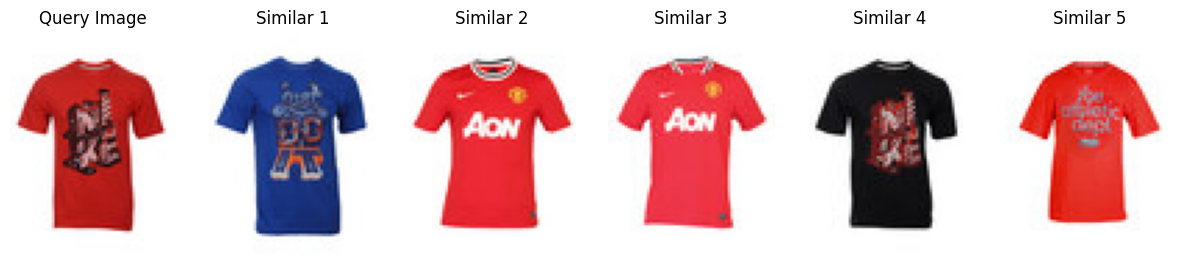

In [21]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image
from numpy.linalg import norm
from sklearn.metrics.pairwise import cosine_similarity

# Load saved embeddings and filenames
feature_list = pickle.load(open('embeddings.pkl', 'rb'))
filenames = pickle.load(open('filenames.pkl', 'rb'))

def extract_features(img_path, model):
    """Extract features from a given image using the trained model."""
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)
    
    return normalized_result

def recommend_similar_images(query_img_path, model, top_n=5):
    """Given an input image, recommend top 5 visually similar images."""
    
    # Extract features of the input image
    query_features = extract_features(query_img_path, model).reshape(1, -1)
    
    # Compute cosine similarity
    similarities = cosine_similarity(query_features, feature_list)[0]
    
    # Get indices of top 5 most similar images
    top_indices = np.argsort(similarities)[::-1][1:top_n+1]  # Exclude the query image itself
    
    # Display the query image
    fig, axes = plt.subplots(1, top_n+1, figsize=(15, 5))
    
    # Load and display the query image
    query_img = cv2.imread(query_img_path)
    query_img = cv2.cvtColor(query_img, cv2.COLOR_BGR2RGB)
    axes[0].imshow(query_img)
    axes[0].set_title("Query Image")
    axes[0].axis("off")

    # Display recommended images
    for i, idx in enumerate(top_indices):
        similar_img = cv2.imread(filenames[idx])
        similar_img = cv2.cvtColor(similar_img, cv2.COLOR_BGR2RGB)
        axes[i+1].imshow(similar_img)
        axes[i+1].set_title(f"Similar {i+1}")
        axes[i+1].axis("off")

    plt.show()

# Example usage:
recommend_similar_images("./images/10009.jpg", model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


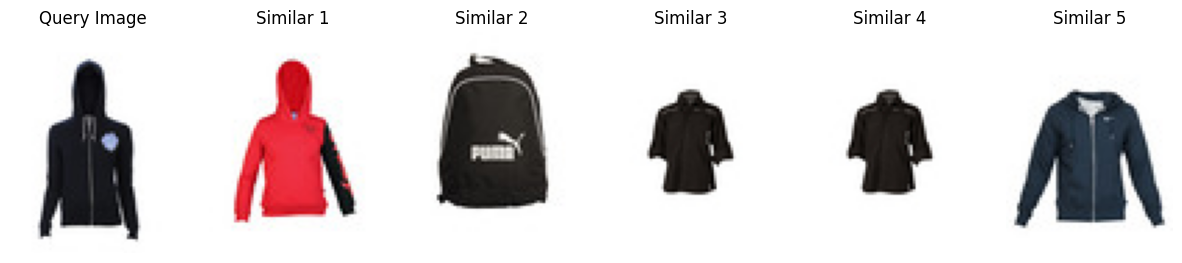

In [23]:

# Example usage:
recommend_similar_images("./images/10029.jpg", model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


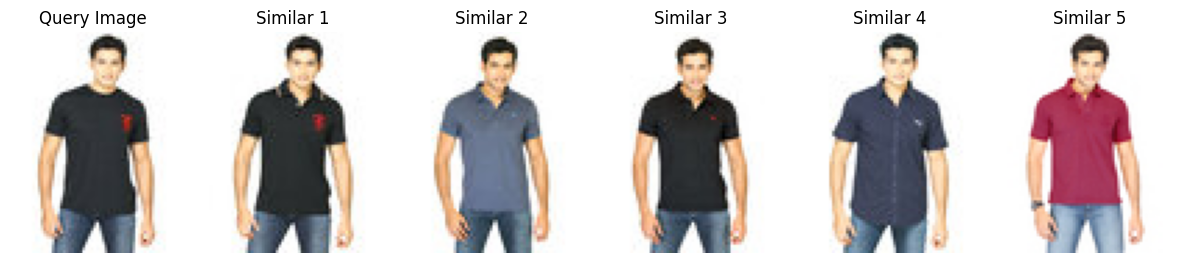

In [24]:

# Example usage:
recommend_similar_images("./images/10044.jpg", model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


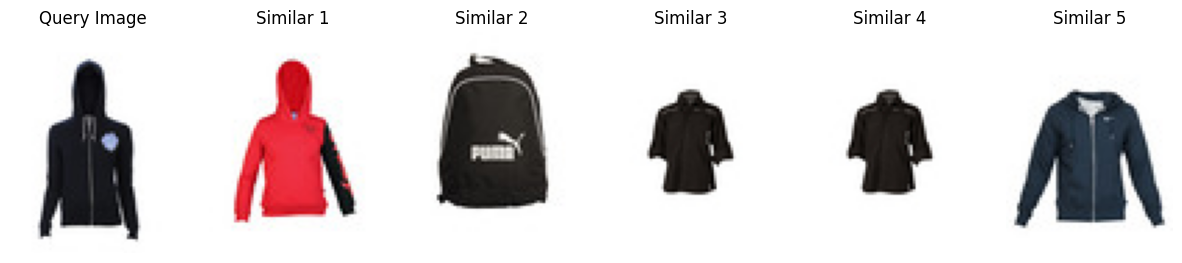

In [ ]:

# Example usage:
recommend_similar_images(".static/images/10029.jpg", model)


In [26]:
filenames = [os.path.join(file) for file in os.listdir(images_path)]
pickle.dump(filenames,open('filenames_updated.pkl','wb'))